<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1


---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All weather datasets used in the project come from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station.

Dataset of workplace accidents used in the project comes from Ministry of Manpower (Annual Reports).

There are 11 datasets included in the [`data`](../data/) folder for this project. These correspond to rainfall and workplace injury information. 

* [`rainfall-monthly-highest-daily-total.csv`](../data/rainfall-monthly-highest-daily-total.csv): The highest daily total rainfall for the month recorded at the Changi Climate Station.
* [`rainfall-monthly-number-of-rain-days.csv`](../data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv'`](../data/rainfall-monthly-total.csv'): The total monthly rainfall recorded at the Changi Climate Station.
* [`relative-humidity-monthly-mean.csv`](../data/relative-humidity-monthly-mean.csv'): The monthly mean relative humidity recorded at the Changi Climate Station.
*  [`relative-humidity-absolute-monthly-extreme-minimum.csv`](../data/relative-humidity-absolute-monthly-extreme-minimum.csv'): The absolute extreme minimum relative humidity for the month recorded at the Changi Climate Station.
* [`sunshine-duration-monthly-mean-daily-duration.csv`](../data/sunshine-duration-monthly-mean-daily-duration.csv): The monthly mean sunshine hours in a day recorded at the Changi Climate Station.
* [`surface-air-temperature-monthly-mean.csv`](../data/surface-air-temperature-monthly-mean.csv): The monthly mean air temperature recorded at the Changi Climate Station.
*  [`surface-air-temperature-monthly-mean-daily-minimum.csv`](../data/surface-air-temperature-monthly-mean-daily-minimum.csv): The monthly mean daily minimum temperature recorded at the Changi Climate Station.
*  [`surface-air-temperature-monthly-mean-daily-maximum.csv`](../data/surface-air-temperature-monthly-mean-daily-maximum.csv): The monthly mean daily maximum temperature recorded at the Changi Climate Station.
*  [`wet-bulb-temperature-hourly.csv`](../data/wet-bulb-temperature-hourly.csv): The monthly mean hourly wet bulb temperature recorded at the Changi Climate Station. Wet bulb temperature mirrors how the human body cools itself with sweat.
* [`workplace-accidents-years.csv`](./data/workplace-accidents-years.csv): The number of cases of work place injuries in a year, grouped by type of injury and industry of workplace.

## Problem Statement

You are a data analyst at an insurance company that attended a forum held by the Singapore Actuarial Society on how the insurance industry may be impacted by climate trends across the world. You are concerned and wish to understand if the same trends apply to Singapore and have identified workplace safety to be a key area of interest. This analysis will identify weather patterns in Singapore and its implication on workplace related insurance.

### Outside Research

Studies have explored the relationship between weather and workplace safety and found that climate trends can have an adverse impact on workplace safety and actuarial models.  

According to a UCLA study, "Hotter temperature increases workplace injuries significantly, causing approximately 20,000 additionalinjuries per year and an estimated social cost of $1 billion." (Park et al., 2021). This study was done based on data from California’s workers’ compensation system.

In a separate study done by the Institute and Faculty of Actuaries, UK, "Climate change also has wide-reaching implications for the work done by actuaries through its potential to impact human health and mortality, the economy and financial stability, the risks people and businesses face from natural disasters and the value of assets held by insurers and pension schemes." (Storey et al., 2019).

In order to analyze if the same trends apply to Singapore's context, localised workplace accident data was obtained from Singapore's Ministry of Manpower's annual workplace safety and health (WSH) reports. 

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def find_mean(test_lst):
    total = 0
    count = 0
    for i in test_lst:
        total += i
        count += 1
    ans = total / count
    return ans

test_lst = [10, 12, 23, 23, 16, 23, 21, 16]

find_mean(test_lst)

18.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def std_dev(test_lst):
    total = 0
    count = 0
    for i in test_lst:
        total += (i - find_mean(test_lst)) ** 2
        count += 1
    ans = (total / count) ** 0.5
    return ans

std_dev(test_lst)

4.898979485566356

--- 
# Part 2


---

### Import Libraries

*All libraries used should be added here*

In [3]:
# Imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import shapiro

from IPython.display import HTML

%config InlineBackend.figure_format = 'retina'

Create some useful lists.

In [4]:
# list months and years for sorting plts
lst_months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
lst_years = []
for i in range(1982,2023):  
    lst_years.append(str(i))

Define some useful fuctions.

In [5]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    filt_df = df.loc[(df[col] > low) & (df[col] < high)]
    return filt_df

def count_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    count = len(df[(df[col] <= low) | (df[col] >= high)])
    return print(f"Number of outliers for {col} is {count}")

In [6]:
# function for comparing std of periods
def compare_std(df, col, period):
    df['year'] = df['date'].dt.strftime('%Y')
    year=1981
    lst_std=[]
    lst_period=[]
    while year + period <= 2022:
        lst_year=[]
        for i in range(period):
            year +=1
            lst_year.append(str(year))
        lst_period.append(str(lst_year[0])+' - '+str(lst_year[-1]))
        lst_std.append(df.loc[df['year'].isin(lst_year),col].std())
    return lst_period,lst_std
        
def compare_boxplot(df,col,period,title,ylabel):
    fig, axes = plt.subplots((41//period), 1, figsize=(3, 3), sharex=True)
    year=1981
    count=-1
    while year + period <= 2022:
        lst_year=[]
        count+=1
        for i in range(period):
            year +=1
            lst_year.append(str(year))
        sns.boxplot(df.loc[df['year'].isin(lst_year)], x=col,color='lightsteelblue',ax=axes[count])
        
def compare_lineplot_period(df,col,period,title,ylabel,start_yr,lst_col):
    fig, axes = plt.subplots()
    count=-1
    lst_period=[]
    while start_yr - 1 + period <= 2022:
        lst_year=[]
        count+=1
        for i in range(period):
            start_yr +=1
            lst_year.append(str(start_yr-1))
        lst_period.append(str(lst_year[0])+' - '+str(lst_year[-1]))
        sns.lineplot(df.loc[df['year'].isin(lst_year)], x='month',y=col,color=lst_col[count],legend='auto', label=lst_period[count],ax=axes).set(title=title,ylabel=ylabel)
    axes.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
    axes.set_xticks(range(len(lst_months)),labels=lst_months)
    
def compare_std_period(org_df,filt_df,col,period,title):
    org_df['year'] = org_df['date'].dt.strftime('%Y')
    std_array=compare_std(filt_df, col, period)
    # convert array to dataframe
    std_df = pd.DataFrame(std_array)
    # transpose
    std_df = std_df.T
    # add column names
    std_df.columns = ['Period', 'Std Dev']
    # set col as index
    std_df.set_index(std_df["Period"])
    # plot line plot of std over period
    fig, axes = plt.subplots()
    sns.lineplot(std_df,x=std_df['Period'],y=std_df['Std Dev'],ax=axes).set(title=title)
    axes.tick_params(rotation=45, labelsize=10)

In [7]:
# create function for statistical data
def normality(df, col):
    stat, p = shapiro(df[col])
    alpha = 0.05
    nl = '\n'
    if p > alpha:
        return f"p: {p}{nl}Since p > {alpha}, it cannot be concluded that {col} does not follow a normal distribution (fail to reject H0)"
    else:
        return f"p: {p}{nl}Since p <= {alpha}, it can be concluded that {col} does not follow a normal distribution (reject H0)"
      

def skewness(df,col):
    if skew(df[col]) == 0:
        pos_neg='not'
    elif skew(df[col]) > 0:
        pos_neg='positively'
    else:
        pos_neg='negatively'
    return f"Distribution of {col} is {pos_neg} skewed, with skew at: {skew(df[col])}"

def statistical_data(df,col):
    nl = '\n'
    return f"Statistical Data for {col}{nl}Mean: {df[col].mean()}{nl}Standard Deviation: {df[col].std()}{nl}{normality(df, col)}{nl}{skewness(df,col)}"

In [8]:
def corr_strength(df,col1,col2):
    if -0.2 >= df[col1].corr(df[col2]) > -0.4:
        strength='weak negative'
    elif -0.4 >= df[col1].corr(df[col2]) > -0.6:
        strength='moderate negative'
    elif -0.6 >= df[col1].corr(df[col2]) > -0.8:
        strength='strong negative'
    elif -0.8 >= df[col1].corr(df[col2]) >= -1:
        strength='strong negative'
    elif 0.2 <= df[col1].corr(df[col2]) < 0.4:
        strength='weak positive'
    elif 0.4 <= df[col1].corr(df[col2]) < 0.6:
        strength='moderate positive'
    elif 0.6 <= df[col1].corr(df[col2]) < 0.8:
        strength='strong positive'
    elif 0.8 <= df[col1].corr(df[col2]) <= 1:
        strength='very strong positive'
    return print(f"Correlation between {col1} and {col2} is {df[col1].corr(df[col2])} which indicates a {strength} correlation between the two variables.")

In [9]:
def remove_outliers_reg(df,col1, col2,title,xlabel,ylabel):
    col_filt_1 = remove_outlier(df, col1)
    col_filt_2 = remove_outlier(df, col2)
    filt=pd.concat([col_filt_1, col_filt_2], join="outer")
    sns.regplot(data=filt, x=col1, y=col2,scatter_kws={"color": "cornflowerblue"},line_kws={"color": "orange",'alpha':0.7}).set(title=title, xlabel=xlabel, ylabel=ylabel)
    corr_strength(df,col1,col2)

## Data Import and Cleaning

### Import Datasets

In [10]:
# Import the csv into a pandas DataFrame
h_daily_total = pd.read_csv('../data/rainfall-monthly-highest-daily-total.csv')
mthly_rainy_days = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
mthly_rainfall_total = pd.read_csv('../data/rainfall-monthly-total.csv')
humidity = pd.read_csv('../data/relative-humidity-monthly-mean.csv')
humidity_min = pd.read_csv('../data/relative-humidity-absolute-monthly-extreme-minimum.csv')
sunshine = pd.read_csv('../data/sunshine-duration-monthly-mean-daily-duration.csv')
s_temp_mean = pd.read_csv('../data/surface-air-temperature-monthly-mean.csv')
s_temp_min_mean = pd.read_csv('../data/surface-air-temperature-monthly-mean-daily-minimum.csv')
s_temp_max_mean = pd.read_csv('../data/surface-air-temperature-monthly-mean-daily-maximum.csv')
wet_bulb_temp = pd.read_csv('../data/wet-bulb-temperature-hourly.csv')
work_accidents_years=pd.read_csv('../data/workplace-accidents-years.csv')

### Display the data: print the first 5 rows of each dataframe to your Jupyter notebook

In [11]:
lst_of_df = [h_daily_total, mthly_rainy_days, mthly_rainfall_total, humidity, humidity_min, sunshine, 
             s_temp_mean, s_temp_min_mean, s_temp_max_mean, wet_bulb_temp,work_accidents_years]

for i in lst_of_df:
    display(i.head())

month  maximum_rainfall_in_a_day
0  1982-01                       36.5
1  1982-02                        9.4
2  1982-03                       61.7
3  1982-04                       45.1
4  1982-05                       33.0

month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10

month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2

month  mean_rh
0  1982-01     81.2
1  1982-02     79.5
2  1982-03     82.3
3  1982-04     85.9
4  1982-05     83.2

month  rh_extremes_minimum
0  1982-01                   49
1  1982-02                   49
2  1982-03                   51
3  1982-04                   54
4  1982-05                   57

month  mean_sunshine_hrs
0  1982-01                5.6
1  1982-02                7.6
2  1982-03                5.1
3  1982-04                4.7
4  1982-05                5.8

month  mean_temp
0  1982-01       25.9
1  1982-02       27.1
2  1982-03       27.2
3  1982-04       27.0
4  1982-05       28.0

month  temp_mean_daily_min
0  1982-01                 23.3
1  1982-02                 23.9
2  1982-03                 24.3
3  1982-04                 24.3
4  1982-05                 25.2

month  temp_mean_daily_max
0  1982-01                 29.8
1  1982-02                 32.3
2  1982-03                 31.7
3  1982-04                 31.4
4  1982-05                 31.7

wbt_date  wbt_time  wet_bulb_temperature
0  1982-01-01         1                  24.7
1  1982-01-01         2                  24.5
2  1982-01-01         3                  24.3
3  1982-01-01         4                  24.2
4  1982-01-01         5                  24.2

year            type                           industry  injuries
0  2014  Major Injuries                      Manufacturing       150
1  2014  Major Injuries                       Construction       217
2  2014  Major Injuries           Transportation & Storage        49
3  2014  Major Injuries      Accommodation & Food Services        37
4  2014  Major Injuries  Administrative & Support Services        28

### Cleaning

As part of the EDA process, an abnormal data point was observed for 1986-04-14 where wet_bulb_temp['wbt_time' = 0]. This is likely a data entry error.

In [12]:
wet_bulb_temp[wet_bulb_temp['wbt_time']==0]

wbt_date  wbt_time  wet_bulb_temperature
37535  1986-04-14         0                  24.6

In [13]:
wet_bulb_temp[wet_bulb_temp['wbt_date']=='1986-04-13'].tail(1)

wbt_date  wbt_time  wet_bulb_temperature
37534  1986-04-13        23                  24.5

Adjust the data entry error. 

In [14]:
# fix potential data entry error
wet_bulb_temp.loc[wet_bulb_temp['wbt_time'] == 0,'wbt_date']='1986-04-13'
wet_bulb_temp.loc[wet_bulb_temp['wbt_time'] == 0,'wbt_time']=24
wet_bulb_temp[wet_bulb_temp['wbt_date']=='1986-04-13'].tail(1)

wbt_date  wbt_time  wet_bulb_temperature
37535  1986-04-13        24                  24.6

Drop columns that are not needed for now.

In [15]:
# drop 'wbt_time' column
wet_bulb_temp_copy = wet_bulb_temp
wet_bulb_temp_copy = wet_bulb_temp.drop(columns = ['wbt_time'],axis=1)

# to convert object to python datetime 
wet_bulb_temp_copy['wbt_date'] = pd.to_datetime(wet_bulb_temp_copy['wbt_date'])

Check that data entry error has been adjusted.

In [16]:
# to check use: wet_bulb_temp.info()
wet_bulb_temp[wet_bulb_temp['wbt_time']==0]

Empty DataFrame
Columns: [wbt_date, wbt_time, wet_bulb_temperature]
Index: []

In [17]:
# group the hours / days to month and find mean
wb_temp = wet_bulb_temp_copy.resample('M', on="wbt_date").mean()

# change the datetime index back into a col instead of index
wb_temp.reset_index(inplace=True)

# create a new col 'month' with only year-month
wb_temp["month"] = wb_temp["wbt_date"].dt.strftime('%Y-%m')

# drop wbt_date
wb_temp.drop(columns = ['wbt_date'], axis=1, inplace=True)
display(wb_temp)

wet_bulb_temperature    month
0               23.456048  1982-01
1               24.297619  1982-02
2               24.811559  1982-03
3               25.103750  1982-04
4               25.689651  1982-05
..                    ...      ...
491             24.303763  2022-12
492             24.160887  2023-01
493             24.211161  2023-02
494             24.308199  2023-03
495             25.440139  2023-04

[496 rows x 2 columns]

In [18]:
# Dataset of wet_bulb_temp still shows 'wbt_time'. To be used to compare temp across the day
# create new col that shows month of the row
wet_bulb_temp['wbt_date'] = pd.to_datetime(wet_bulb_temp['wbt_date'])
wet_bulb_temp['month']=wet_bulb_temp['wbt_date'].dt.strftime('%b')

In [19]:
# copy df without reference (changes to copy will not change original)
lst_of_df_copy=lst_of_df[:]
# update list of dataframes
lst_of_df_copy[-2] = wb_temp 

# merge all files by month
climate = pd.merge(h_daily_total, mthly_rainy_days, on='month', how='inner')

for i in lst_of_df_copy[2:-1]: # excl h_daily_total and mthly_rainy_days since done above AND excl work_accidents_years
    climate = pd.merge(climate, i, on='month', how='inner')

In [20]:
# convert month to datetime
climate['month'] = pd.to_datetime(climate['month'])
climate['month'].info()

<class 'pandas.core.series.Series'>
Int64Index: 496 entries, 0 to 495
Series name: month
Non-Null Count  Dtype         
--------------  -----         
496 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 KB


In [21]:
# change name of col: 'month' to 'date'
climate.rename(columns={'month': 'date'}, inplace=True)
climate.tail()

date  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall  \
491 2022-12-01                       37.0                19           215.4   
492 2023-01-01                       72.0                22           302.6   
493 2023-02-01                      154.8                13           324.4   
494 2023-03-01                       90.2                12           243.4   
495 2023-04-01                       85.8                19           222.8   

     mean_rh  rh_extremes_minimum  mean_sunshine_hrs  mean_temp  \
491     81.2                   52                3.6       26.8   
492     81.9                   43                4.4       26.5   
493     79.4                   50                5.1       26.9   
494     79.2                   52                6.0       27.1   
495     77.4                   57                5.8       28.5   

     temp_mean_daily_min  temp_mean_daily_max  wet_bulb_temperature  
491                 24.5                 30.3             24.303763  
492                 24.5                 30.1             24.160887  
493                 24.5                 31.0             24.211161  
494                 24.6                 30.9             24.308199  
495                 25.8                 32.6             25.440139

### Merge

Merge all weather related datasets together.

In [22]:
# remove 2023 since 2023 not complete year. 
index_drop_2023=climate[climate['date'].dt.strftime('%Y')=='2023'].index
climate.drop(index_drop_2023, inplace=True)
climate.tail()

date  maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall  \
487 2022-08-01                       32.4                15           141.4   
488 2022-09-01                       38.2                14           121.0   
489 2022-10-01                       38.8                27           279.0   
490 2022-11-01                       53.0                26           313.8   
491 2022-12-01                       37.0                19           215.4   

     mean_rh  rh_extremes_minimum  mean_sunshine_hrs  mean_temp  \
487     77.4                   50                5.5       28.1   
488     76.9                   52                3.8       27.9   
489     78.7                   47                3.5       27.6   
490     79.9                   46                3.8       27.4   
491     81.2                   52                3.6       26.8   

     temp_mean_daily_min  temp_mean_daily_max  wet_bulb_temperature  
487                 25.8                 31.2             25.072312  
488                 25.4                 31.1             24.833889  
489                 24.7                 31.5             24.688575  
490                 24.4                 31.4             24.674306  
491                 24.5                 30.3             24.303763

Check DataFrame information and null values (if applicable).

In [23]:
# check data
display(climate.info())

# check for null
display(climate.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       492 non-null    datetime64[ns]
 1   maximum_rainfall_in_a_day  492 non-null    float64       
 2   no_of_rainy_days           492 non-null    int64         
 3   total_rainfall             492 non-null    float64       
 4   mean_rh                    492 non-null    float64       
 5   rh_extremes_minimum        492 non-null    int64         
 6   mean_sunshine_hrs          492 non-null    float64       
 7   mean_temp                  492 non-null    float64       
 8   temp_mean_daily_min        492 non-null    float64       
 9   temp_mean_daily_max        492 non-null    float64       
 10  wet_bulb_temperature       492 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 46.1 KB


None

date                         0
maximum_rainfall_in_a_day    0
no_of_rainy_days             0
total_rainfall               0
mean_rh                      0
rh_extremes_minimum          0
mean_sunshine_hrs            0
mean_temp                    0
temp_mean_daily_min          0
temp_mean_daily_max          0
wet_bulb_temperature         0
dtype: int64

Merge weather related dataset with workplace accident dataset

In [24]:
climate['year'] = climate['date'].dt.strftime('%Y')
climate['month'] = climate['date'].dt.strftime('%m')

# group the climate data by year and pass .mean()
grp_year=climate.groupby(['year']).mean(numeric_only=False)
grp_year=grp_year.reset_index()
grp_year=pd.DataFrame(grp_year)
# convert object to int
grp_year['year']=grp_year['year'].astype(str).astype(int)
# drop 'month' col
grp_year.drop(columns=['month'],inplace=True)

In [25]:
# group work_accidents_years by 'year','industry','type' and pass .sum() to get total injuries
grp_work_acc=work_accidents_years.groupby(['year','industry','type'])['injuries'].sum(numeric_only=True)
grp_work_acc=pd.DataFrame(grp_work_acc)
grp_work_acc=grp_work_acc.reset_index()

# filter for 'Transportation & Storage'
grp_work_acc_TS=grp_work_acc.loc[grp_work_acc['industry']=='Transportation & Storage',['year','injuries','type']]

# create injury type cols
grp_work_acc_TS=grp_work_acc_TS.reset_index(drop=True)
grp_work_acc_TS=grp_work_acc_TS.groupby(['year','type']).sum()
grp_work_acc_TS=grp_work_acc_TS.unstack(level=-1)
grp_work_acc_TS=pd.DataFrame(grp_work_acc_TS)

# move col index of 'year' from level 0 to level 1
grp_work_acc_TS=grp_work_acc_TS.reset_index(col_level=1)

# drop col index 'injuries' at level 0
grp_work_acc_TS=grp_work_acc_TS.droplevel(level=0,axis=1)

# add new col which is sum of injuries
grp_work_acc_TS['sum_injuries_ts']=grp_work_acc_TS.iloc[:,1:].sum(axis=1)

In [26]:
# join 'grp_work_acc_TS' with 'climate' using merge
grp_work_acc_TS = pd.merge(grp_year,grp_work_acc_TS,on='year',how='left')

for i in grp_work_acc_TS.columns[1:]:
    grp_work_acc_TS_filt=remove_outlier(grp_work_acc_TS, i)

In [27]:
grp_work_acc_TS_filt=grp_work_acc_TS_filt.rename(columns={'Fatal Injuries': 'fatal_injuries_ts',
                                                         'Light Injuries': 'light_injuries_ts',
                                                         'Major Injuries': 'major_injuries_ts'})

In [28]:
# filter for 'Construction'
grp_work_acc_Constr=grp_work_acc.loc[grp_work_acc['industry']=='Construction',['year','injuries','type']]

# create injury type cols
grp_work_acc_Constr=grp_work_acc_Constr.reset_index(drop=True)
grp_work_acc_Constr=grp_work_acc_Constr.groupby(['year','type']).sum()
grp_work_acc_Constr=grp_work_acc_Constr.unstack(level=-1)
grp_work_acc_Constr=pd.DataFrame(grp_work_acc_Constr)

# move col index of 'year' from level 0 to level 1
grp_work_acc_Constr=grp_work_acc_Constr.reset_index(col_level=1)

# drop col index 'injuries' at level 0
grp_work_acc_Constr=grp_work_acc_Constr.droplevel(level=0,axis=1)

# add new col which is sum of injuries
grp_work_acc_Constr['sum_injuries_constr']=grp_work_acc_Constr.iloc[:,1:].sum(axis=1)

In [29]:
# join 'grp_work_acc_y' with 'grp_work_acc_TS_filt' using merge
grp_work_acc_Constr = pd.merge(grp_work_acc_TS_filt,grp_work_acc_Constr,on='year',how='left')

for i in grp_work_acc_Constr.columns[1:]:
    grp_work_acc_Constr_filt=remove_outlier(grp_work_acc_Constr, i)

In [30]:
climate_weather_df=grp_work_acc_Constr_filt.rename(columns={'Fatal Injuries': 'fatal_injuries_constr',
                                                         'Light Injuries': 'light_injuries_constr',
                                                         'Major Injuries': 'major_injuries_constr'})

### Save as csv files

In [31]:
climate.to_csv('../data/climate.csv')
climate_weather_df.to_csv('../data/climate_weather_df.csv')

### Data Dictionary

|Feature|Type|Dataset|Unit of Measure|Description|
|:---|:---|:---|:---|:---|
|maximum_rainfall_in_a_day|float|h_daily_total|Millimetre|The highest daily total rainfall for the month recorded at the Changi Climate Station.| 
|no_of_rainy_days|int|mthly_rainy_days|Days|The number of rain days (day with rainfall amount of 0.2mm or more) in a month recorded at the Changi Climate Station.| 
|total_rainfall|float|mthly_rainfall_total|Millimetre|The total monthly rainfall recorded at the Changi Climate Station.| 
|mean_rh|float|humidity|Percentage|The monthly mean relative humidity recorded at the Changi Climate Station.| 
|rh_extremes_minimum|int|humidity_min|Percentage|The absolute extreme minimum relative humidity for the month recorded at the Changi Climate Station.| 
|mean_sunshine_hrs|float|sunshine|Hours|The monthly mean sunshine hours in a day recorded at the Changi Climate Station.| 
|mean_temp|float|surface_temp|Degree Celsius|The monthly mean air temperature recorded at the Changi Climate Station.| 
|temp_mean_daily_min|float|s_temp_min_mean|Degree Celsius|The monthly mean daily minimum temperature recorded at the Changi Climate Station.| 
|temp_mean_daily_max|float|s_temp_max_mean|Degree Celsius|The monthly mean daily maximum temperature recorded at the Changi Climate Station.| 
|wet_bulb_temperature|float|wb_temp|Degree Celsius|The monthly mean hourly wet bulb temperature recorded at the Changi Climate Station. Wet bulb temperature mirrors how the human body cools itself with sweat. Note: Found data entry error which was fixed in code.| 
|injuries|int|work_accidents_years|Cases|The number of cases of work place injuries in a year, grouped by type of injury and industry of workplace.|

## Exploratory Data Analysis

### Summary Statistics

In [32]:
# summarize
climate.describe()

maximum_rainfall_in_a_day  no_of_rainy_days  total_rainfall  \
count                 492.000000        492.000000      492.000000   
mean                   52.246138         14.121951      177.611992   
std                    35.618098          4.995453      113.751876   
min                     0.200000          1.000000        0.200000   
25%                    30.850000         11.000000       94.150000   
50%                    43.650000         14.000000      159.700000   
75%                    62.775000         18.000000      238.625000   
max                   216.200000         27.000000      765.900000   

          mean_rh  rh_extremes_minimum  mean_sunshine_hrs   mean_temp  \
count  492.000000           492.000000         492.000000  492.000000   
mean    82.222561            50.520325           5.671951   27.676829   
std      3.414197             5.512585           1.214402    0.800071   
min     72.000000            33.000000           2.700000   25.400000   
25%     79.900000            47.000000           4.800000   27.100000   
50%     82.600000            51.000000           5.600000   27.700000   
75%     84.625000            55.000000           6.425000   28.300000   
max     90.700000            61.000000           9.300000   29.500000   

       temp_mean_daily_min  temp_mean_daily_max  wet_bulb_temperature  
count           492.000000           492.000000            492.000000  
mean             24.918089            31.525203             25.253051  
std               0.733000             0.866681              0.594548  
min              22.900000            28.800000             23.391129  
25%              24.400000            31.000000             24.902688  
50%              24.900000            31.500000             25.283663  
75%              25.400000            32.100000             25.642360  
max              27.100000            34.400000             26.913978

### Dictionary Comprehension

In [33]:
# using iloc to remove(split) unwanted col (month)
my_dict = climate.iloc[:, 1:-2].to_dict('list')

# dictionary comprehension
sd = {key:std_dev(val) for key, val in my_dict.items()}
display(sd)

{'maximum_rainfall_in_a_day': 35.581882626773,
 'no_of_rainy_days': 4.990373441642558,
 'total_rainfall': 113.6362154861565,
 'mean_rh': 3.41072542327122,
 'rh_extremes_minimum': 5.506979449613963,
 'mean_sunshine_hrs': 1.2131670295235129,
 'mean_temp': 0.7992575997061785,
 'temp_mean_daily_min': 0.7322548482146249,
 'temp_mean_daily_max': 0.8657994562980569,
 'wet_bulb_temperature': 0.5939434247906251}

### Investigate trends in the data

Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?

In [34]:
# group the 'month' by year
lst_year_4 = ['1990', '2000', '2010', '2020']
for i in lst_year_4:
    idx_min = climate.loc[climate[climate['date'].dt.strftime('%Y') == i]['total_rainfall'].idxmin(),'date']
    idx_max = climate.loc[climate[climate['date'].dt.strftime('%Y') == i]['total_rainfall'].idxmax(),'date']
    print(f'month with lowest total rainfall in {i}: {idx_min.month}')
    print(f'month with highest total rainfall in {i}: {idx_max.month}\n')

month with lowest total rainfall in 1990: 2
month with highest total rainfall in 1990: 9

month with lowest total rainfall in 2000: 9
month with highest total rainfall in 2000: 11

month with lowest total rainfall in 2010: 2
month with highest total rainfall in 2010: 7

month with lowest total rainfall in 2020: 2
month with highest total rainfall in 2020: 5



Which year have the highest and lowest total rainfall in the date range of analysis?

In [35]:
# group by year and sum total
grp_year_total_rainfall = climate.groupby([climate.date.dt.year])['total_rainfall'].sum()

print(f'year with lowest total rainfall: {grp_year_total_rainfall.idxmin()}')
print(f'year with highest total rainfall: {grp_year_total_rainfall.idxmax()}')

year with lowest total rainfall: 1997
year with highest total rainfall: 2007


List top 5 and bottom 5 years with corresponding total rainfall

In [36]:
# sort year by highest total rainfall to lowest and list top 5 and bottom 5
display(grp_year_total_rainfall[:-1].sort_values(ascending=False).head())
display(grp_year_total_rainfall[:-1].sort_values(ascending=False).tail())

date
2007    2886.2
2021    2809.6
2001    2783.1
2006    2753.2
2013    2748.4
Name: total_rainfall, dtype: float64

date
1990    1523.8
1985    1483.9
2019    1367.5
2015    1267.1
1997    1118.9
Name: total_rainfall, dtype: float64

Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?

In [37]:
# use .month to extract month only data from timestamp
lst_year_4 = ['1990', '2000', '2010', '2020']
for i in lst_year_4:
    lowest_i = climate.loc[climate[climate['date'].dt.strftime('%Y') == i]['no_of_rainy_days'].idxmin(), 'date']
    highest_i = climate.loc[climate[climate['date'].dt.strftime('%Y') == i]['no_of_rainy_days'].idxmax(),'date']
    print(f'month with lowest number of rainy days in {i}: {lowest_i.month}') 
    print(f'month with highest number of rainy days in {i}: {highest_i.month}\n')

month with lowest number of rainy days in 1990: 3
month with highest number of rainy days in 1990: 9

month with lowest number of rainy days in 2000: 5
month with highest number of rainy days in 2000: 11

month with lowest number of rainy days in 2010: 2
month with highest number of rainy days in 2010: 11

month with lowest number of rainy days in 2020: 1
month with highest number of rainy days in 2020: 7



Which year have the highest and lowest number of rainy days in the date range of analysis?

In [38]:
total_rain_days = climate.groupby(climate.date.dt.year)['no_of_rainy_days'].sum()
print(f'year with lowest number of rainy days: {total_rain_days[:-1].idxmin()}')
print(f'year with highest number of rainy days: {total_rain_days[:-1].idxmax()}')

year with lowest number of rainy days: 1997
year with highest number of rainy days: 2013


List year from highest number of rainy days to lowest and list top 5 and bottom 5

In [39]:
display(total_rain_days[:-1].sort_values(ascending=False).head())
display(total_rain_days[:-1].sort_values(ascending=False).tail())

date
2013    206
2017    204
2007    195
1984    191
2012    191
Name: no_of_rainy_days, dtype: int64

date
2002    139
1982    130
2015    125
2019    120
1997    116
Name: no_of_rainy_days, dtype: int64

Are there any outliers months in the dataset?

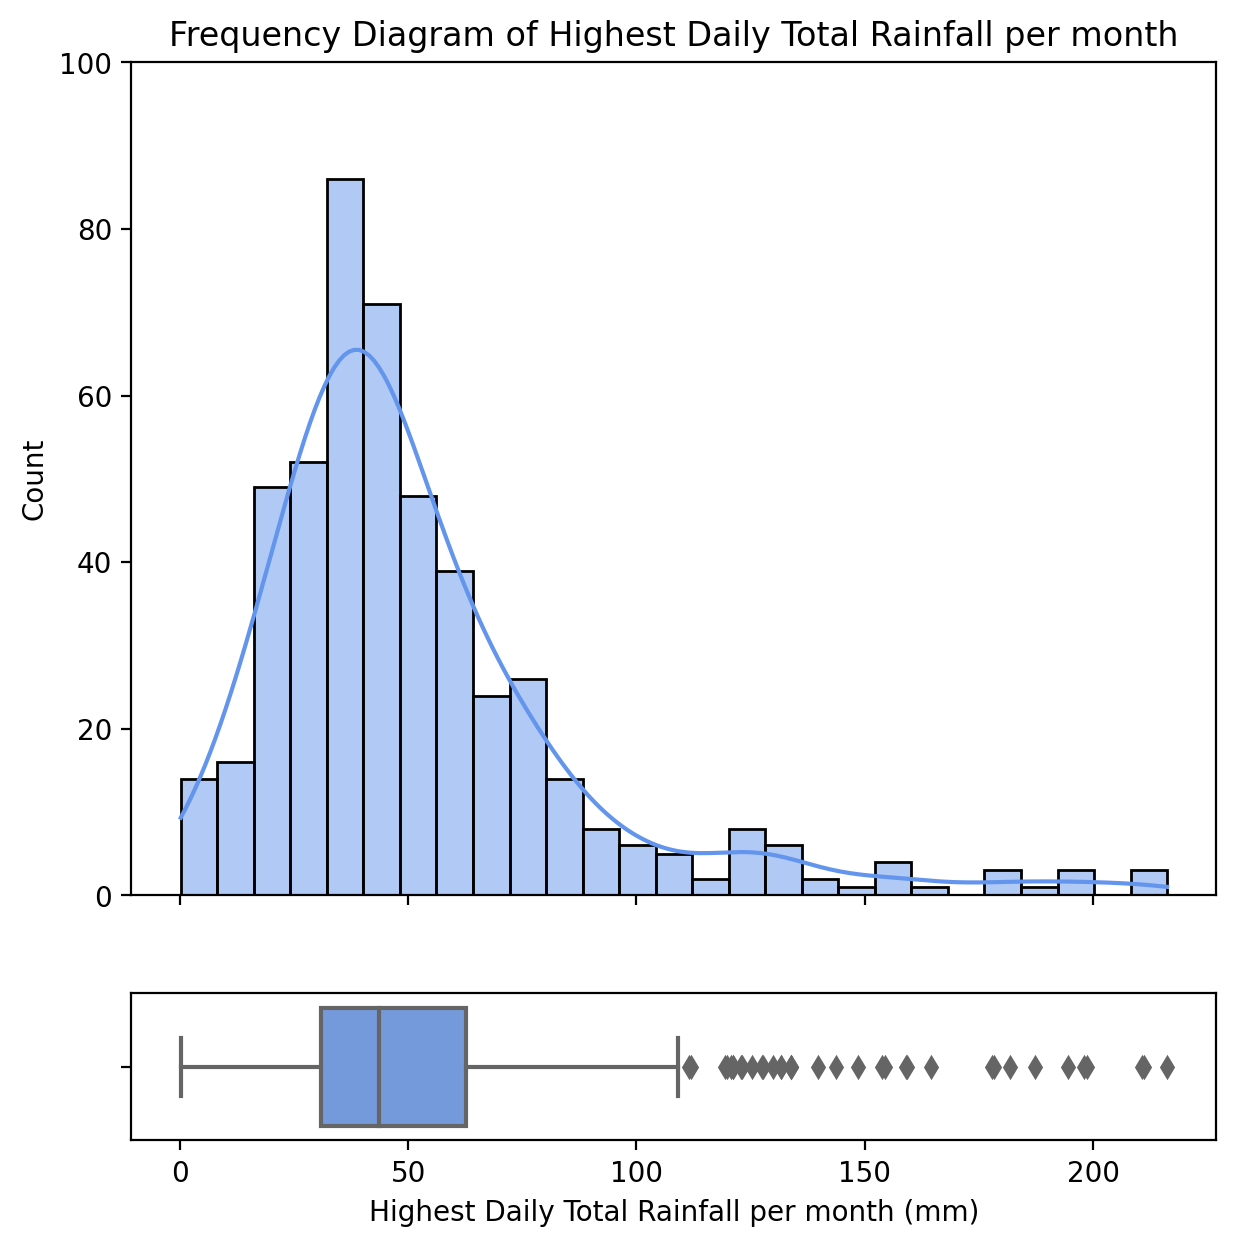

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True,gridspec_kw={"height_ratios": (.85, .15)})

sns.histplot(data=climate,x='maximum_rainfall_in_a_day', kde=True,ax=axes[0], color='cornflowerblue').set(title='Frequency Diagram of Highest Daily Total Rainfall per month',xlabel='Highest Daily Total Rainfall per month (mm)',ylim=(0,100))

#plot boxplot
sns.boxplot(climate,x='maximum_rainfall_in_a_day',ax=axes[1], color='cornflowerblue').set(title='',xlabel='Highest Daily Total Rainfall per month (mm)')
None

In [41]:
for i in climate.columns[1:-2]:
    count_outlier(climate, i)

Number of outliers for maximum_rainfall_in_a_day is 36
Number of outliers for no_of_rainy_days is 0
Number of outliers for total_rainfall is 14
Number of outliers for mean_rh is 4
Number of outliers for rh_extremes_minimum is 5
Number of outliers for mean_sunshine_hrs is 7
Number of outliers for mean_temp is 0
Number of outliers for temp_mean_daily_min is 3
Number of outliers for temp_mean_daily_max is 9
Number of outliers for wet_bulb_temperature is 14


Among the 10 weather related variables, highest daily total rainfall per month ('maximum_rainfall_in_a_day') has the most outliers. 

## Visualize the Data

Heatmap of Correlation of Climate Data - 1982 to 2022, Singapore

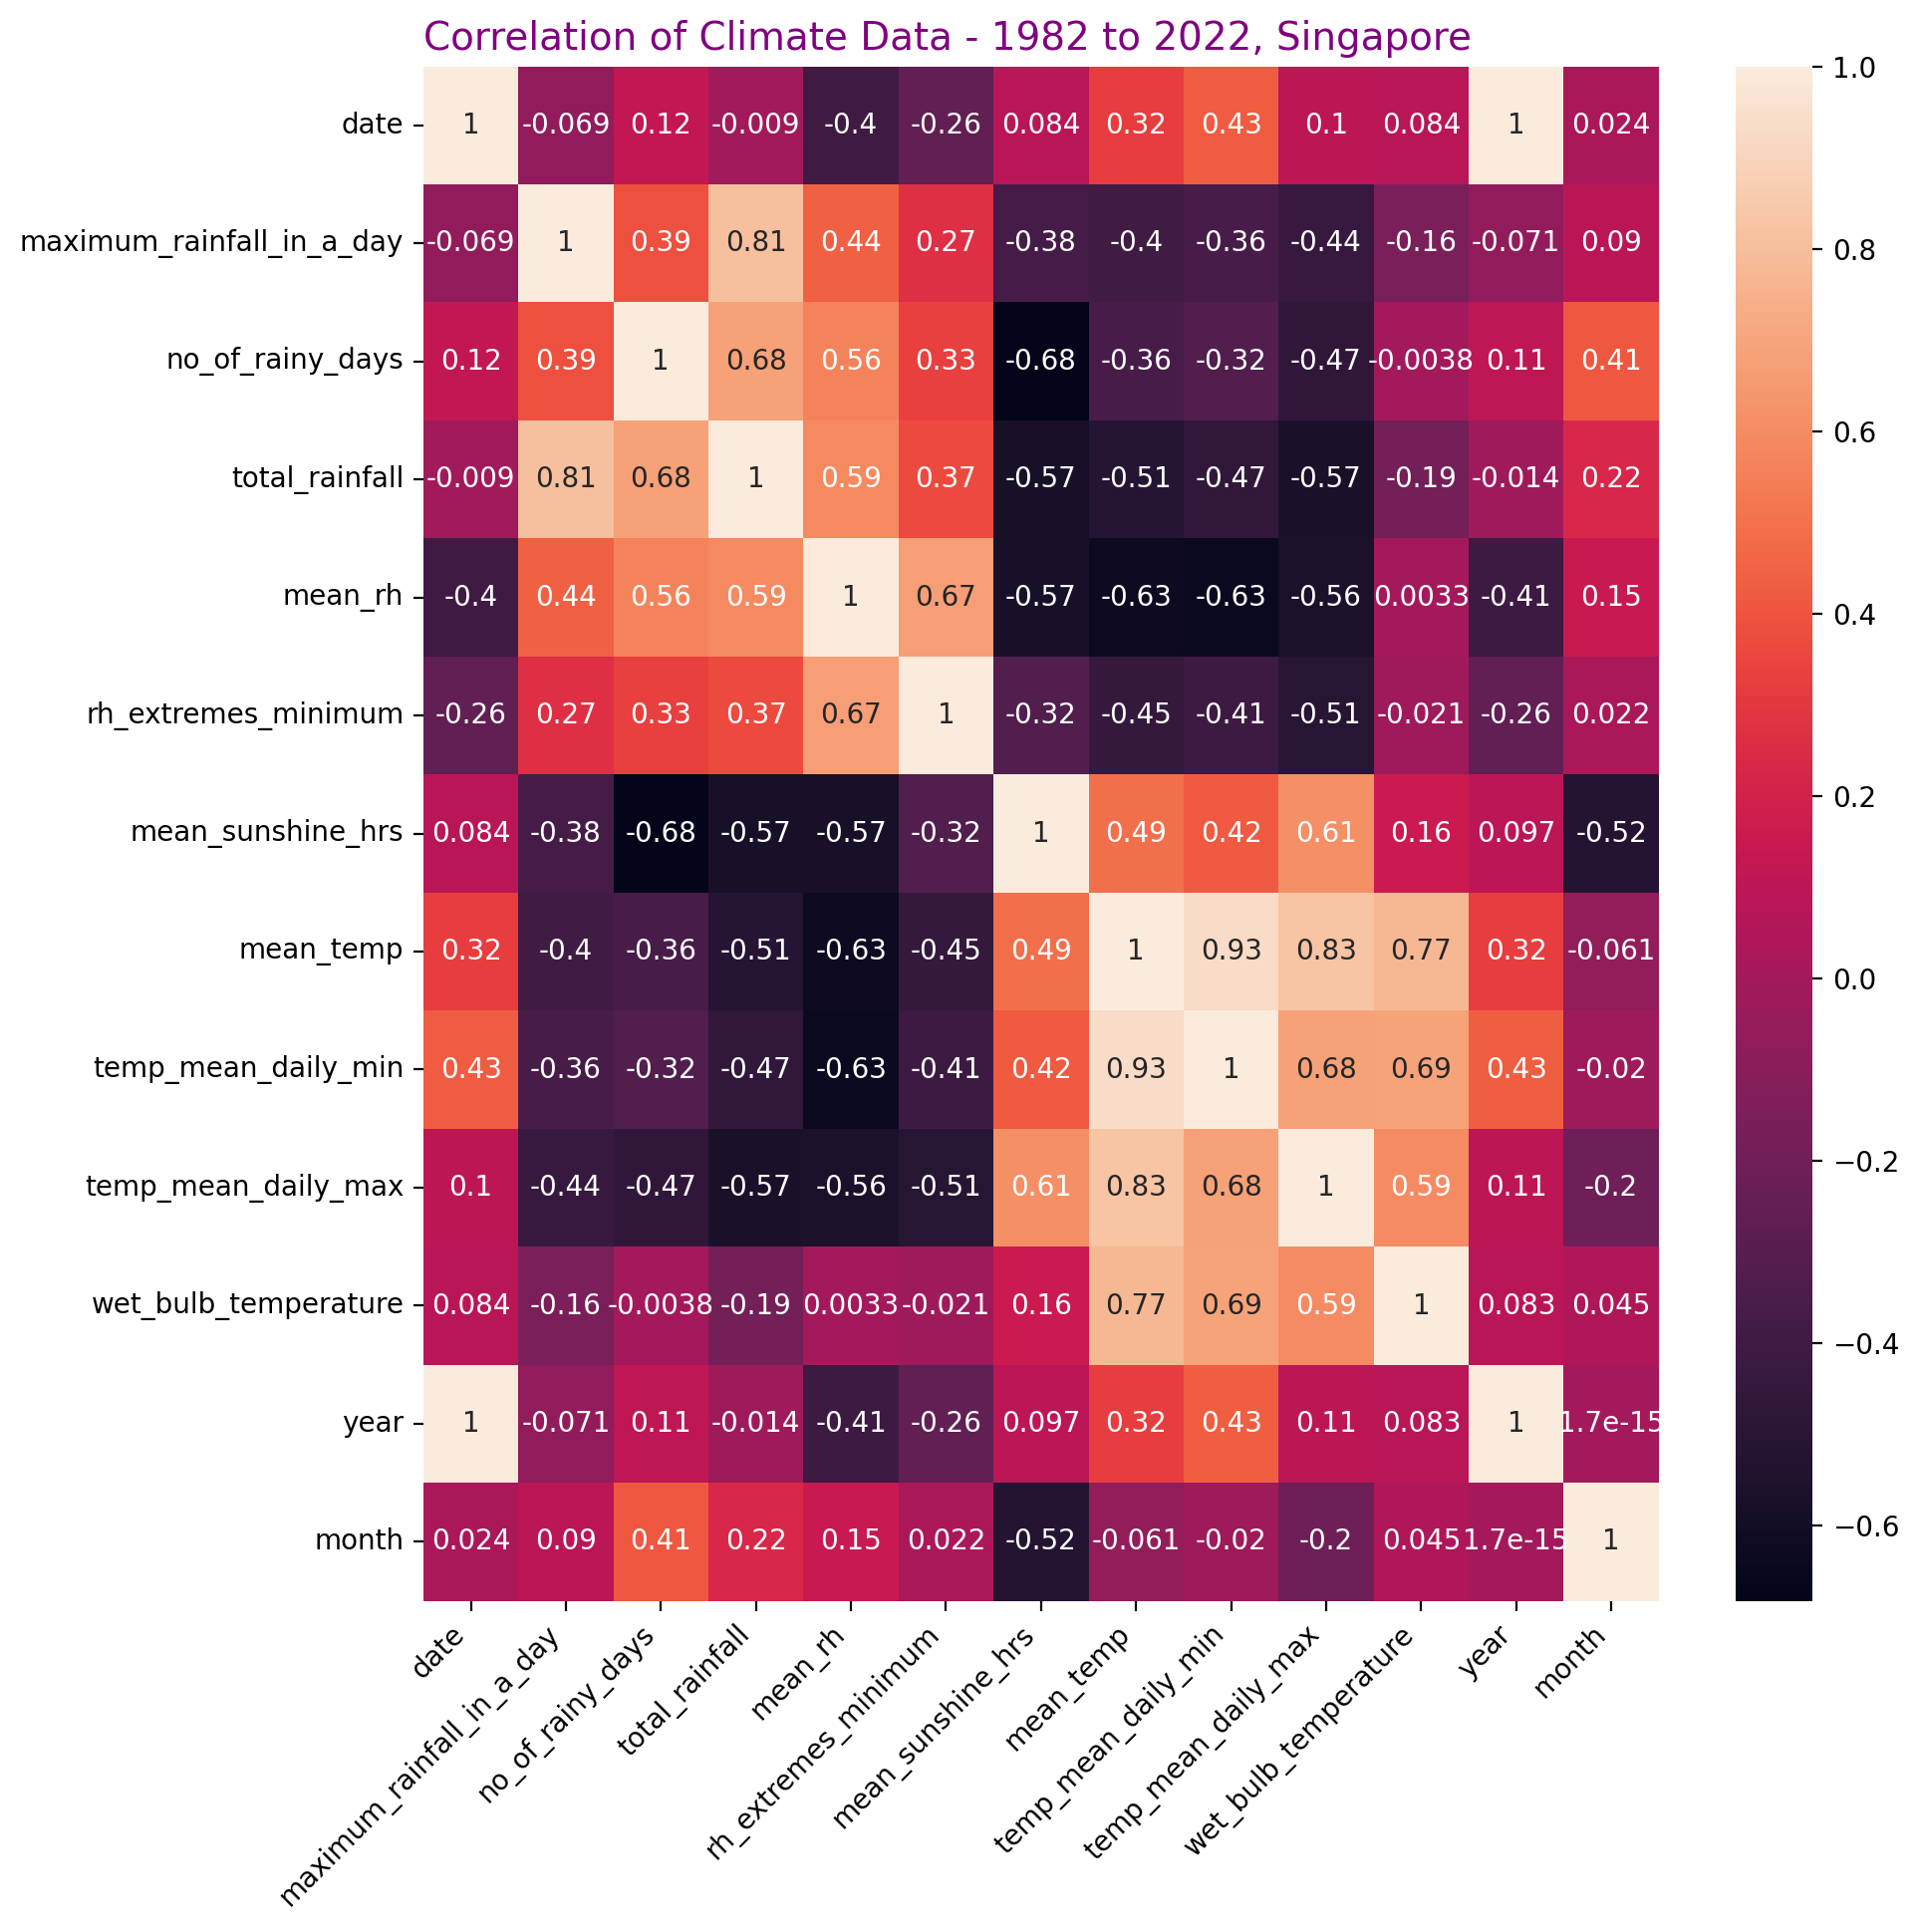

In [42]:
# Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features.
plt.figure(figsize=(10,10))
plt.title("Correlation of Climate Data - 1982 to 2022, Singapore", loc='left', color='purple', size=14)
g = sns.heatmap(climate.corr(numeric_only=False),annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right', color='black')
None # prevent the list of label objects showing up annoyingly in the output›

Is there a correlation between the maximum_rainfall_in_a_day and total_rainfall in the month? 

Correlation between maximum_rainfall_in_a_day and total_rainfall is 0.8069283973567382 which indicates a very strong positive correlation between the two variables.


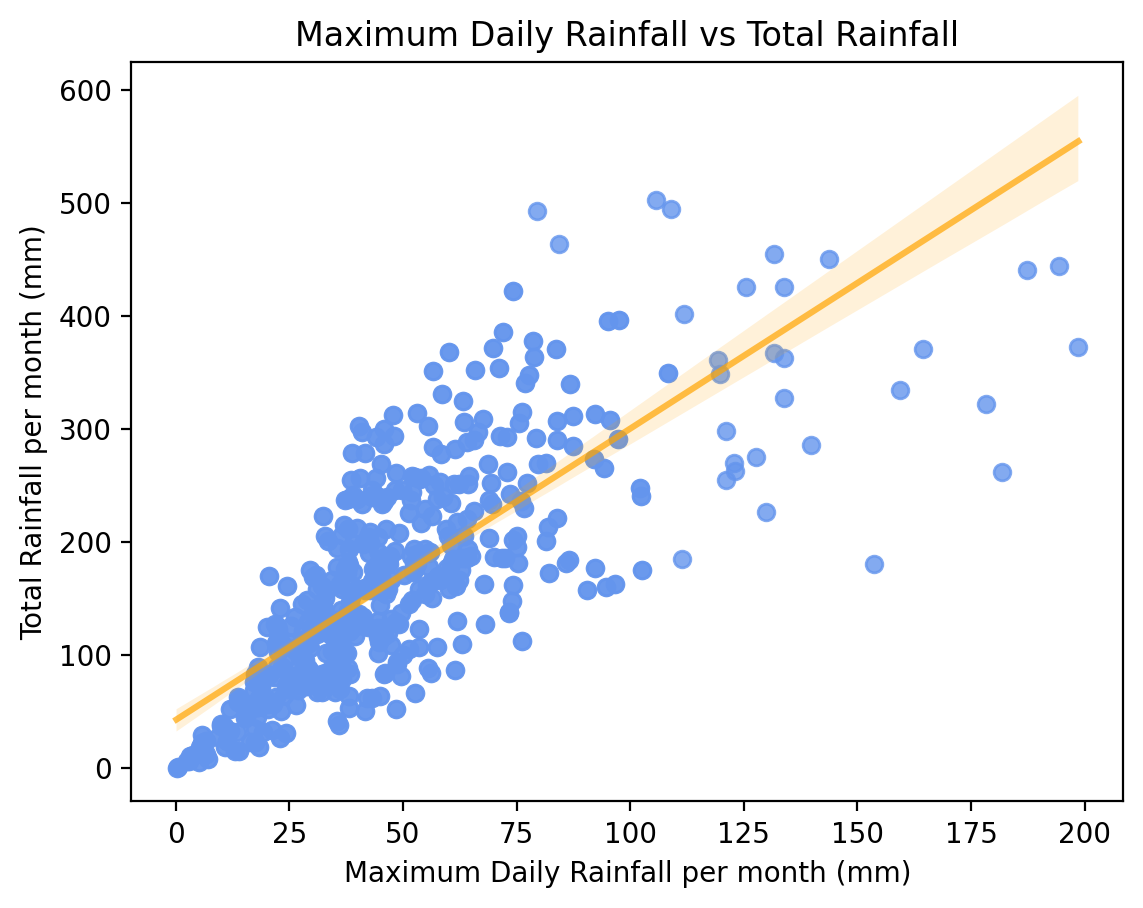

In [43]:
# Is there a correlation between the maximum_rainfall_in_a_day and total_rainfall in the month? 
# What kind of correlation do your suspect? Does the graph show the same?
df=climate
col1='maximum_rainfall_in_a_day'
col2='total_rainfall'
title='Maximum Daily Rainfall vs Total Rainfall'
xlabel='Maximum Daily Rainfall per month (mm)'
ylabel='Total Rainfall per month (mm)'
remove_outliers_reg(df,col1, col2,title,xlabel,ylabel)

Is there a correlation between the maximum_rainfall_in_a_day and mean_rh in the month? 

Correlation between maximum_rainfall_in_a_day and mean_rh is 0.4386586341923953 which indicates a moderate positive correlation between the two variables.


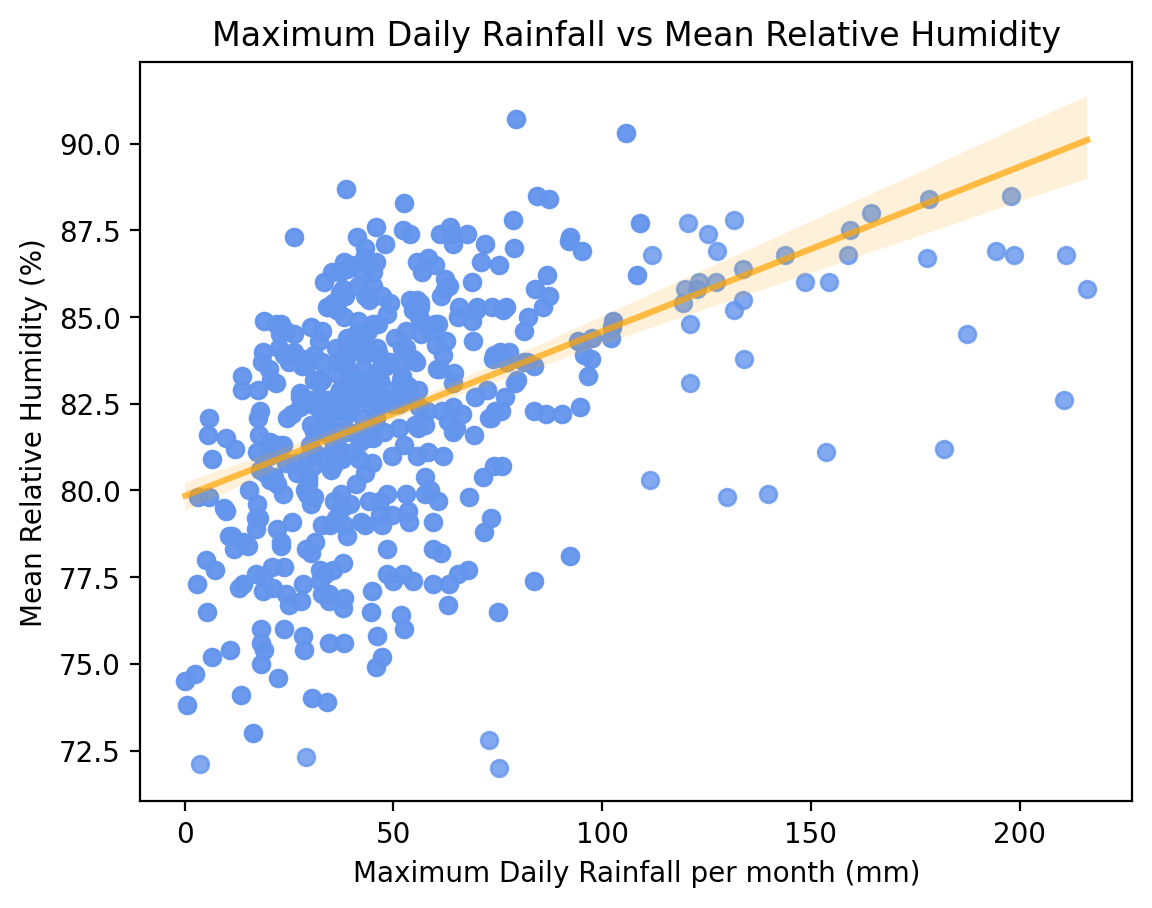

In [44]:
df=climate
col1='maximum_rainfall_in_a_day'
col2='mean_rh'
title='Maximum Daily Rainfall vs Mean Relative Humidity'
xlabel='Maximum Daily Rainfall per month (mm)'
ylabel='Mean Relative Humidity (%)'

remove_outliers_reg(df,col1, col2,title,xlabel,ylabel)

Is there a correlation between the number of rainy days and total_rainfall in the month? 

Correlation between no_of_rainy_days and total_rainfall is 0.6843292946650268 which indicates a strong positive correlation between the two variables.


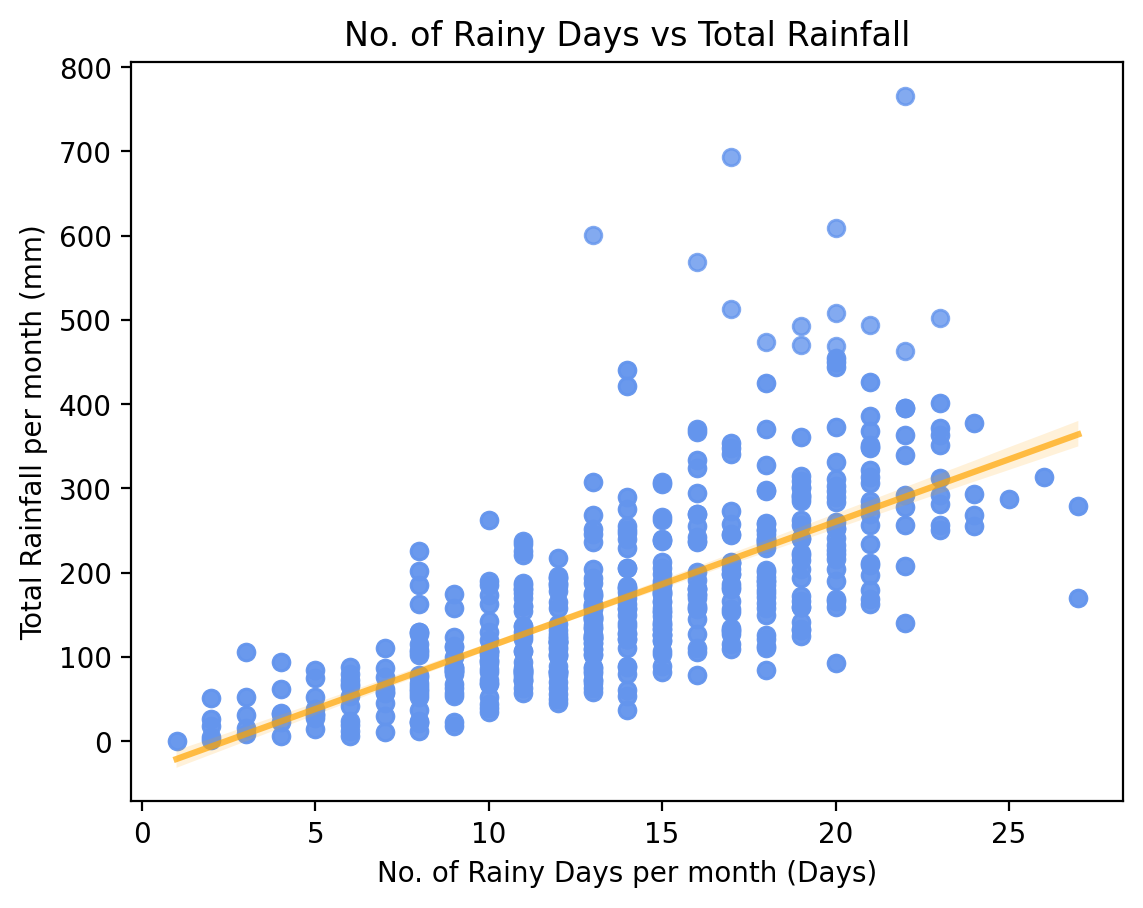

In [45]:
df=climate
col1='no_of_rainy_days'
col2='total_rainfall'
title='No. of Rainy Days vs Total Rainfall'
xlabel='No. of Rainy Days per month (Days)'
ylabel='Total Rainfall per month (mm)'

remove_outliers_reg(df,col1, col2,title,xlabel,ylabel)

Is there a correlation between the number of rainy days and mean_rh in the month? 

Correlation between no_of_rainy_days and mean_rh is 0.5626841030345143 which indicates a moderate positive correlation between the two variables.


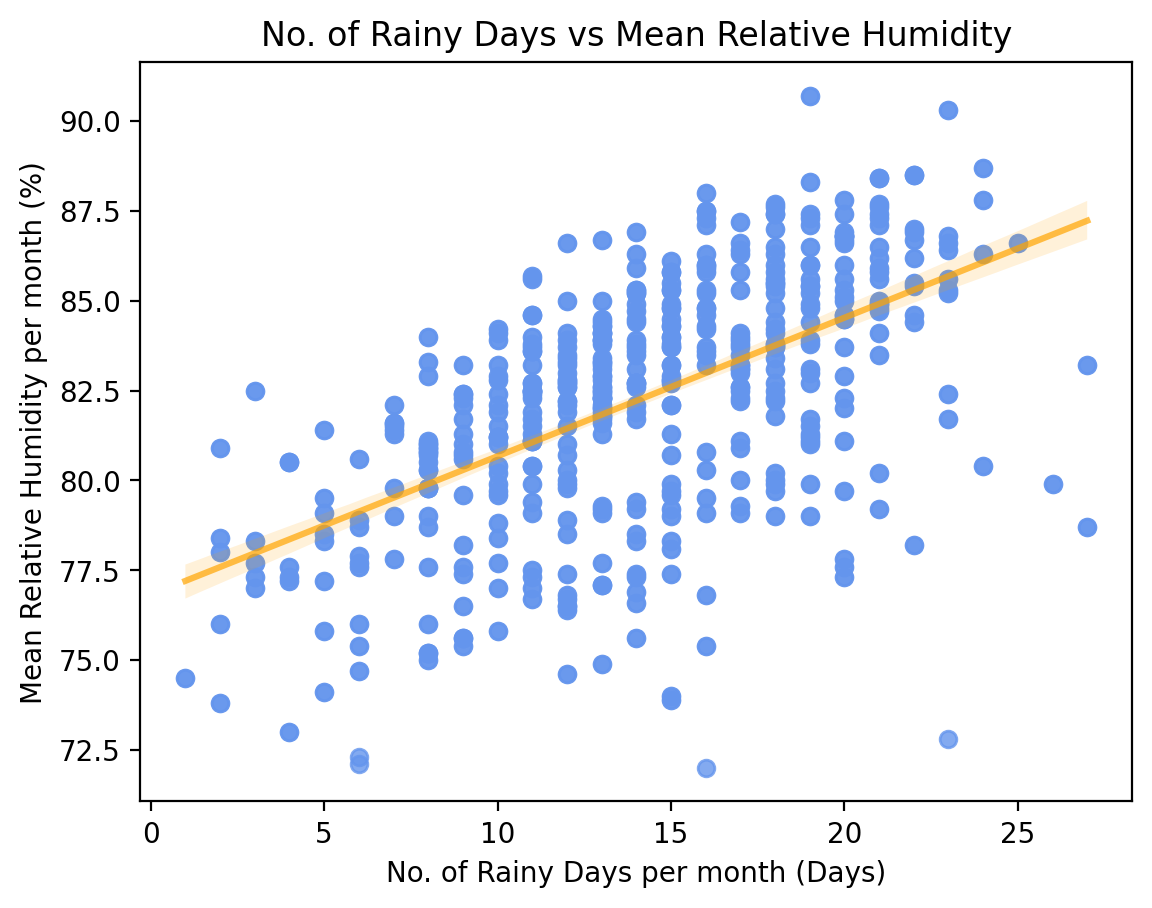

In [46]:
df=climate
col1='no_of_rainy_days'
col2='mean_rh'
title='No. of Rainy Days vs Mean Relative Humidity'
xlabel='No. of Rainy Days per month (Days)'
ylabel='Mean Relative Humidity per month (%)'

remove_outliers_reg(df,col1, col2,title,xlabel,ylabel)

Is there a correlation between the number of rainy days and mean_rh in the month?

Correlation between mean_rh and mean_temp is -0.6277385443573232 which indicates a strong negative correlation between the two variables.


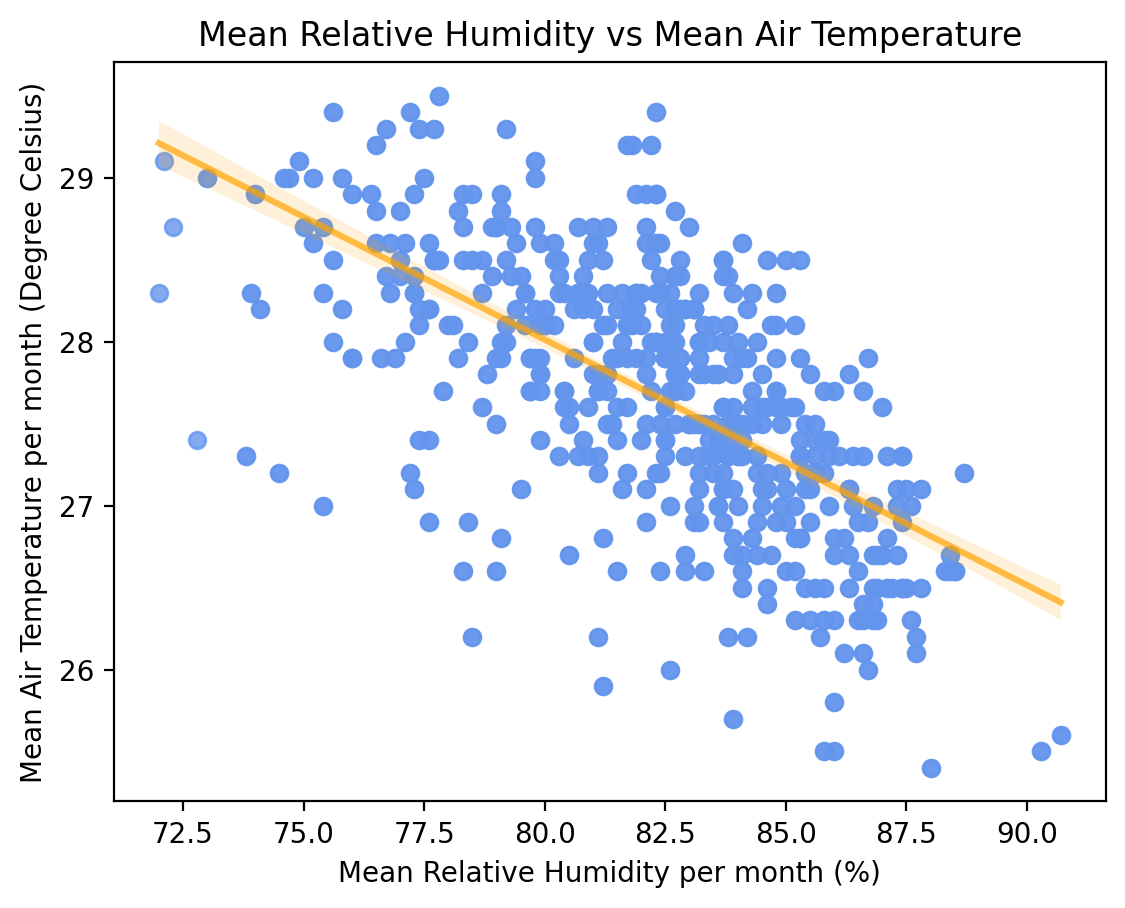

In [47]:
df=climate
col1='mean_rh'
col2='mean_temp'
title='Mean Relative Humidity vs Mean Air Temperature'
xlabel='Mean Relative Humidity per month (%)'
ylabel='Mean Air Temperature per month (Degree Celsius)'

remove_outliers_reg(df,col1, col2,title,xlabel,ylabel)

Correlation between mean_sunshine_hrs and no_of_rainy_days is -0.6825644097696362 which indicates a strong negative correlation between the two variables.


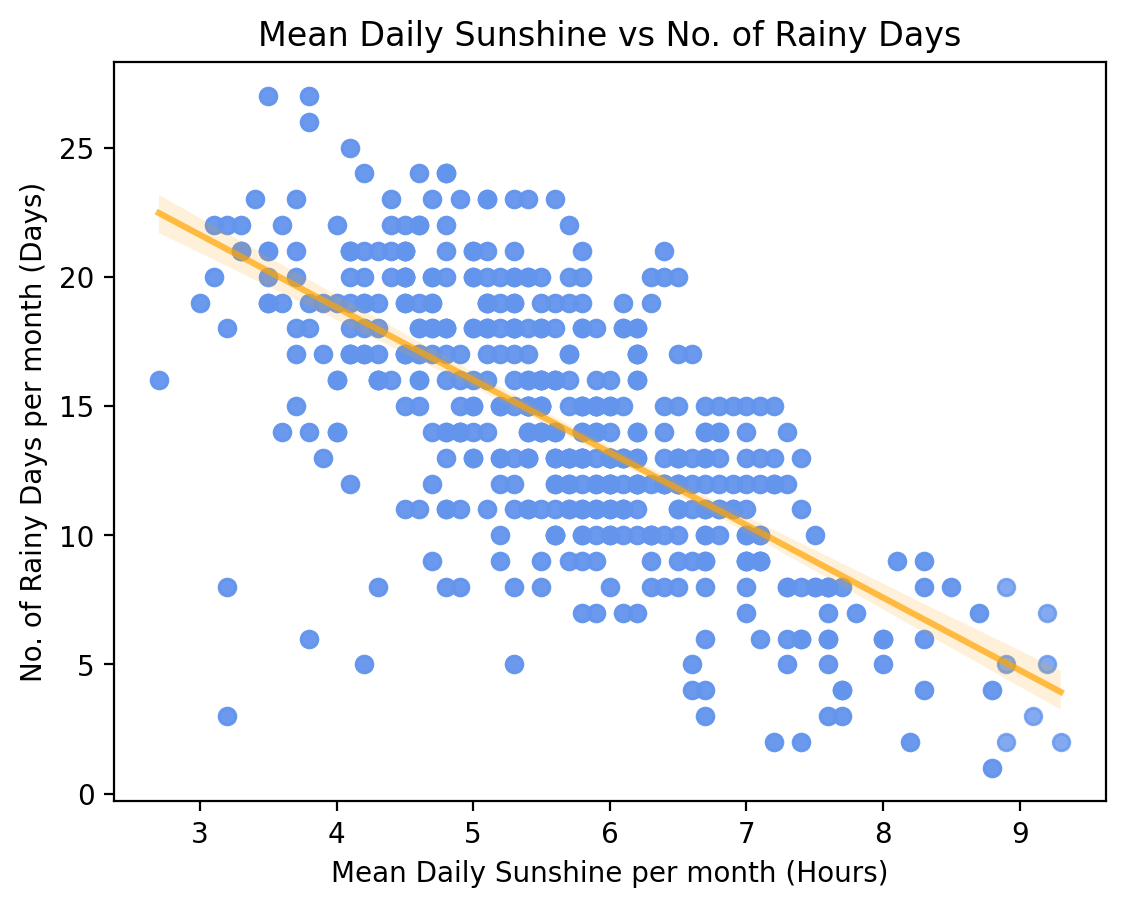

In [48]:
df=climate
col1='mean_sunshine_hrs'
col2='no_of_rainy_days'
title='Mean Daily Sunshine vs No. of Rainy Days'
xlabel='Mean Daily Sunshine per month (Hours)'
ylabel='No. of Rainy Days per month (Days)'

remove_outliers_reg(df,col1, col2,title,xlabel,ylabel)

Correlation between mean_sunshine_hrs and temp_mean_daily_max is 0.6109751896467938 which indicates a strong positive correlation between the two variables.


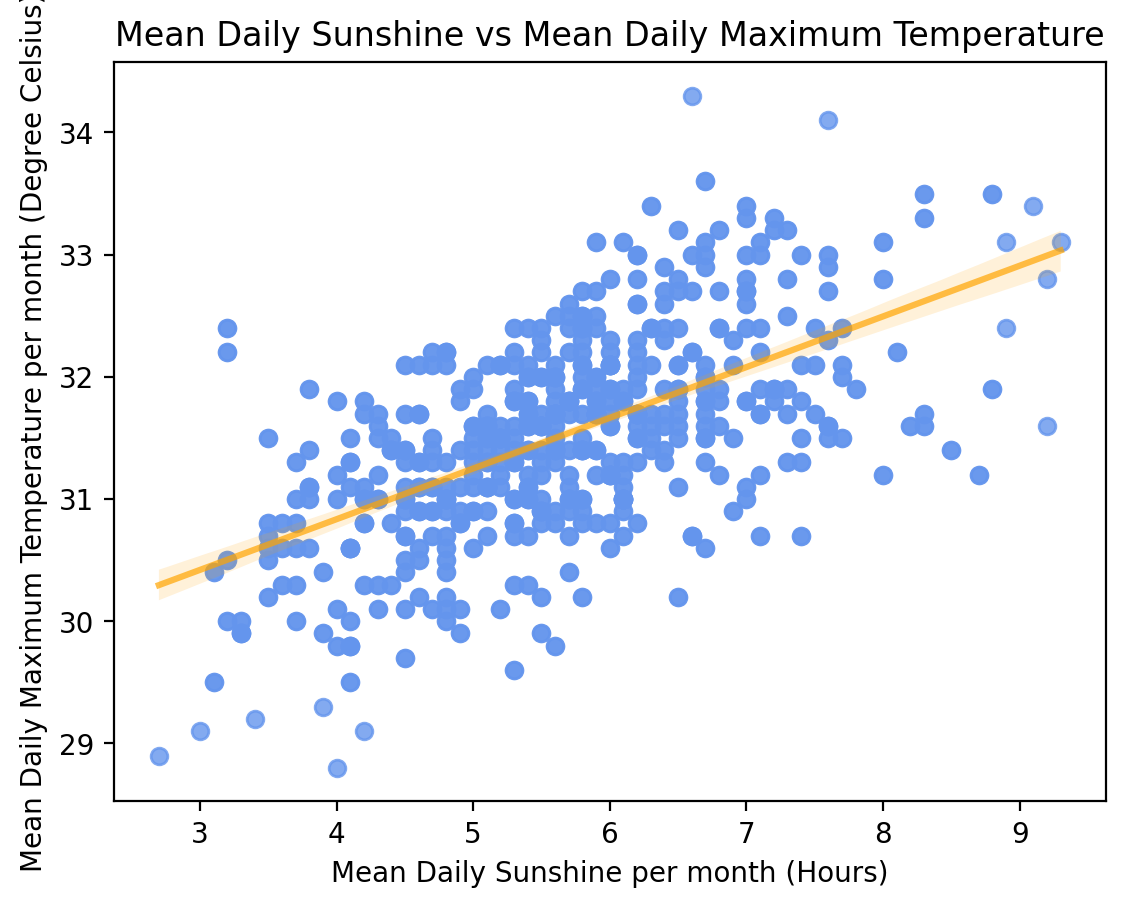

In [49]:
df=climate
col1='mean_sunshine_hrs'
col2='temp_mean_daily_max'
title='Mean Daily Sunshine vs Mean Daily Maximum Temperature'
xlabel='Mean Daily Sunshine per month (Hours)'
ylabel='Mean Daily Maximum Temperature per month (Degree Celsius)'

remove_outliers_reg(df,col1, col2,title,xlabel,ylabel)

Correlation between mean_temp and wet_bulb_temperature is 0.7747222410765741 which indicates a strong positive correlation between the two variables.


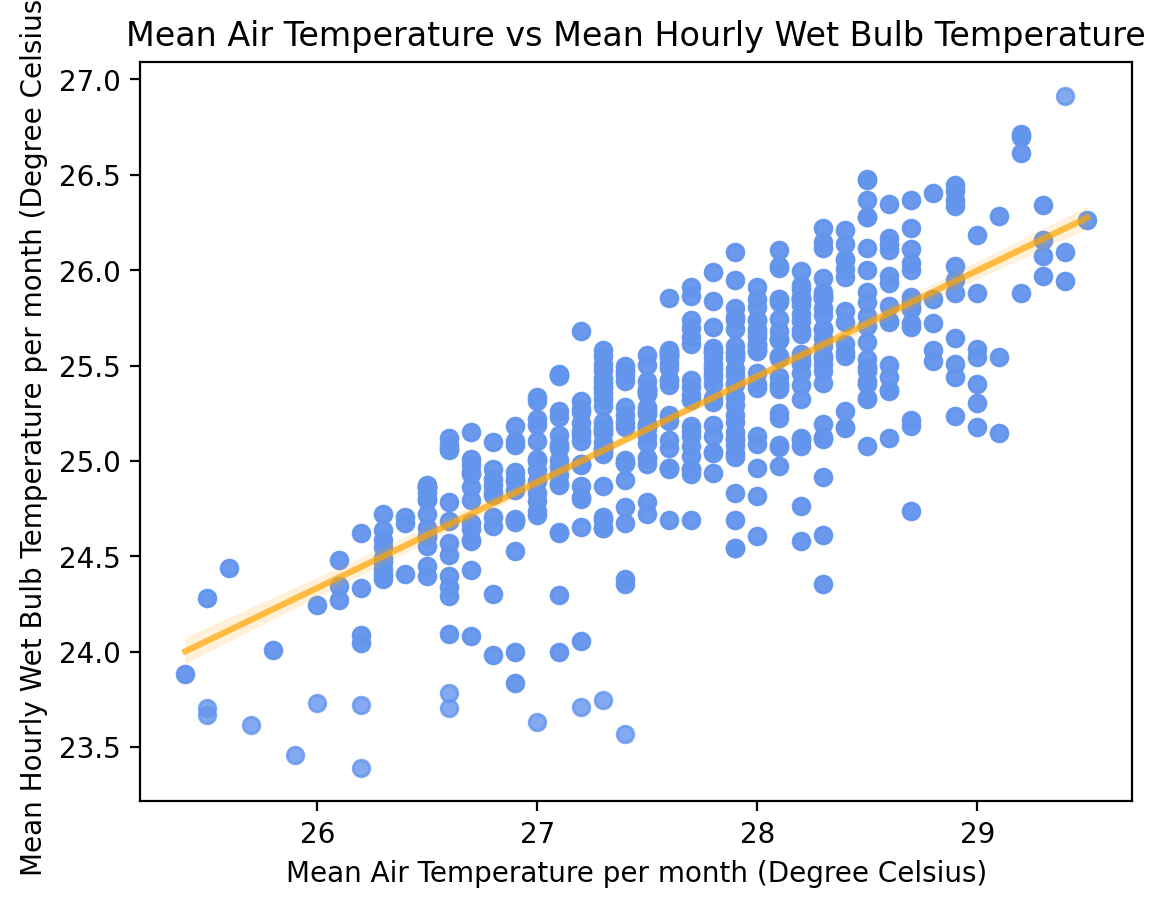

In [50]:
df=climate
col1='mean_temp'
col2='wet_bulb_temperature'
title='Mean Air Temperature vs Mean Hourly Wet Bulb Temperature'
xlabel='Mean Air Temperature per month (Degree Celsius)'
ylabel='Mean Hourly Wet Bulb Temperature per month (Degree Celsius)'

remove_outliers_reg(df,col1, col2,title,xlabel,ylabel)

Visualize distribution of 'maximum_rainfall_in_a_day' using histograms and other plots.

Statistical Data for maximum_rainfall_in_a_day
Mean: 44.47697368421053
Standard Deviation: 21.562539159317677
p: 1.2024711395497434e-06
Since p <= 0.05, it can be concluded that maximum_rainfall_in_a_day does not follow a normal distribution (reject H0)
Distribution of maximum_rainfall_in_a_day is positively skewed, with skew at: 0.5432147776863809


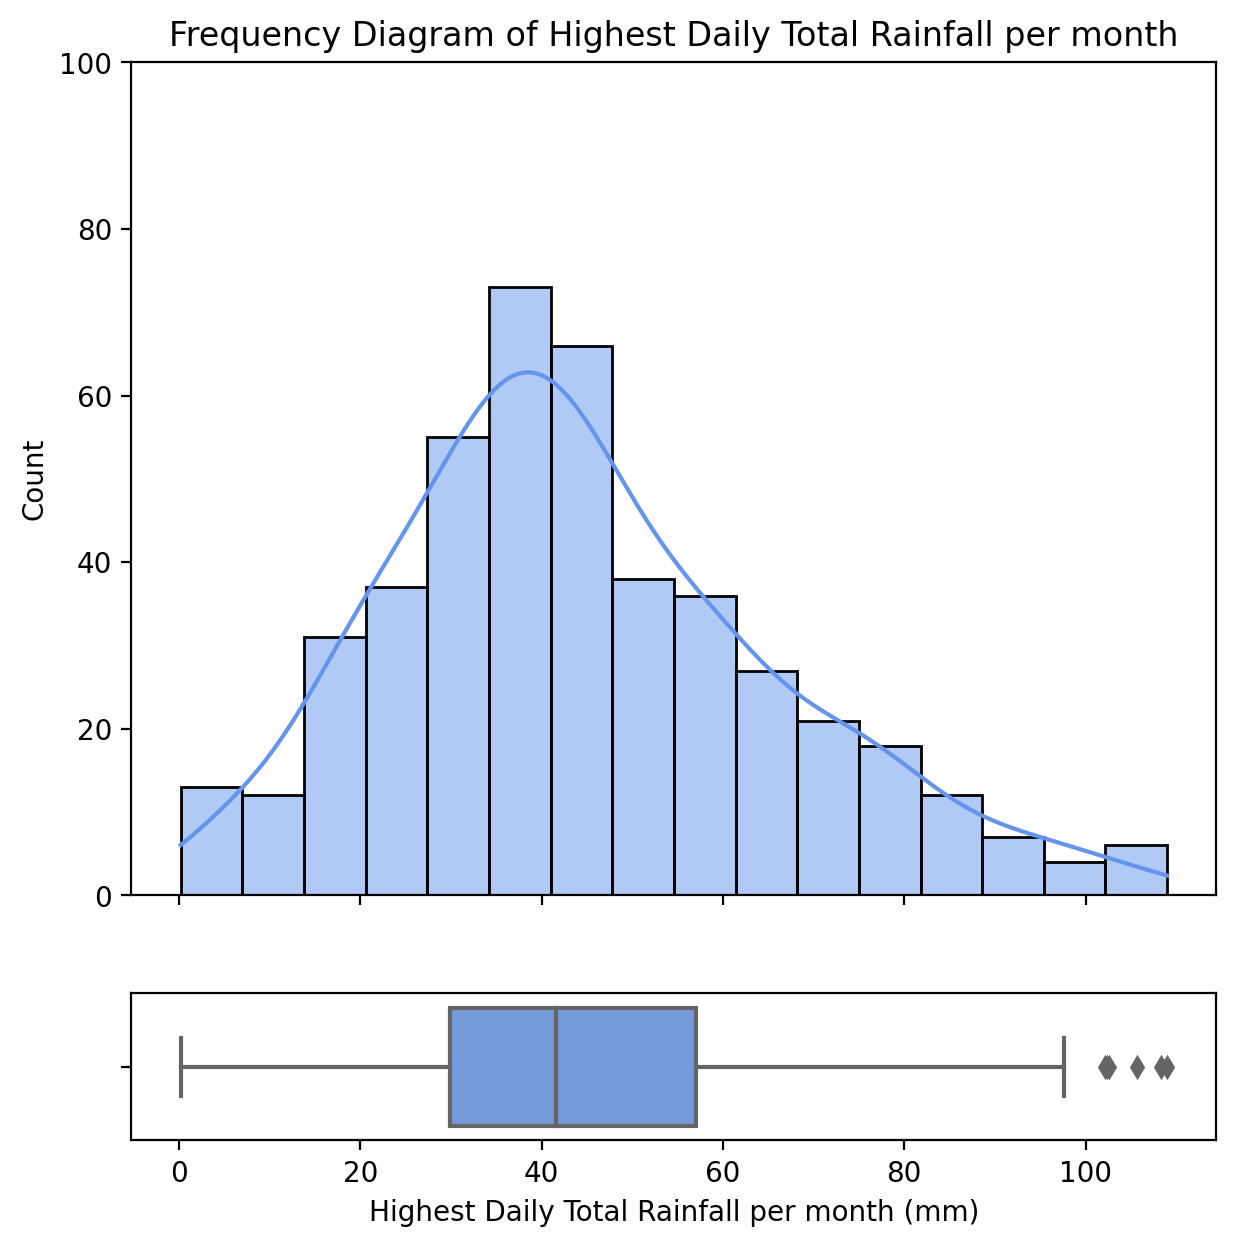

In [51]:
col='maximum_rainfall_in_a_day'
filt=remove_outlier(climate, col)

df=filt

#plot subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True,gridspec_kw={"height_ratios": (.85, .15)})

sns.histplot(data=df,x=col, kde=True,ax=axes[0], color='cornflowerblue').set(title='Frequency Diagram of Highest Daily Total Rainfall per month',xlabel='Highest Daily Total Rainfall per month (mm)',ylim=(0,100))

#plot boxplot
sns.boxplot(data=df,x=col,ax=axes[1], color='cornflowerblue').set(title='',xlabel='Highest Daily Total Rainfall per month (mm)')
None

print(statistical_data(df,col))

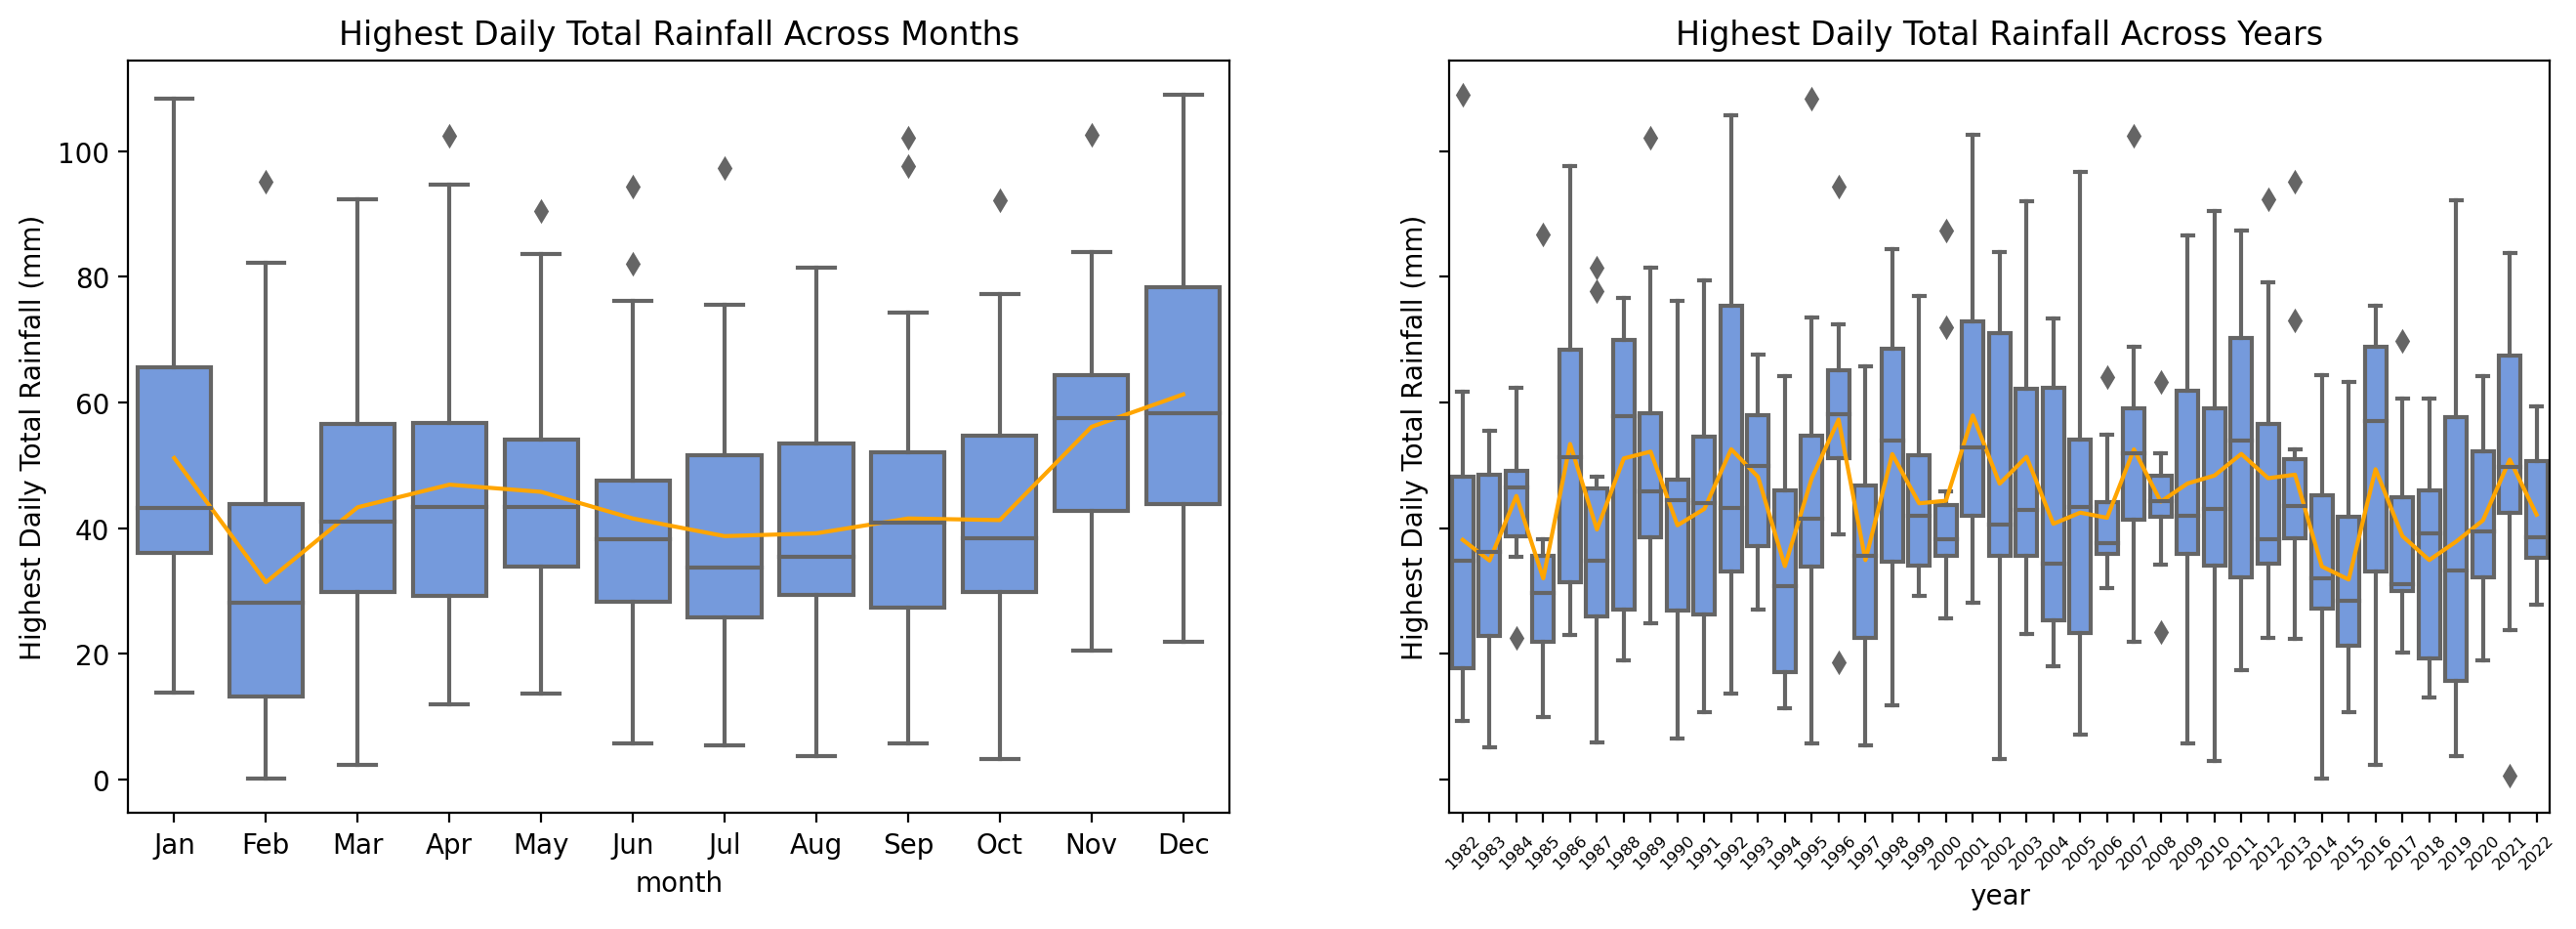

In [52]:
#create new cols for 'months' and 'years'
climate['month'] = climate['date'].dt.strftime('%m')
climate['year'] = climate['date'].dt.strftime('%Y')

# outliers / anomalies = above OR below mean plus OR minus 1.5 times the standard deviation
filt=remove_outlier(climate, 'maximum_rainfall_in_a_day')

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.boxplot(data=filt.sort_values(by='month'), x='month', y='maximum_rainfall_in_a_day', ax=axes[0],color='cornflowerblue', boxprops=dict(alpha=1)).set(title='Highest Daily Total Rainfall Across Months', ylabel='Highest Daily Total Rainfall (mm)')
sns.lineplot(data=filt.sort_values(by='month'), x='month', y='maximum_rainfall_in_a_day', ax=axes[0], color = 'orange',errorbar=None).set(title='Highest Daily Total Rainfall Across Months', ylabel='Highest Daily Total Rainfall (mm)')
axes[0].set_xticks(range(len(lst_months)),labels=lst_months)

sns.boxplot(data=filt.sort_values(by='year'), x='year', y='maximum_rainfall_in_a_day',ax=axes[1],color='cornflowerblue').set(title='Highest Daily Total Rainfall Across Years', ylabel='Highest Daily Total Rainfall (mm)')
sns.lineplot(data=filt.sort_values(by='year'), x='year', y='maximum_rainfall_in_a_day',ax=axes[1],color='orange',errorbar=None).set(title='Highest Daily Total Rainfall Across Years', ylabel='Highest Daily Total Rainfall (mm)')

axes[1].tick_params(rotation=45, labelsize=6)
None

Visualize distribution of 'no_of_rainy_days' using histograms and other plots.

Statistical Data for no_of_rainy_days
Mean: 14.121951219512194
Standard Deviation: 4.995452703457742
p: 0.0028392192907631397
Since p <= 0.05, it can be concluded that no_of_rainy_days does not follow a normal distribution (reject H0)
Distribution of no_of_rainy_days is negatively skewed, with skew at: -0.14387954073527903


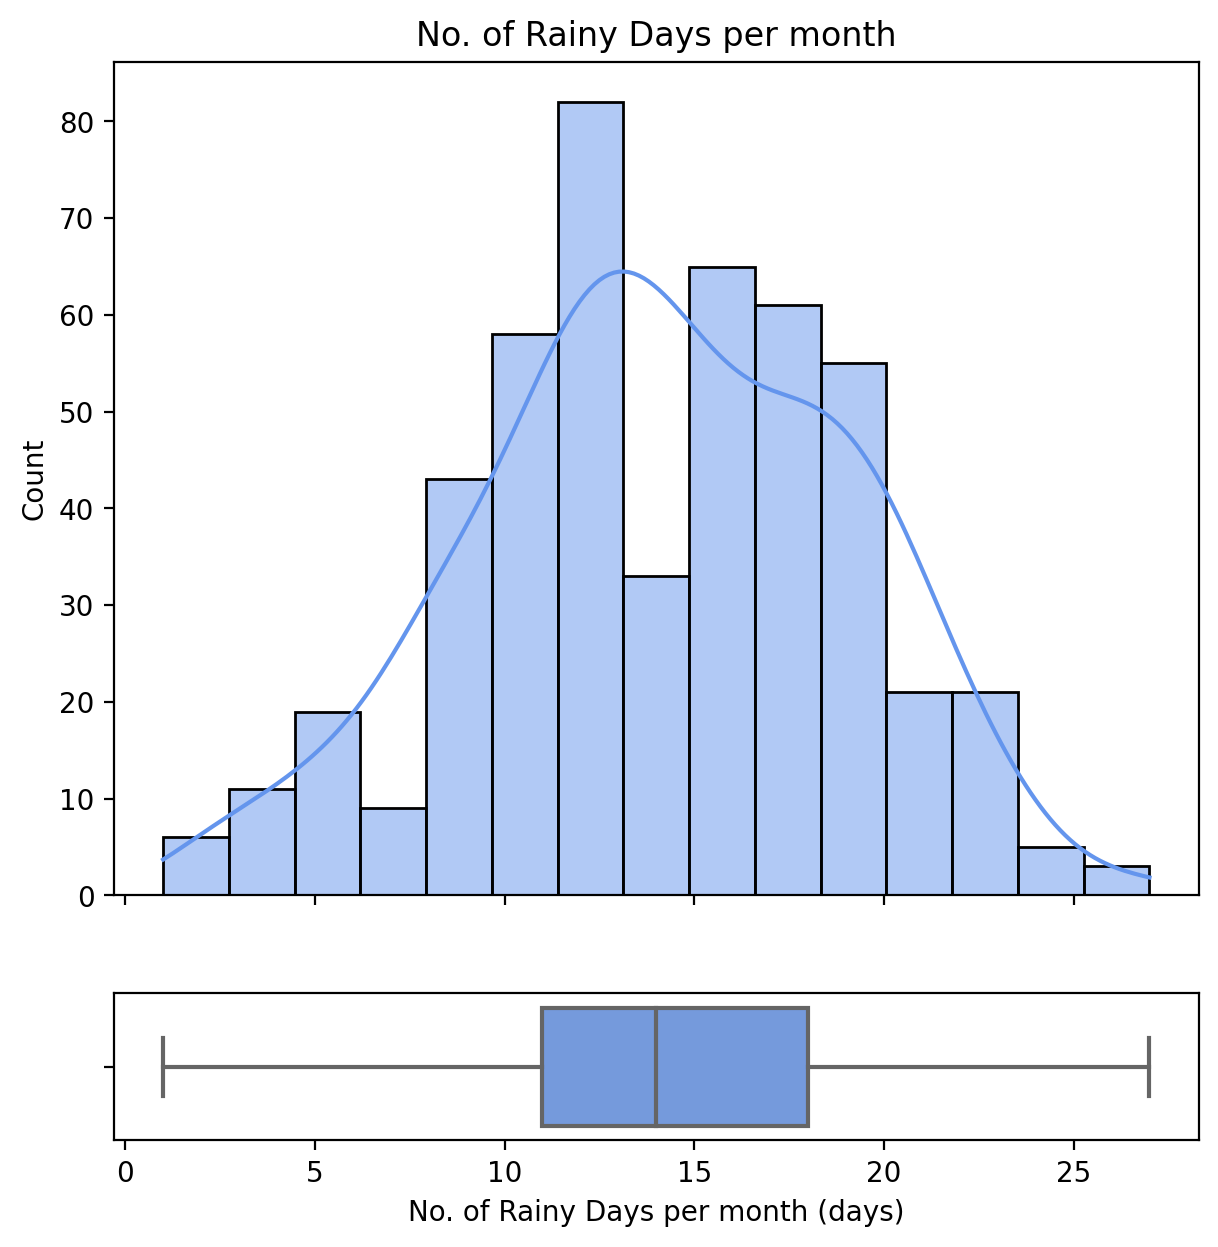

In [53]:
# outliers / anomalies = above OR below mean plus OR minus 1.5 times the standard deviation
col='no_of_rainy_days'
filt=remove_outlier(climate, col)

df=filt

# subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True,gridspec_kw={"height_ratios": (.85, .15)})

sns.histplot(df,x=col,kde=True,color='cornflowerblue',ax=axes[0]).set(title='No. of Rainy Days per month', xlabel='No. of Rainy Days per month (days)')

#plot boxplot
sns.boxplot(df,x=col,color='cornflowerblue').set(title='', xlabel='No. of Rainy Days per month (days)')
None

print(statistical_data(df,col))

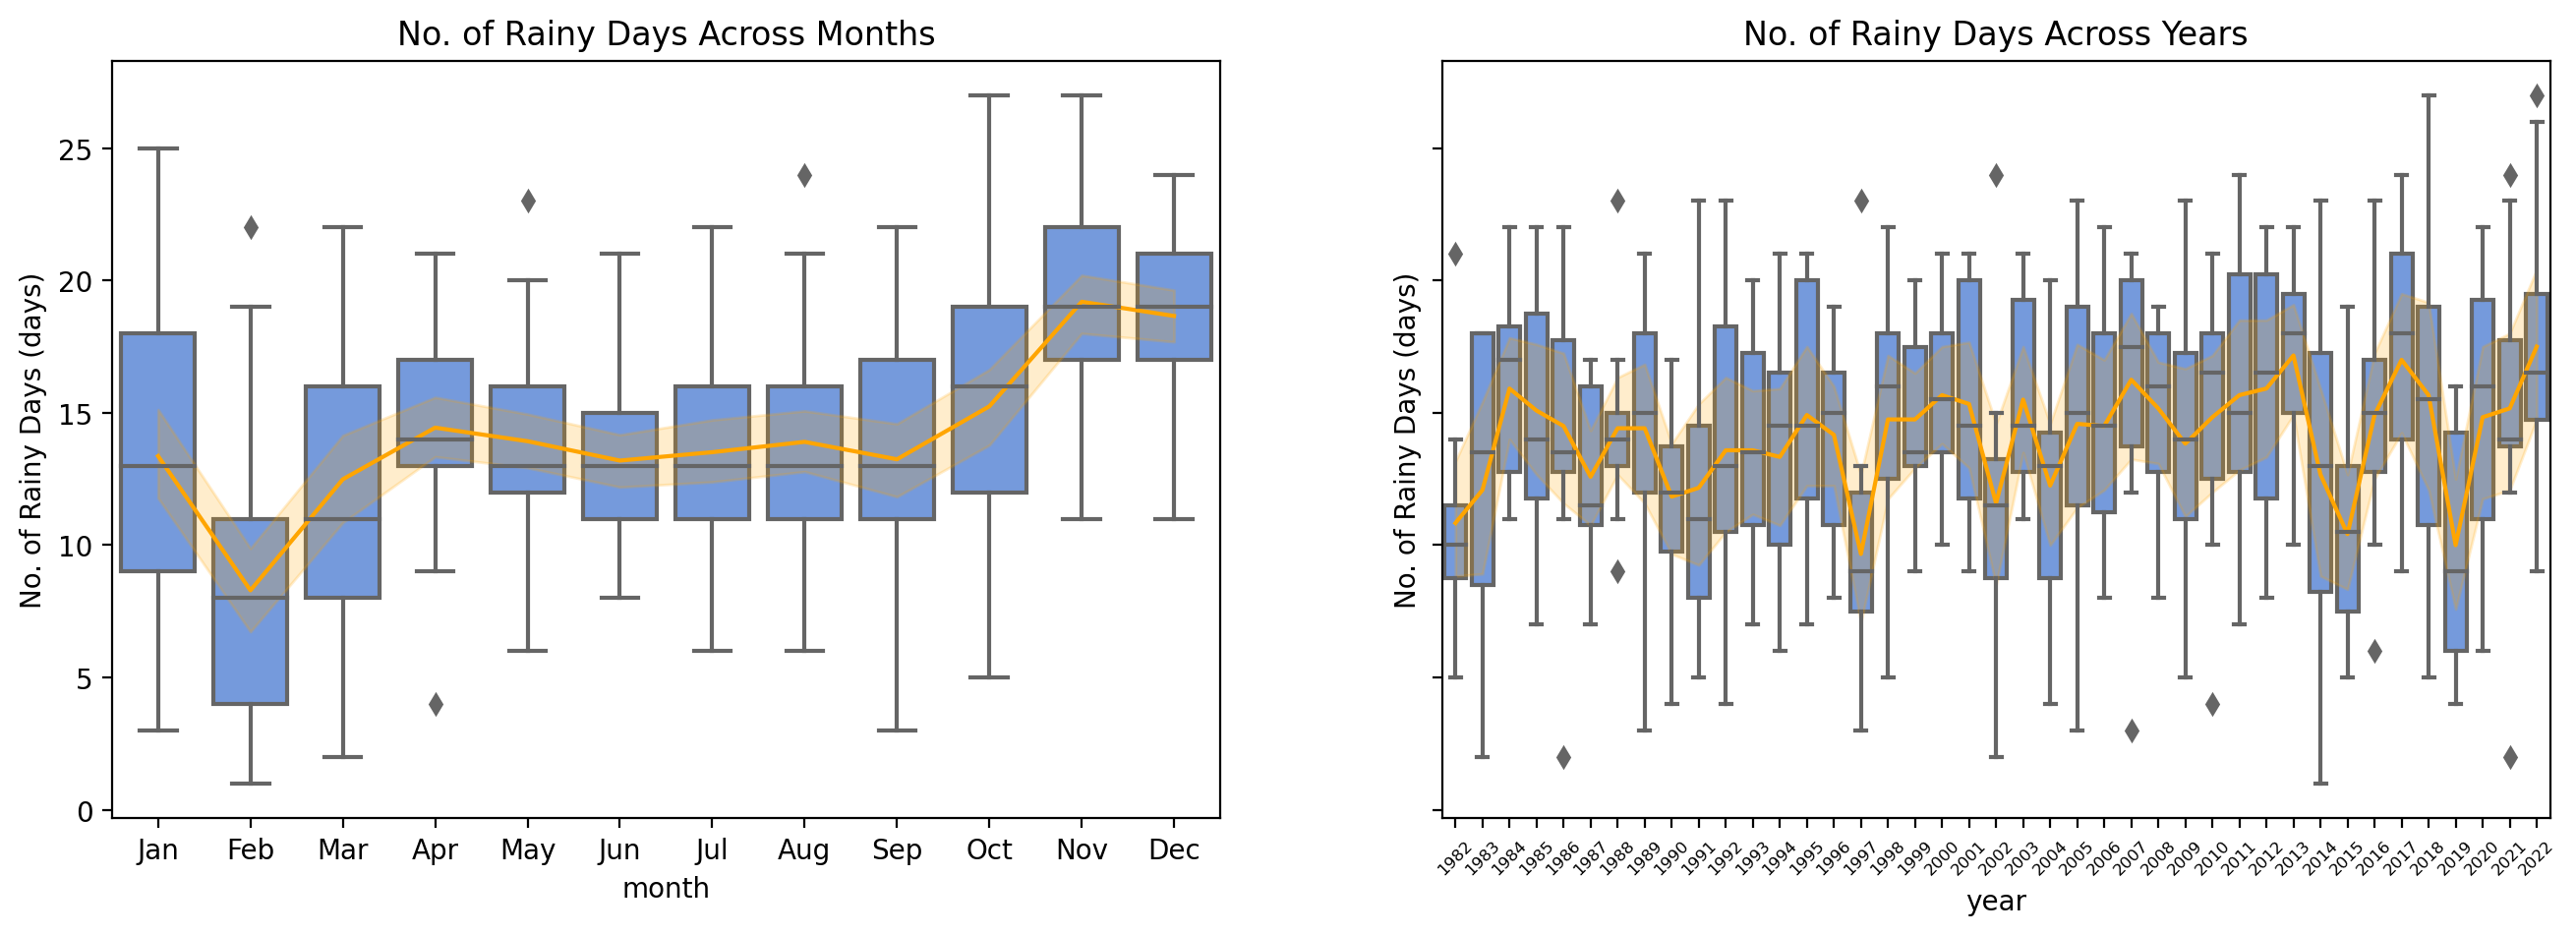

In [54]:
climate['month'] = filt['date'].dt.strftime('%b')
climate['year'] = climate['date'].dt.strftime('%Y')

# outliers / anomalies = above OR below mean plus OR minus 1.5 times the standard deviation
filt=remove_outlier(climate, 'no_of_rainy_days')

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.boxplot(data=filt, x='month', y='no_of_rainy_days', ax=axes[0], color='cornflowerblue',order=lst_months).set(title='No. of Rainy Days Across Months', ylabel='No. of Rainy Days (days)')
sns.lineplot(data=filt, x='month', y='no_of_rainy_days', ax=axes[0], color='orange').set(title='No. of Rainy Days Across Months', ylabel='No. of Rainy Days (days)')
axes[0].set_xticks(range(len(lst_months)),labels=lst_months)

sns.boxplot(data=filt, x='year', y='no_of_rainy_days',ax=axes[1], color='cornflowerblue',order=lst_years).set(title='No. of Rainy Days Across Years', ylabel='No. of Rainy Days (days)')
sns.lineplot(data=filt, x='year', y='no_of_rainy_days',ax=axes[1], color='orange').set(title='No. of Rainy Days Across Years', ylabel='No. of Rainy Days (days)')
axes[1].tick_params(rotation=45, labelsize=6)
None

Number of rainy days seems to be getting more erratic through the years. Visualize by plotting standard deviation across periods.

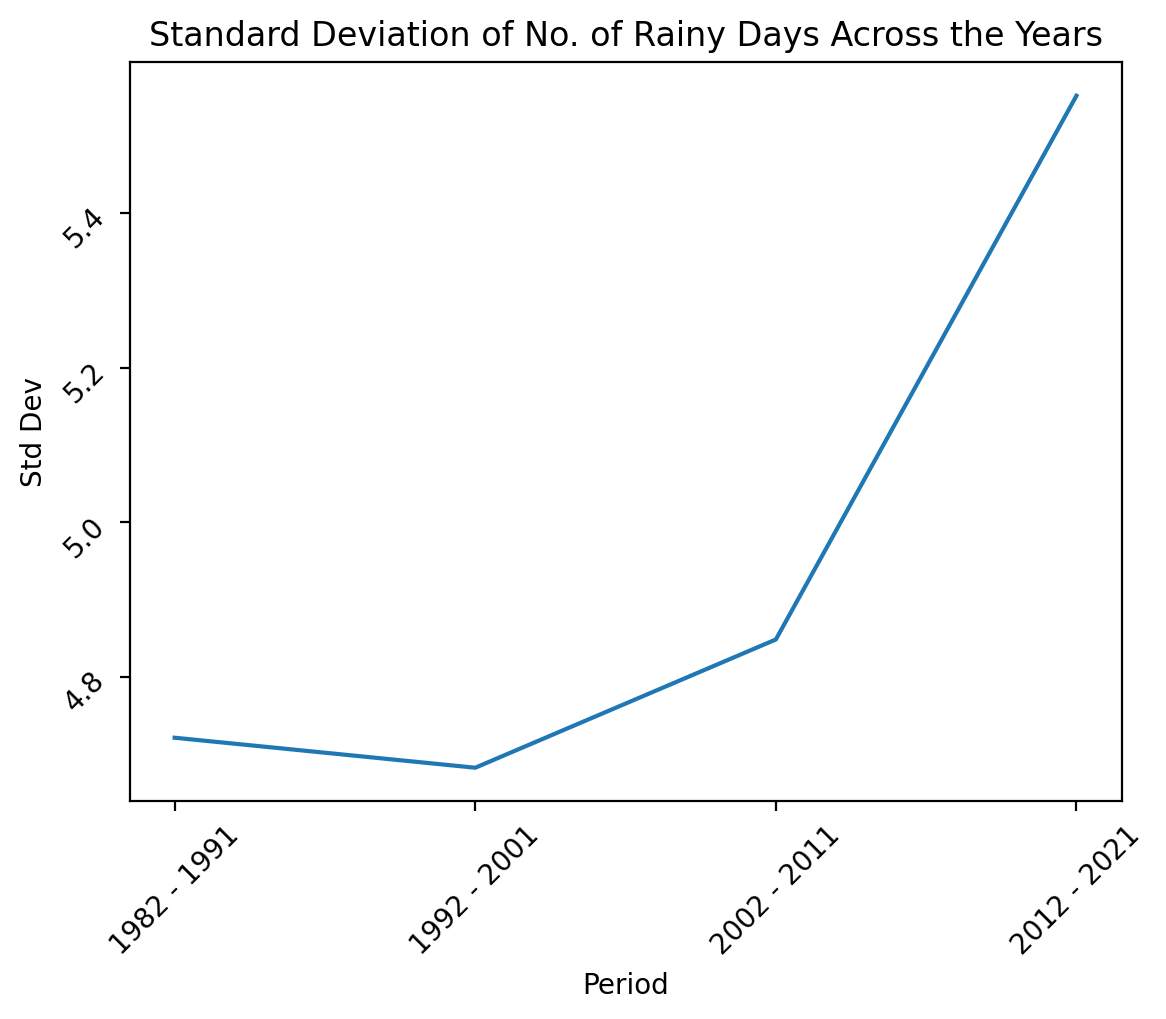

In [55]:
org_df=climate
col='no_of_rainy_days'
filt_df=remove_outlier(climate, col)
period=10
title='Standard Deviation of No. of Rainy Days Across the Years'

compare_std_period(climate,filt_df,col,period,title)

Visualize distribution of 'total_rainfall' using histograms and other plots.

Statistical Data for total_rainfall
Mean: 166.86297071129707
Standard Deviation: 94.96116534484575
p: 7.724340278514319e-09
Since p <= 0.05, it can be concluded that total_rainfall does not follow a normal distribution (reject H0)
Distribution of total_rainfall is positively skewed, with skew at: 0.6180175458498949


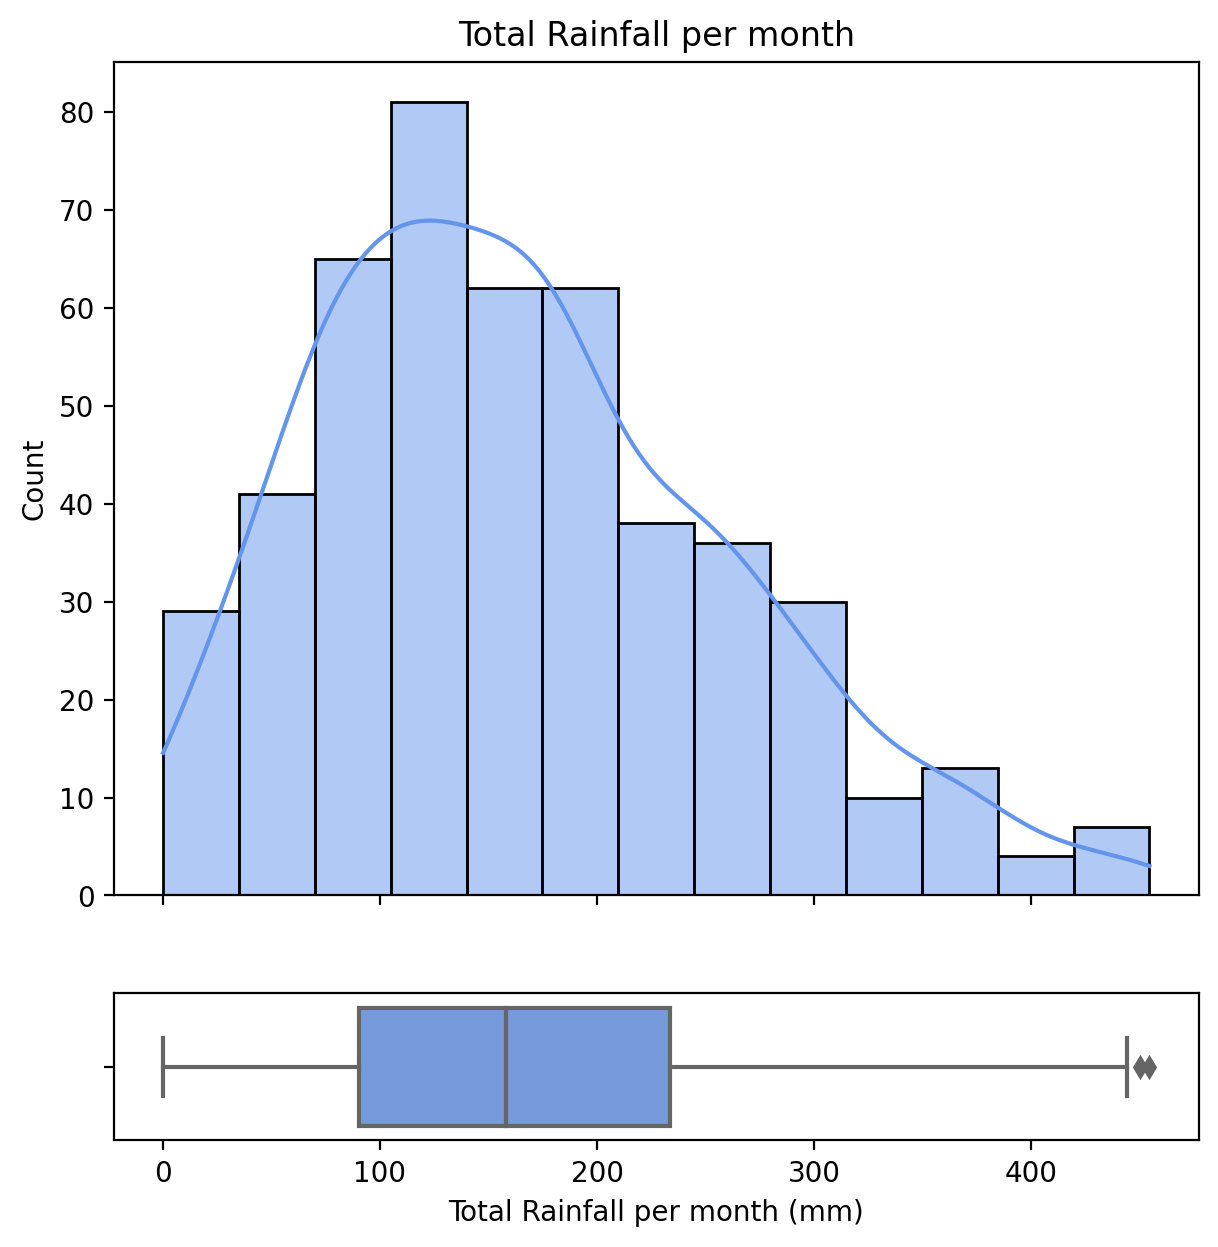

In [56]:
# outliers / anomalies = above OR below mean plus OR minus 1.5 times the standard deviation
col='total_rainfall'
filt=remove_outlier(climate,col)

df=filt

#plot subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True,gridspec_kw={"height_ratios": (.85, .15)})

# Plot the histogram.
sns.histplot(df,x=col,kde=True,color='cornflowerblue',ax=axes[0]).set(title='Total Rainfall per month',xlabel='Total Rainfall per month (mm)')

#plot boxplot
sns.boxplot(df,x=col, color='cornflowerblue', ax=axes[1]).set(title='',xlabel='Total Rainfall per month (mm)')
None

print(statistical_data(df,col))

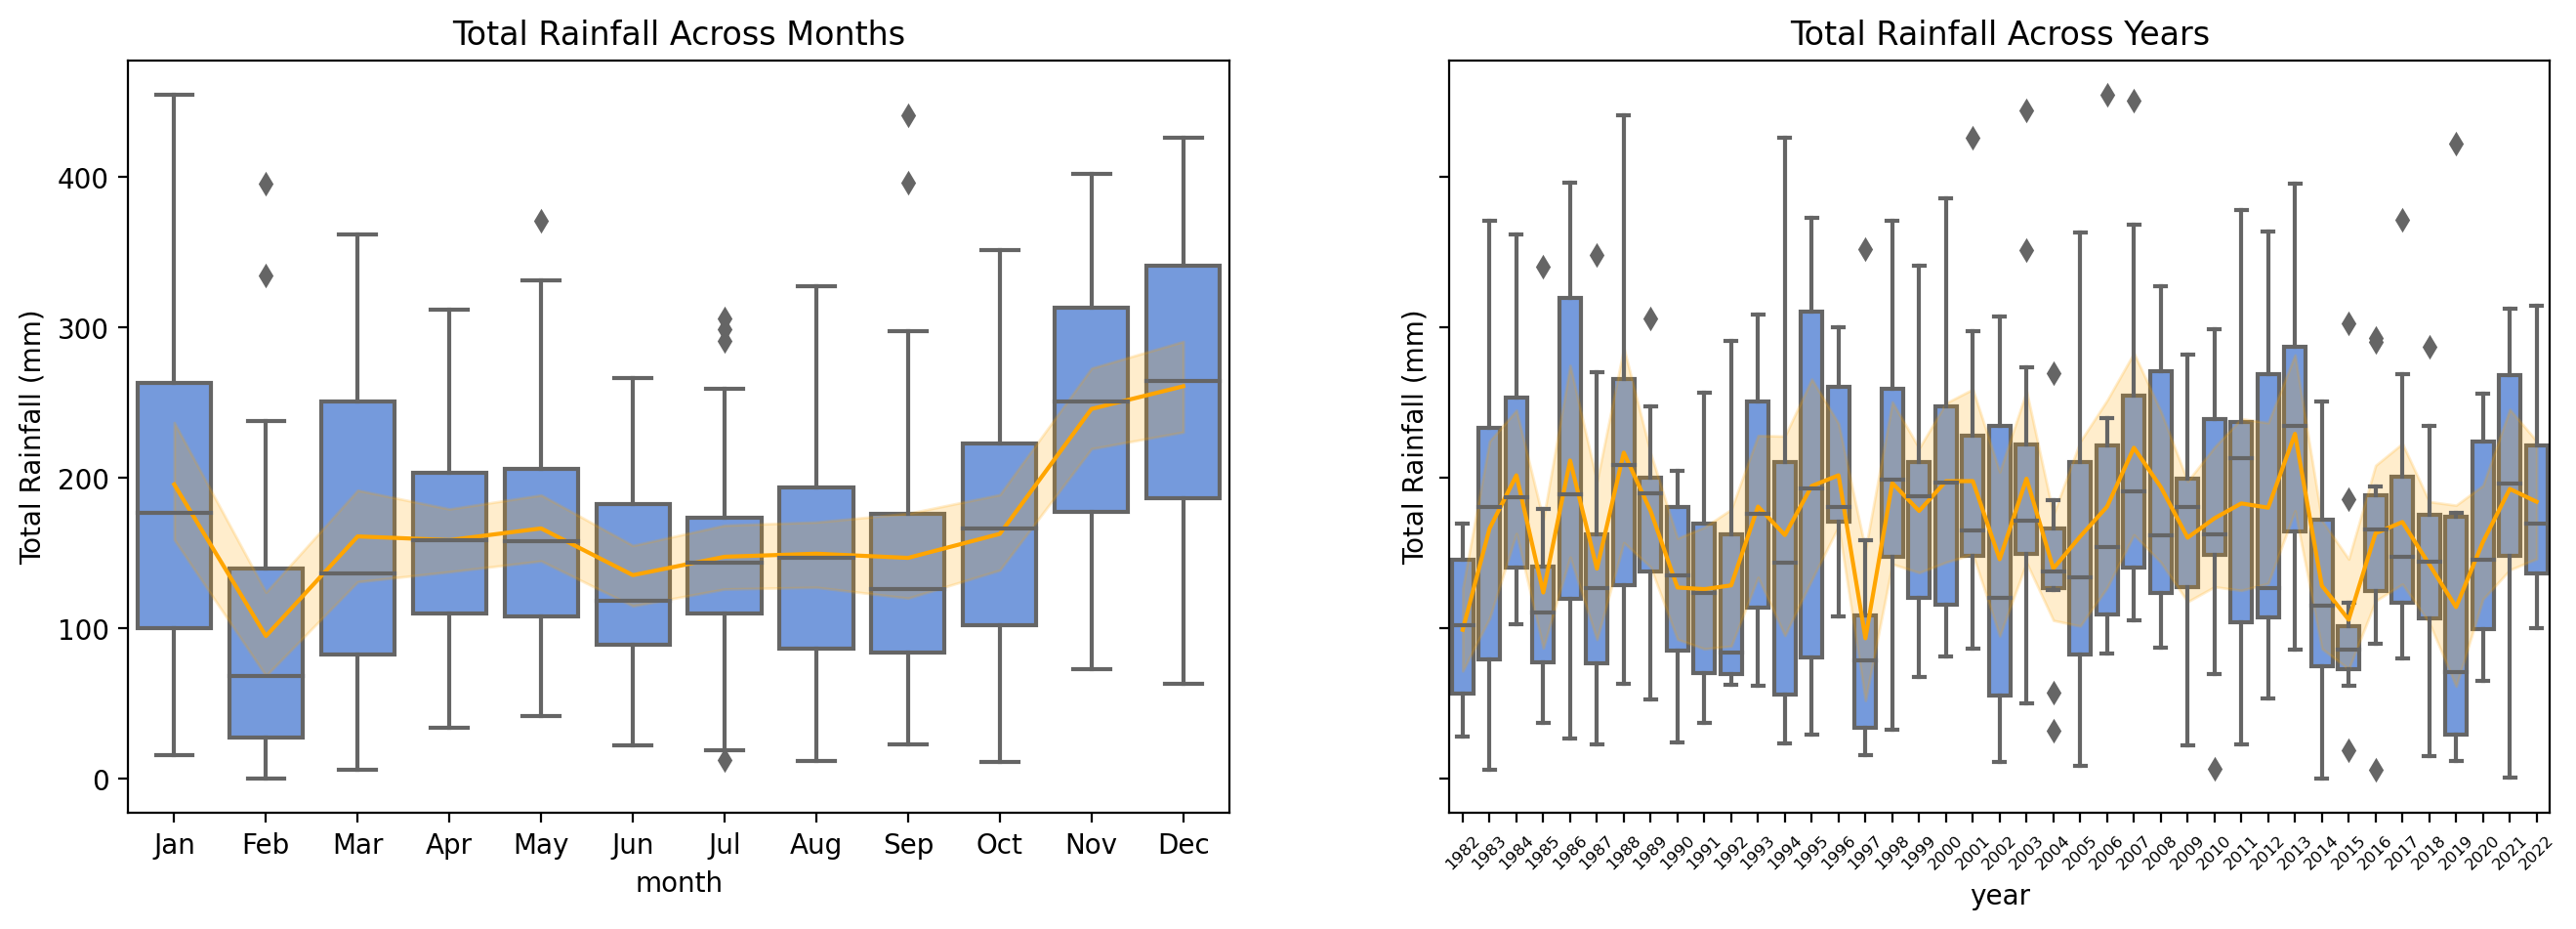

In [57]:
climate['month'] = climate['date'].dt.strftime('%m')
climate['year'] = climate['date'].dt.strftime('%Y')

# outliers / anomalies = above OR below mean plus OR minus 1.5 times the standard deviation
filt=remove_outlier(climate, 'total_rainfall')

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.boxplot(data=filt.sort_values(by='month'), x='month', y='total_rainfall', ax=axes[0], color='cornflowerblue').set(title='Total Rainfall Across Months', ylabel='Total Rainfall (mm)')
sns.lineplot(data=filt.sort_values(by='month'), x='month', y='total_rainfall', ax=axes[0], color='orange').set(title='Total Rainfall Across Months', ylabel='Total Rainfall (mm)')
axes[0].set_xticks(range(len(lst_months)),labels=lst_months)

sns.boxplot(data=filt.sort_values(by='year'), x='year', y='total_rainfall',ax=axes[1], color='cornflowerblue').set(title='Total Rainfall Across Years', ylabel='Total Rainfall (mm)')
sns.lineplot(data=filt.sort_values(by='year'), x='year', y='total_rainfall',ax=axes[1], color='orange').set(title='Total Rainfall Across Years', ylabel='Total Rainfall (mm)')
axes[1].tick_params(rotation=45, labelsize=6)
None

Visualize distribution of 'mean_rh' using histograms and other plots.

Statistical Data for mean_rh
Mean: 82.30389344262294
Standard Deviation: 3.3070215271176155
p: 3.9122907764976844e-05
Since p <= 0.05, it can be concluded that mean_rh does not follow a normal distribution (reject H0)
Distribution of mean_rh is negatively skewed, with skew at: -0.3692299547365748


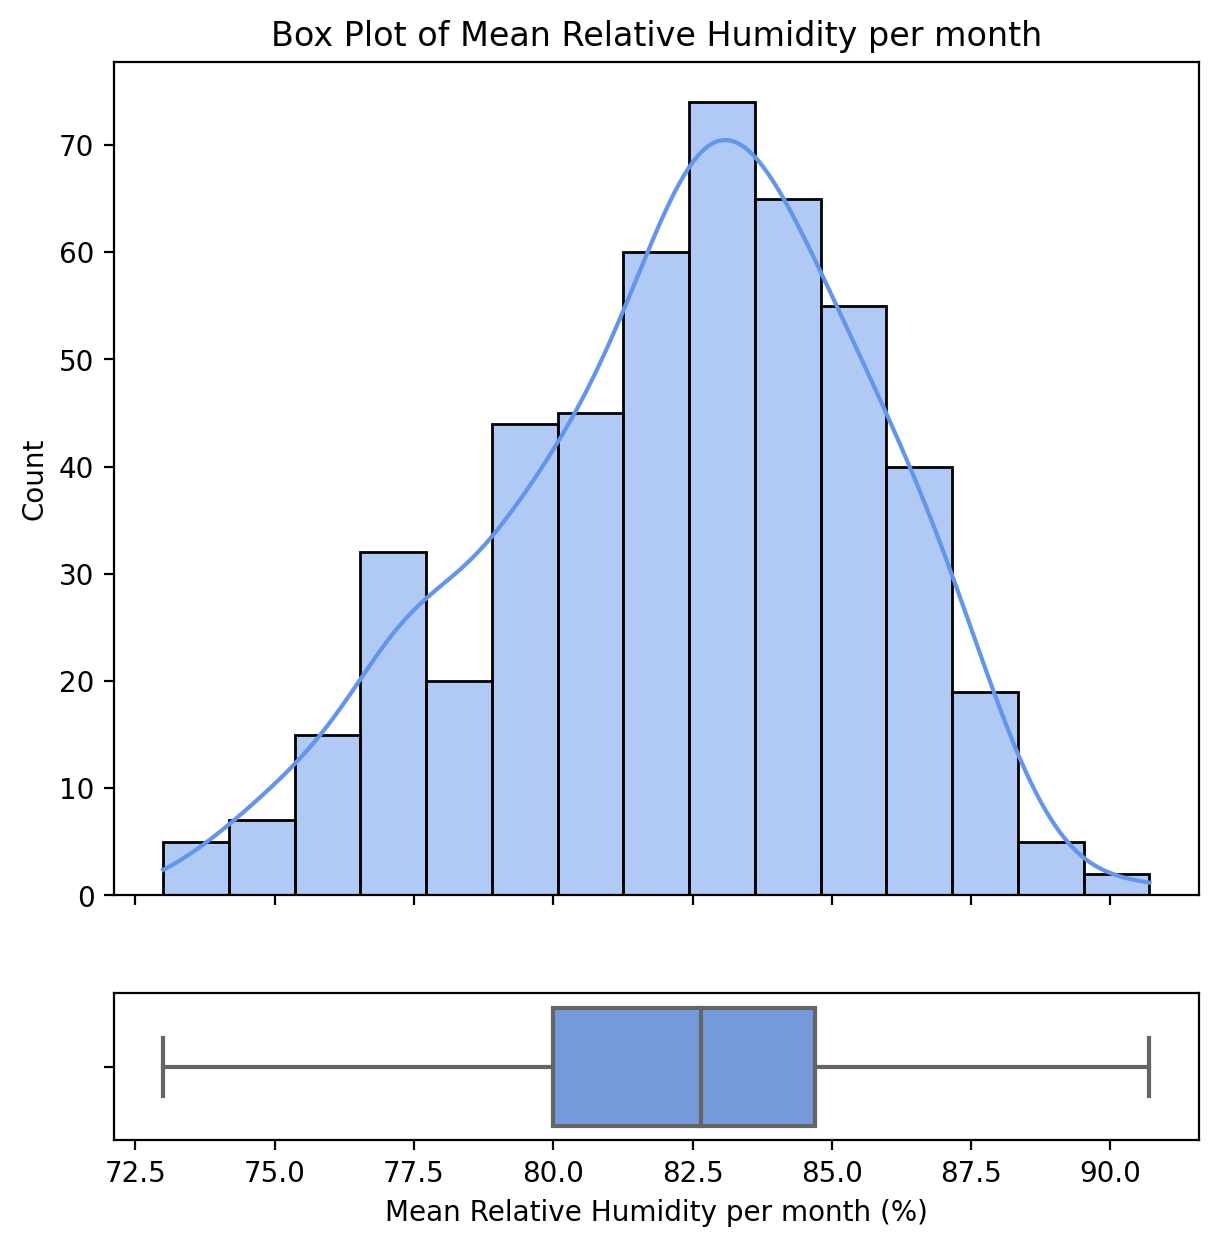

In [58]:
# outliers / anomalies = above OR below mean plus OR minus 1.5 times the standard deviation
col='mean_rh'
filt=remove_outlier(climate,col)

df=filt

# subplots
fig, axes = plt.subplots(2,1,figsize=(7,7),sharex=True,gridspec_kw={'height_ratios':(0.85,0.15)})

# Plot the actual histogram.
sns.histplot(df,x=col,kde=True,color='cornflowerblue',ax=axes[0]).set(title='Box Plot of Mean Relative Humidity per month',xlabel='Mean Relative Humidity per month (%)')

#plot boxplot
sns.boxplot(df,x=col,color='cornflowerblue',ax=axes[1]).set(title='',xlabel='Mean Relative Humidity per month (%)')
None

print(statistical_data(df,col))

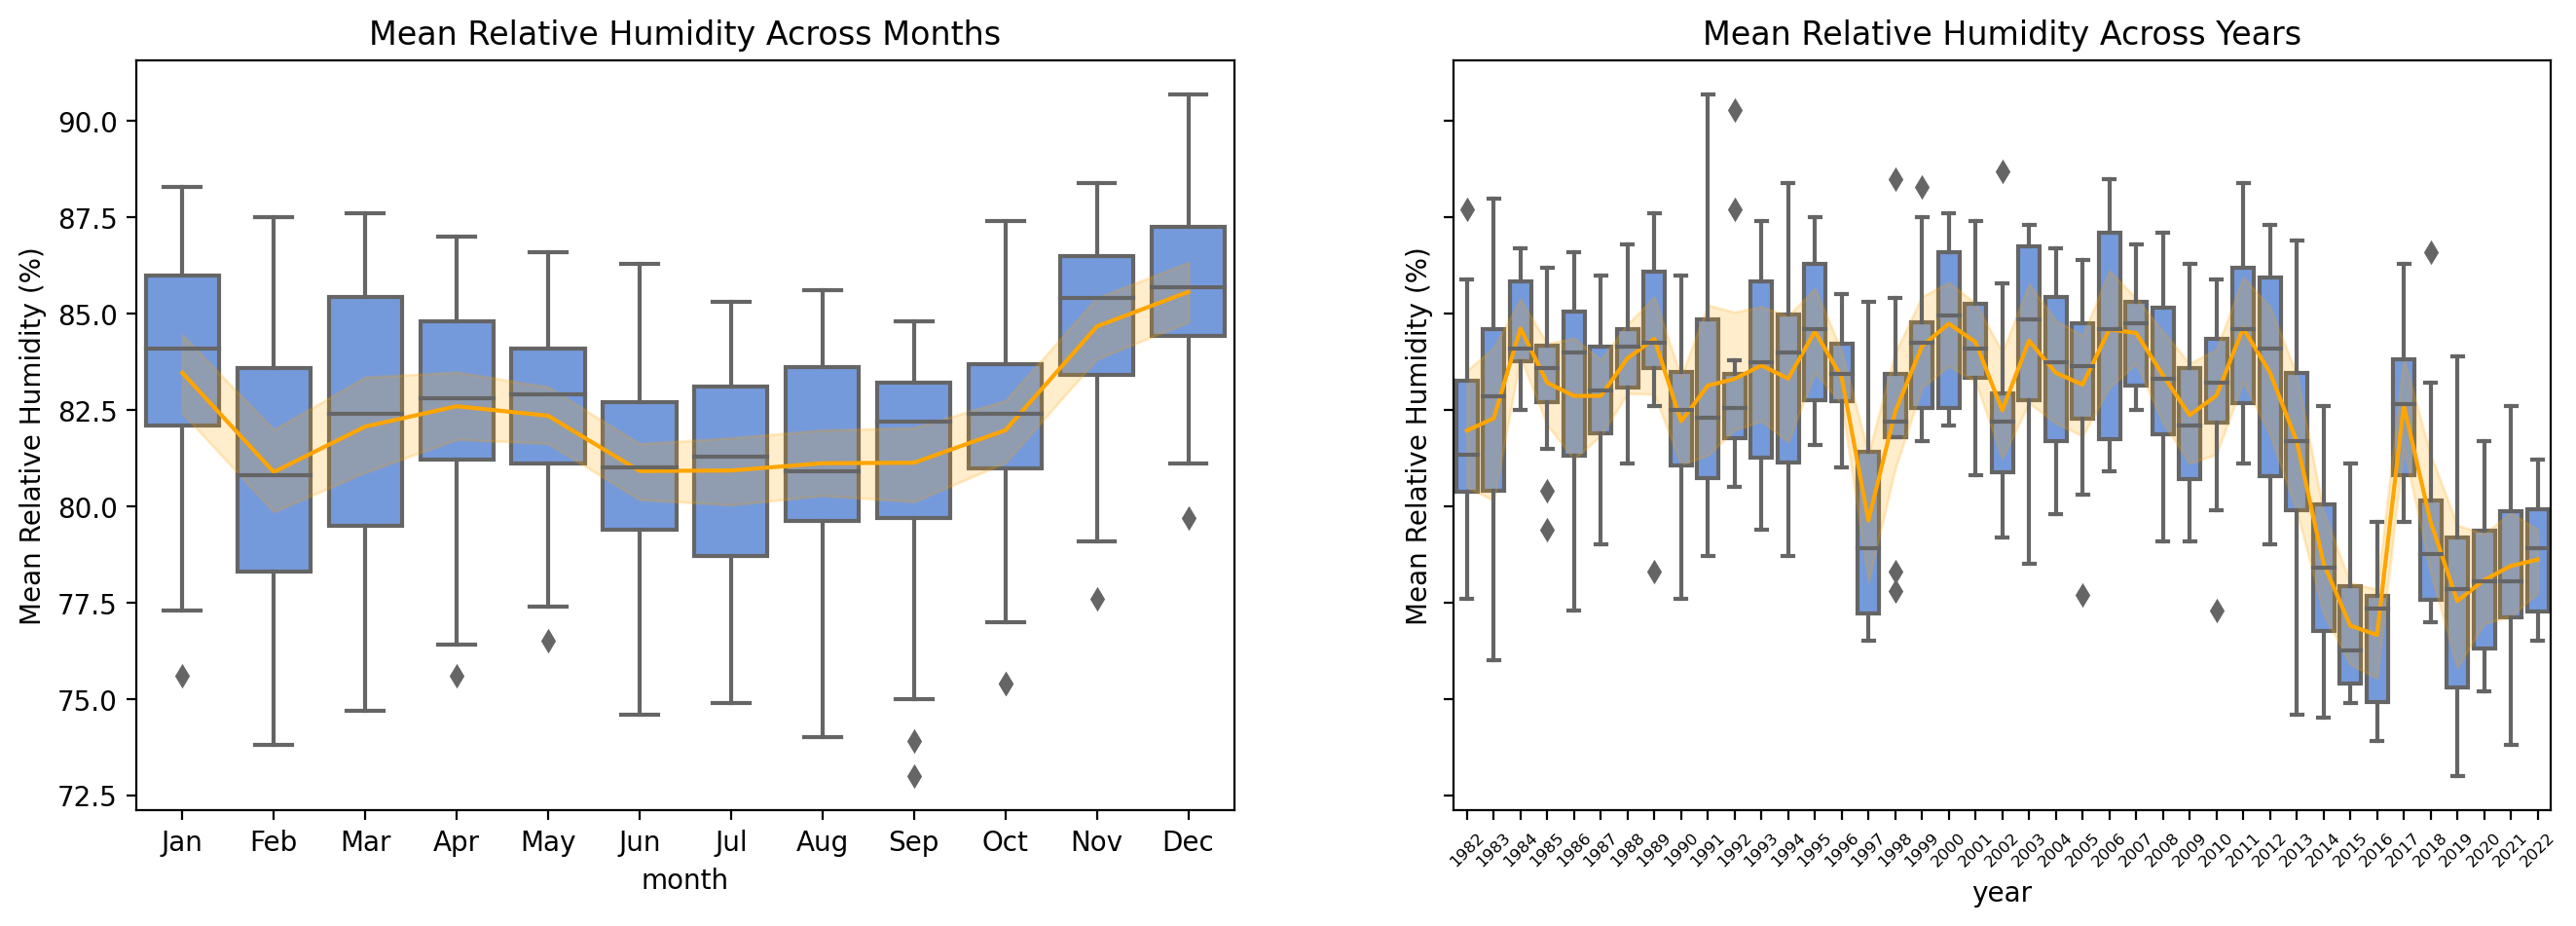

In [59]:
climate['month'] = climate['date'].dt.strftime('%b')
climate['year'] = climate['date'].dt.strftime('%Y')

# outliers / anomalies = above OR below mean plus OR minus 1.5 times the standard deviation
filt=remove_outlier(climate, 'mean_rh')

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.boxplot(data=filt, x='month', y='mean_rh', ax=axes[0], color='cornflowerblue',order=lst_months).set(title='Mean Relative Humidity Across Months', ylabel='Mean Relative Humidity (%)')
sns.lineplot(data=filt, x='month', y='mean_rh', ax=axes[0], color='orange').set(title='Mean Relative Humidity Across Months', ylabel='Mean Relative Humidity (%)')
axes[0].set_xticks(range(len(lst_months)),labels=lst_months)

sns.boxplot(data=filt, x='year', y='mean_rh',ax=axes[1], color='cornflowerblue',order=lst_years).set(title='Mean Relative Humidity Across Years', ylabel='Mean Relative Humidity (%)')
sns.lineplot(data=filt, x='year', y='mean_rh',ax=axes[1], color='orange').set(title='Mean Relative Humidity Across Years', ylabel='Mean Relative Humidity (%)')
axes[1].tick_params(rotation=45, labelsize=6)
None

Large dip in relative humidity levels in recent years. Visualize by plotting relative humidity across periods.

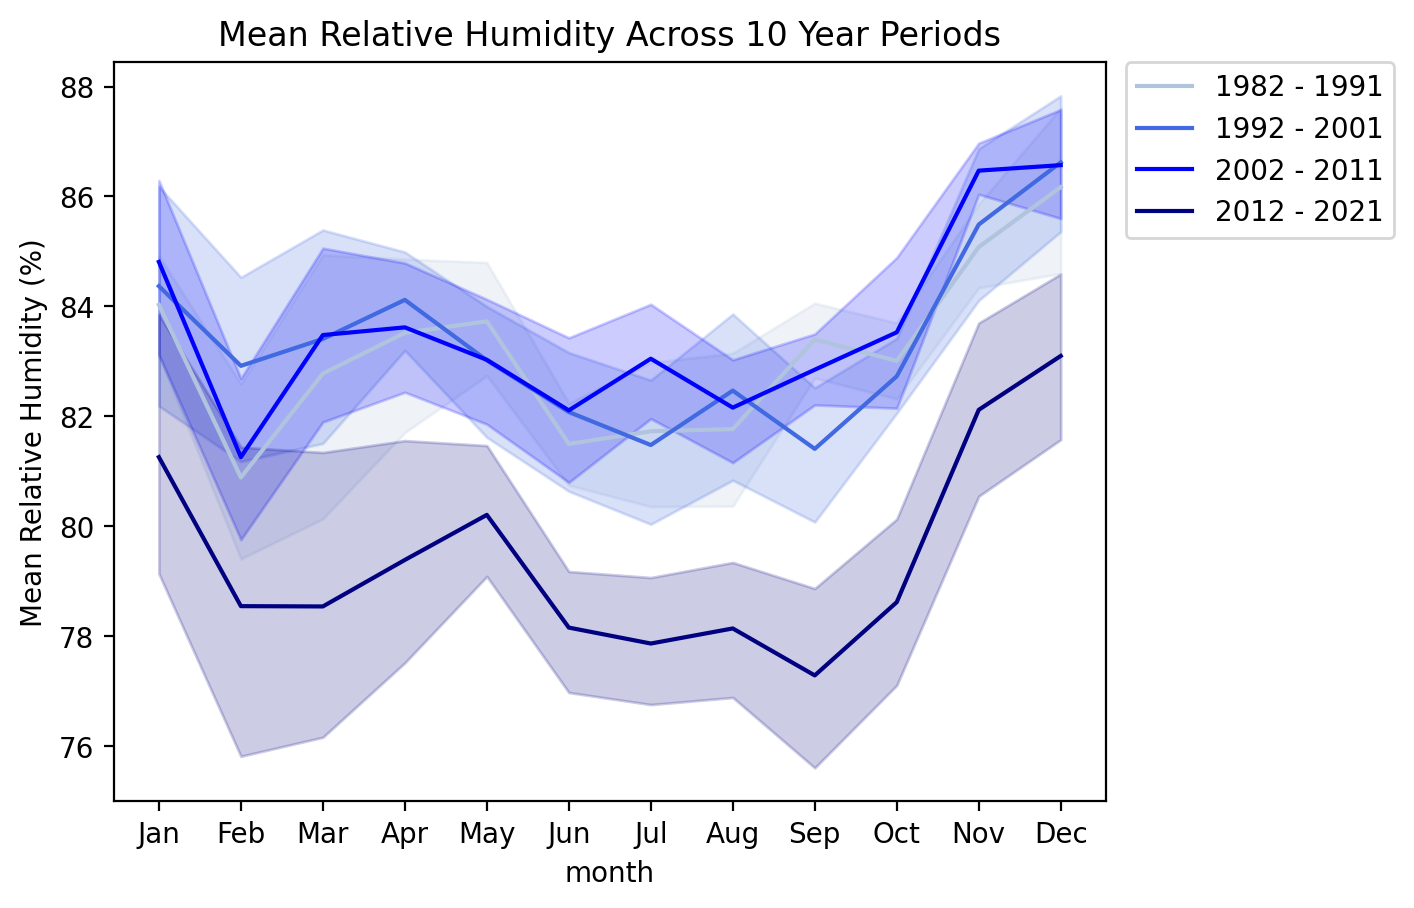

In [60]:
climate['year'] = climate['date'].dt.strftime('%Y')
filt=remove_outlier(climate, 'mean_rh')
df=filt

col='mean_rh'
period=10
title='Mean Relative Humidity Across 10 Year Periods'
ylabel='Mean Relative Humidity (%)'
start_yr=1982
lst_col=['lightsteelblue','royalblue','blue','navy']

compare_lineplot_period(df,col,period,title,ylabel,start_yr,lst_col)

Mean relative humidity seems to be getting more erratic through the years. Visualize by plotting standard deviation across periods.

/var/folders/r4/61_m3nz133bcpt1gp9t0vyq00000gn/T/ipykernel_1463/3469989904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.strftime('%Y')


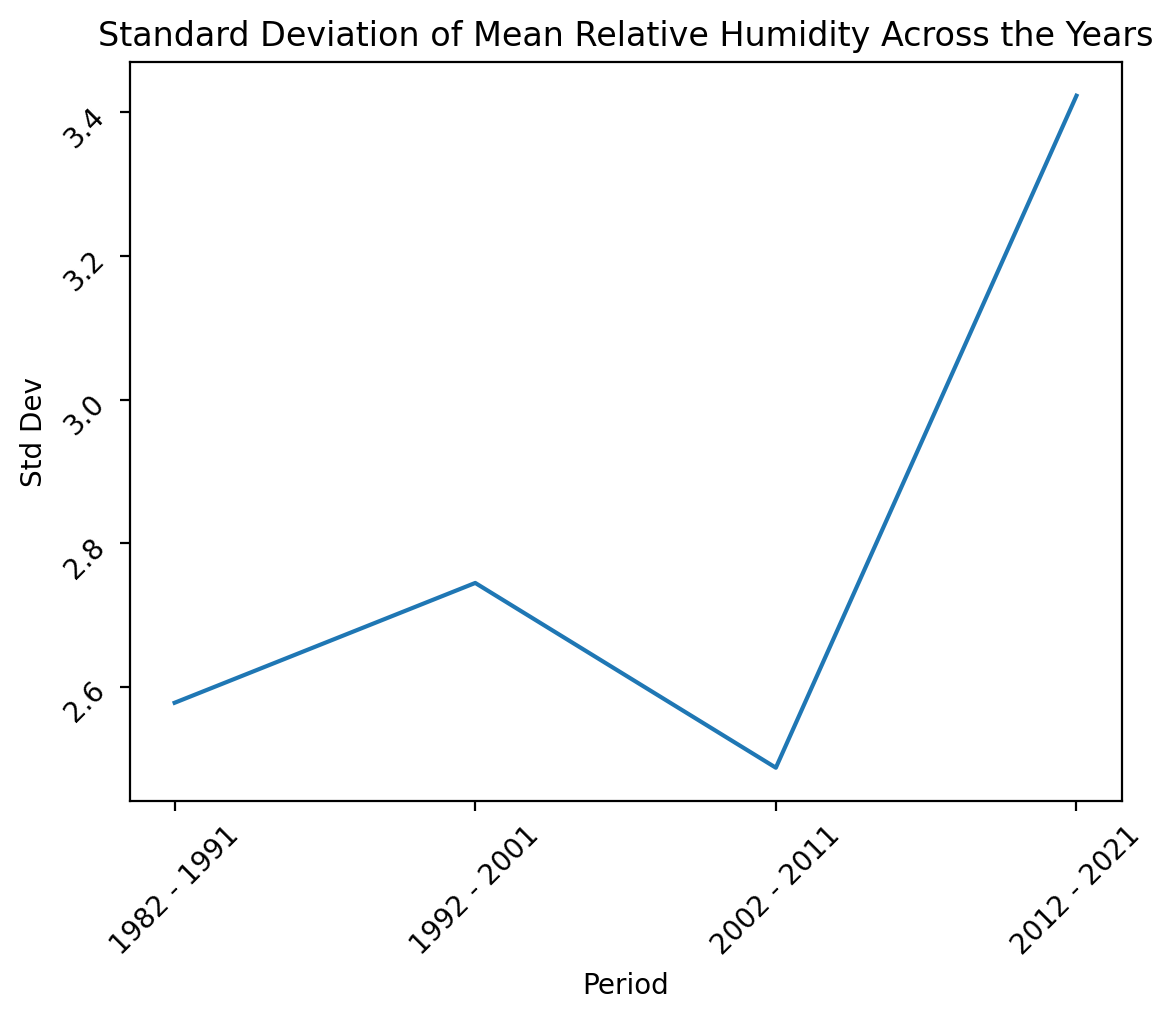

In [61]:
org_df=climate
col='mean_rh'
filt_df=remove_outlier(climate, col)
period=10
title='Standard Deviation of Mean Relative Humidity Across the Years'

compare_std_period(climate,filt_df,col,period,title)

Visualize distribution of 'rh_extremes_minimum' using histograms and other plots.

Statistical Data for rh_extremes_minimum
Mean: 50.68993839835729
Standard Deviation: 5.2779104658080875
p: 2.0742513697769027e-06
Since p <= 0.05, it can be concluded that rh_extremes_minimum does not follow a normal distribution (reject H0)
Distribution of rh_extremes_minimum is negatively skewed, with skew at: -0.4115370040023229


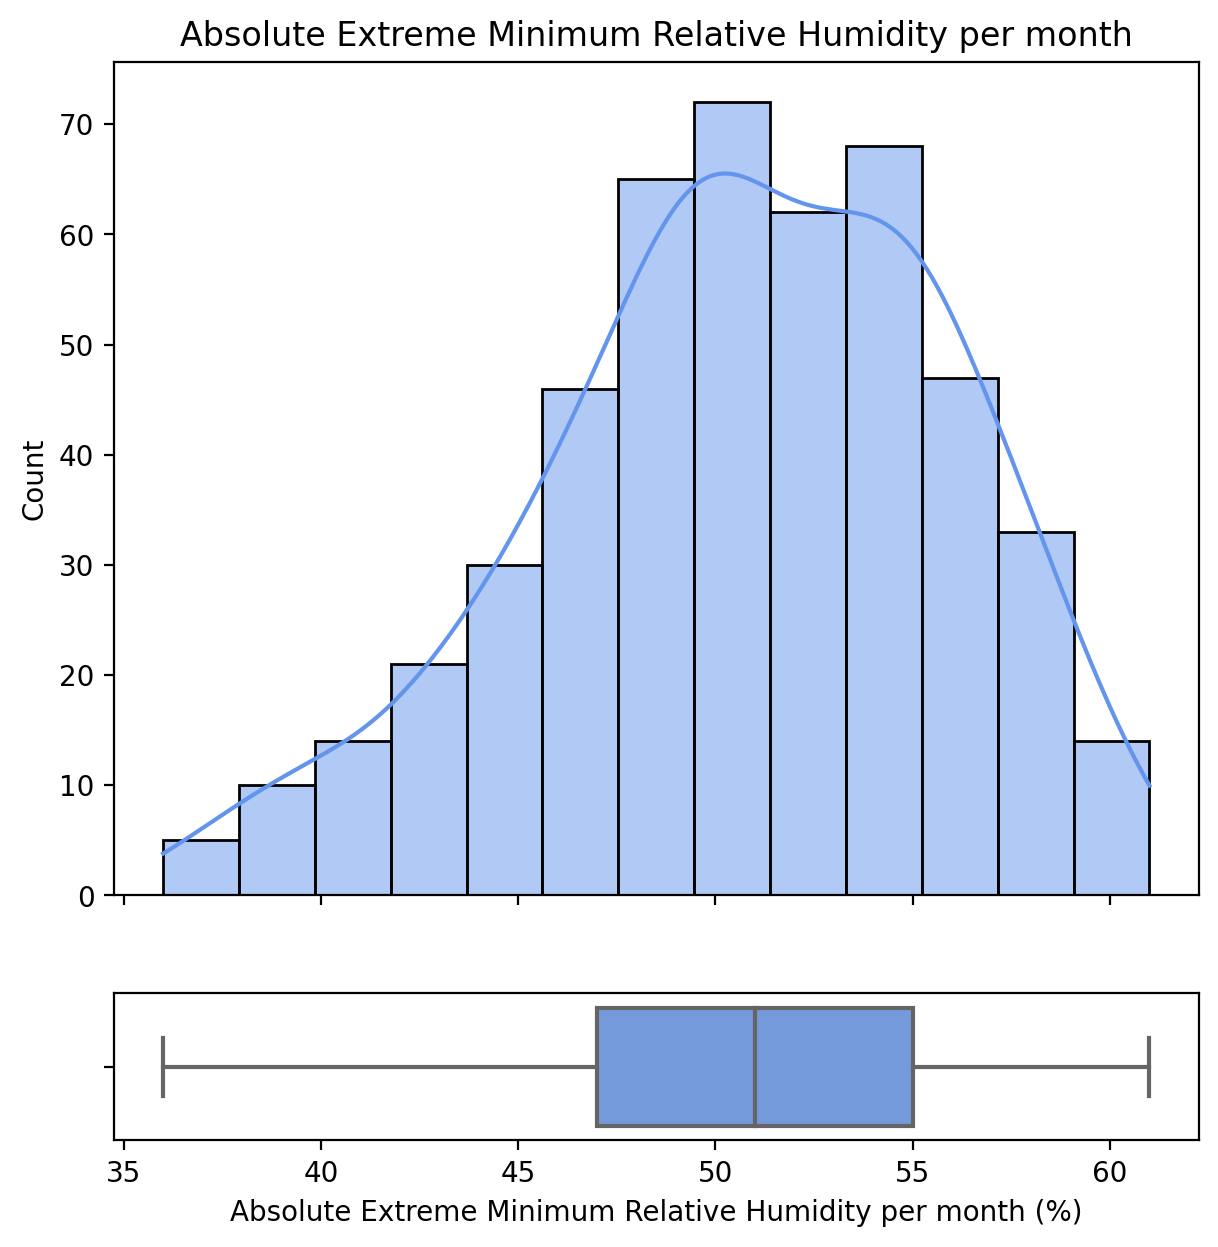

In [62]:
col='rh_extremes_minimum'
filt=remove_outlier(climate,col)

df=filt

# subplots
fig, axes = plt.subplots(2,1,figsize=(7,7),sharex=True,gridspec_kw={'height_ratios':(0.85,0.15)})

# Plot the actual histogram.
sns.histplot(df,x=col,kde=True,color='cornflowerblue',ax=axes[0]).set(title='Absolute Extreme Minimum Relative Humidity per month',xlabel='Absolute Extreme Minimum Relative Humidity per month (%)')

#plot boxplot
sns.boxplot(df,x=col,color='cornflowerblue',ax=axes[1]).set(title='',xlabel='Absolute Extreme Minimum Relative Humidity per month (%)')
None

print(statistical_data(df,col))

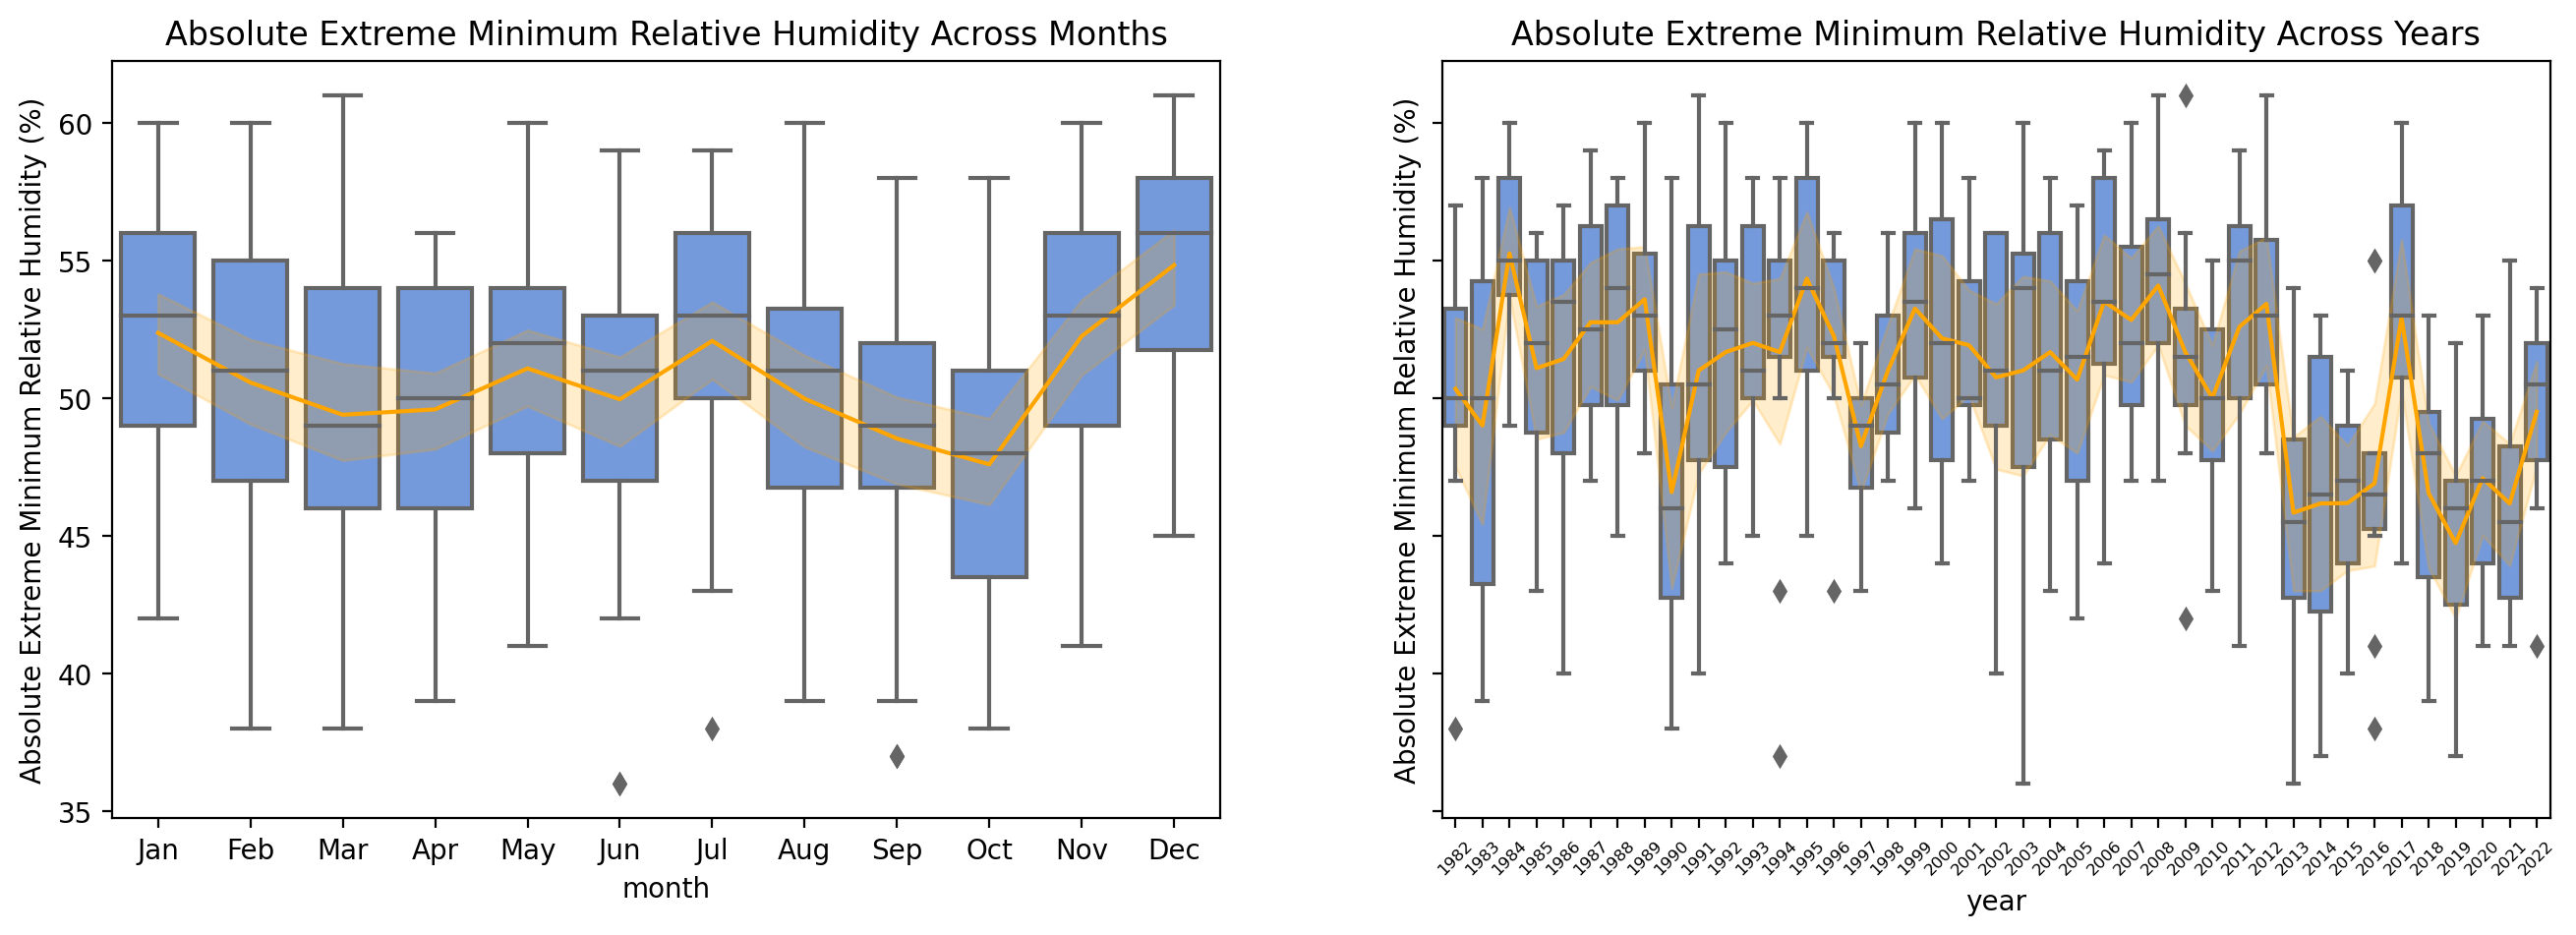

In [63]:
climate['month'] = climate['date'].dt.strftime('%m')
climate['year'] = climate['date'].dt.strftime('%Y')

# filters
filt=remove_outlier(climate, 'rh_extremes_minimum')

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.boxplot(data=filt.sort_values(by='month'), x='month', y='rh_extremes_minimum', ax=axes[0], color='cornflowerblue').set(title='Absolute Extreme Minimum Relative Humidity Across Months', ylabel='Absolute Extreme Minimum Relative Humidity (%)')
sns.lineplot(data=filt.sort_values(by='month'), x='month', y='rh_extremes_minimum', ax=axes[0], color='orange').set(title='Absolute Extreme Minimum Relative Humidity Across Months', ylabel='Absolute Extreme Minimum Relative Humidity (%)')
axes[0].set_xticks(range(len(lst_months)),labels=lst_months)

sns.boxplot(data=filt.sort_values(by='year'), x='year', y='rh_extremes_minimum',ax=axes[1], color='cornflowerblue').set(title='Absolute Extreme Minimum Relative Humidity Across Years', ylabel='Absolute Extreme Minimum Relative Humidity (%)')
sns.lineplot(data=filt.sort_values(by='year'), x='year', y='rh_extremes_minimum',ax=axes[1], color='orange').set(title='Absolute Extreme Minimum Relative Humidity Across Years', ylabel='Absolute Extreme Minimum Relative Humidity (%)')
axes[1].tick_params(rotation=45, labelsize=6)
None

Visualize distribution of 'mean_sunshine_hrs' using histograms and other plots.

Statistical Data for mean_sunshine_hrs
Mean: 5.622886597938144
Standard Deviation: 1.1516032291739984
p: 0.21760934591293335
Since p > 0.05, it cannot be concluded that mean_sunshine_hrs does not follow a normal distribution (fail to reject H0)
Distribution of mean_sunshine_hrs is positively skewed, with skew at: 0.09507832387729835


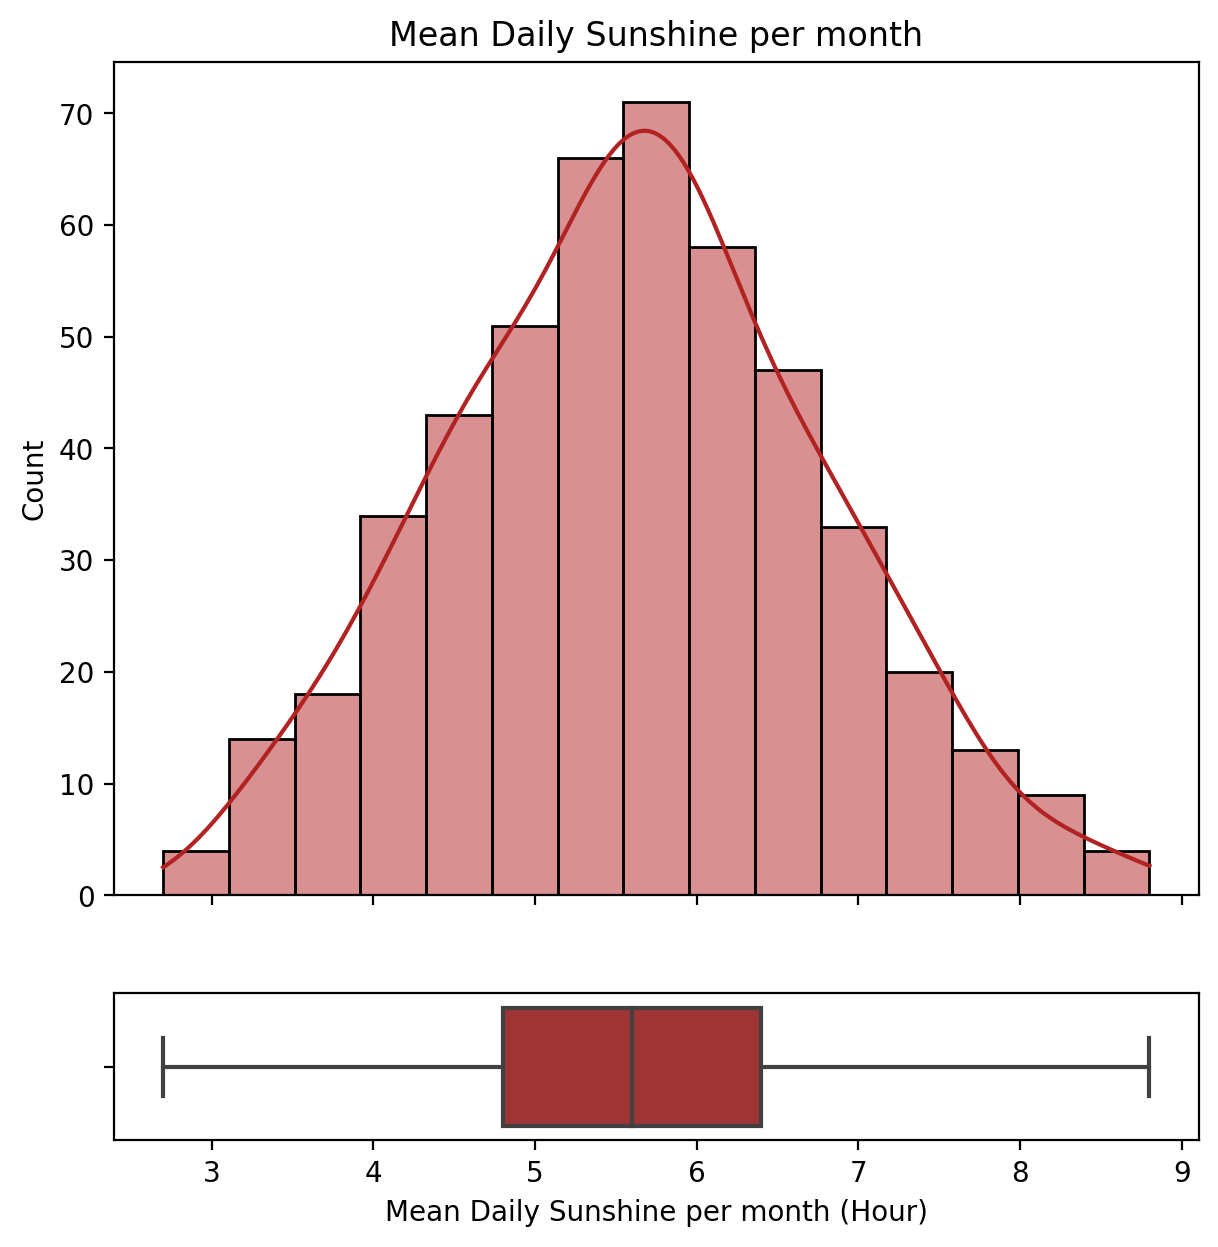

In [64]:
col='mean_sunshine_hrs'
filt=remove_outlier(climate,col)

df=filt

# subplots
fig, axes = plt.subplots(2,1,figsize=(7,7),sharex=True,gridspec_kw={'height_ratios':(0.85,0.15)})

# Plot the actual histogram.
sns.histplot(df,x=col,kde=True,color='firebrick',ax=axes[0]).set(title='Mean Daily Sunshine per month',xlabel='Mean Daily Sunshine per month (Hour)')

#plot boxplot
sns.boxplot(df,x=col,color='firebrick',ax=axes[1]).set(title='',xlabel='Mean Daily Sunshine per month (Hour)')
None

print(statistical_data(df,col))

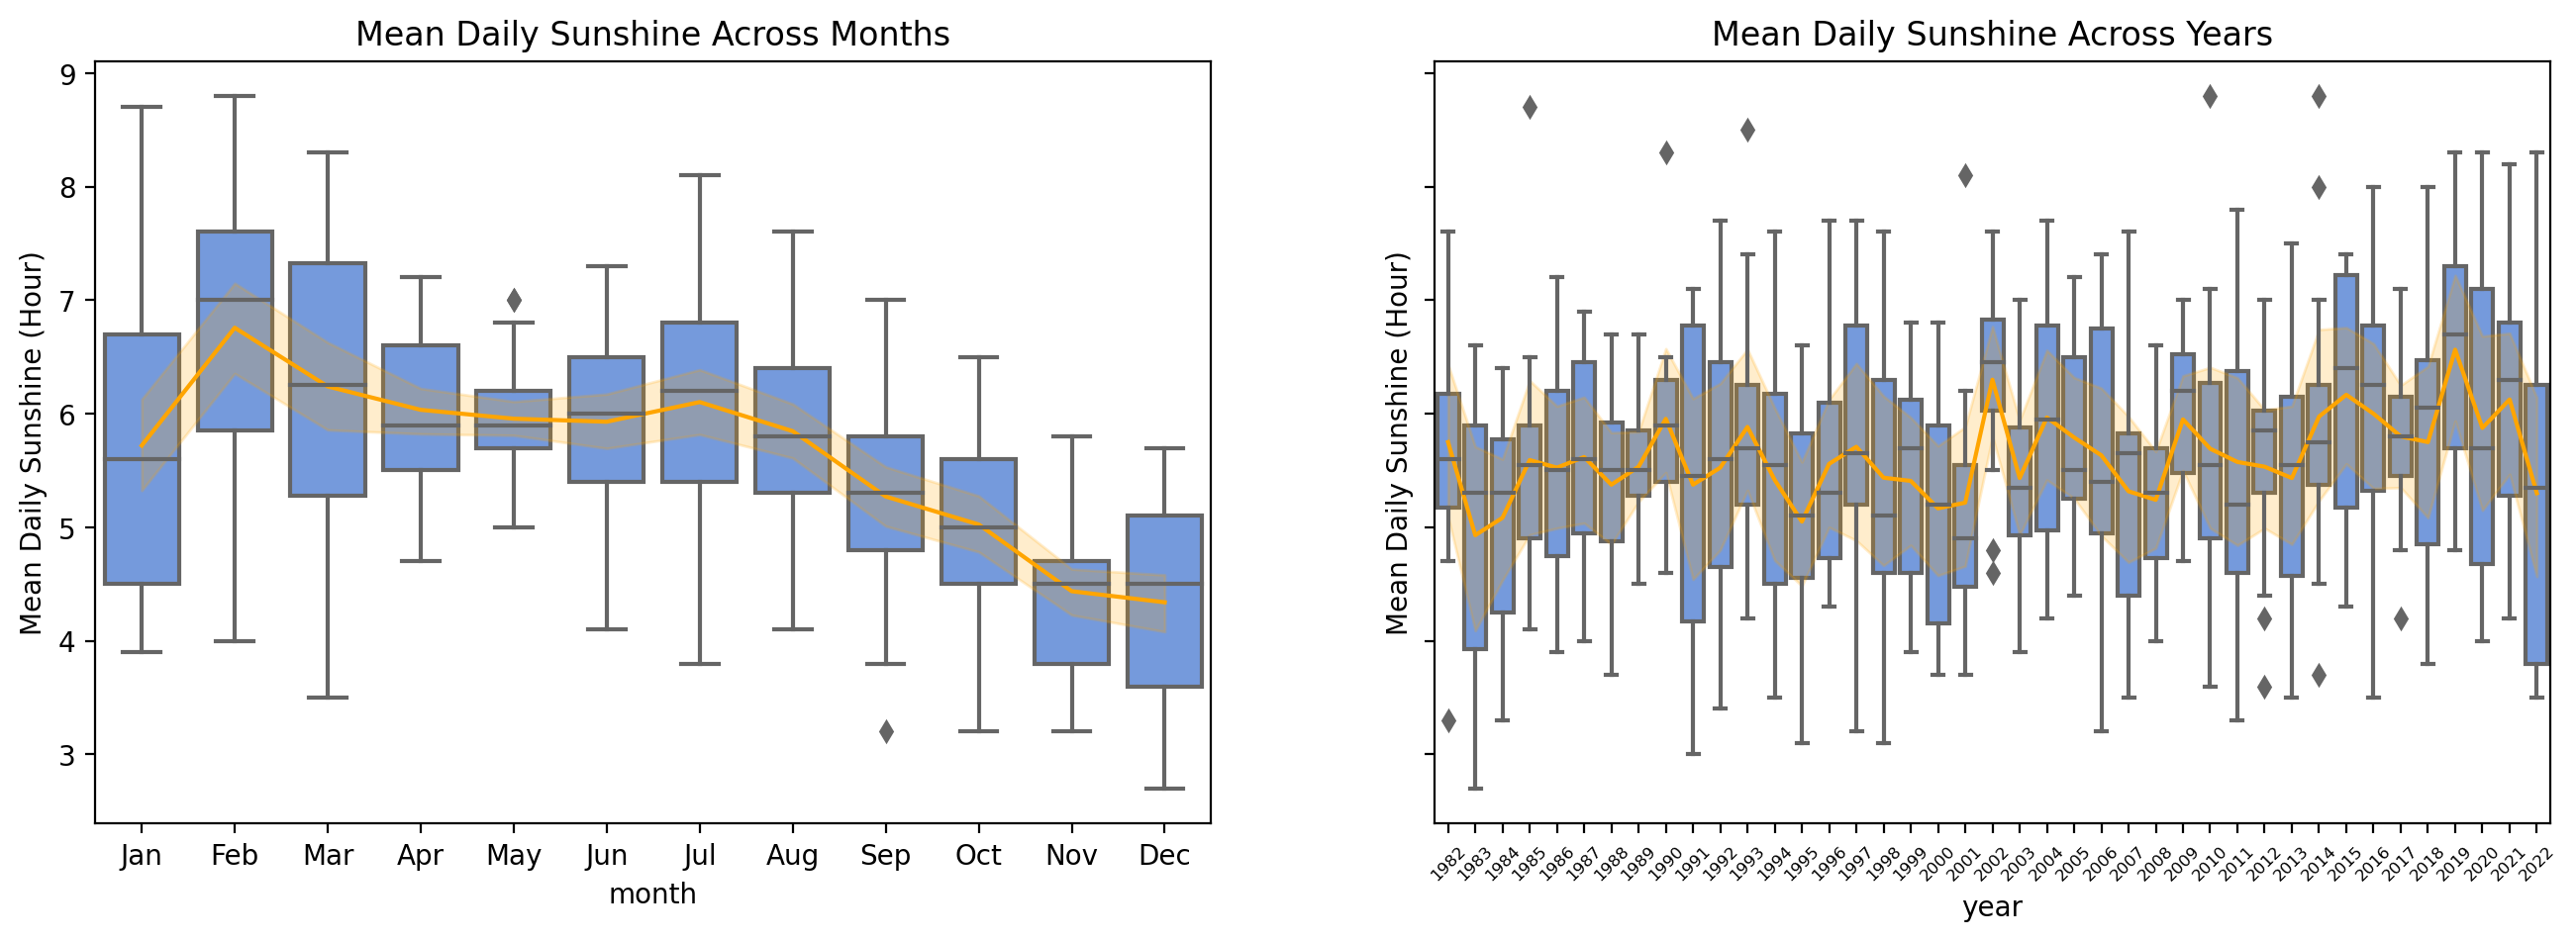

In [65]:
climate['month'] = climate['date'].dt.strftime('%m')
climate['year'] = climate['date'].dt.strftime('%Y')

# filters
filt=remove_outlier(climate, 'mean_sunshine_hrs')

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.boxplot(data=filt.sort_values(by='month'), x='month', y='mean_sunshine_hrs', ax=axes[0], color='cornflowerblue').set(title='Mean Daily Sunshine Across Months', ylabel='Mean Daily Sunshine (Hour)')
sns.lineplot(data=filt.sort_values(by='month'), x='month', y='mean_sunshine_hrs', ax=axes[0], color='orange').set(title='Mean Daily Sunshine Across Months', ylabel='Mean Daily Sunshine (Hour)')
axes[0].set_xticks(range(len(lst_months)),labels=lst_months)

sns.boxplot(data=filt.sort_values(by='year'), x='year', y='mean_sunshine_hrs',ax=axes[1], color='cornflowerblue').set(title='Mean Daily Sunshine Across Years', ylabel='Mean Daily Sunshine (Hour)')
sns.lineplot(data=filt.sort_values(by='year'), x='year', y='mean_sunshine_hrs',ax=axes[1], color='orange').set(title='Mean Daily Sunshine Across Years', ylabel='Mean Daily Sunshine (Hour)')
axes[1].tick_params(rotation=45, labelsize=6)
None

Visualize distribution of 'mean_temp' using histograms and other plots.

Statistical Data for mean_temp
Mean: 27.676829268292682
Standard Deviation: 0.8000710936569131
p: 0.0027858184184879065
Since p <= 0.05, it can be concluded that mean_temp does not follow a normal distribution (reject H0)
Distribution of mean_temp is negatively skewed, with skew at: -0.23232367293301004


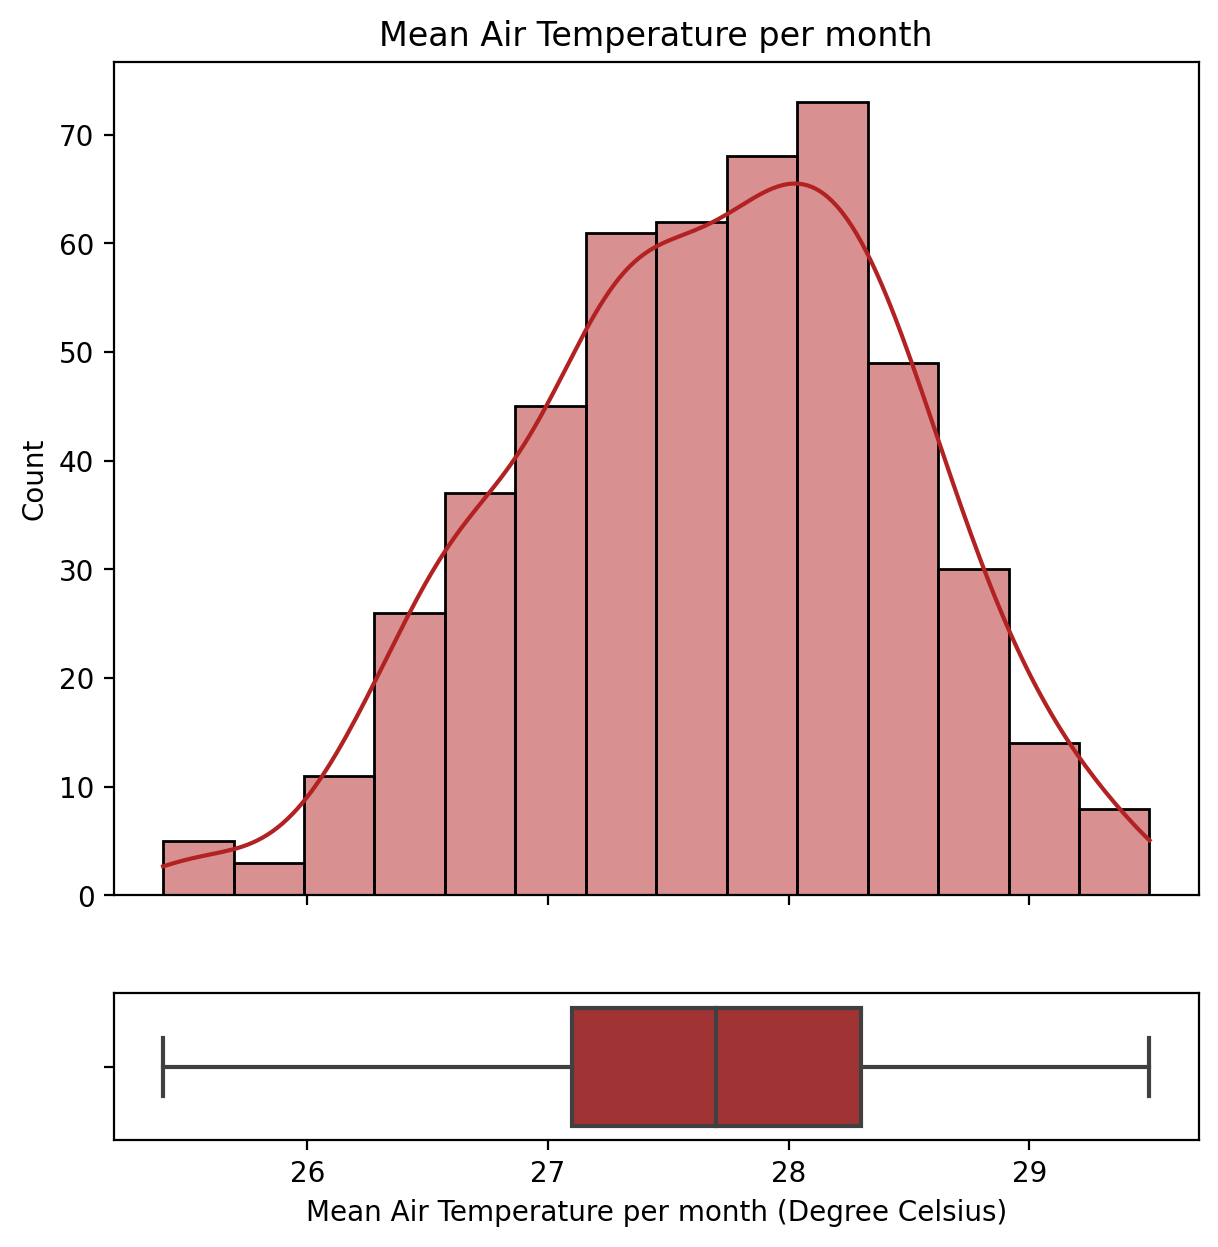

In [66]:
col='mean_temp'
filt=remove_outlier(climate,col)

df=filt

# subplot
fig, axes = plt.subplots(2,1,figsize=(7,7),sharex=True,gridspec_kw={'height_ratios':(0.85,0.15)})

# Plot the actual histogram.
sns.histplot(df,x=col,kde=True,color='firebrick',ax=axes[0]).set(title='Mean Air Temperature per month',xlabel='Mean Air Temperature per month (Degree Celsius)')

#plot boxplot
sns.boxplot(df,x=col, color='firebrick',ax=axes[1]).set(title='',xlabel='Mean Air Temperature per month (Degree Celsius)')
None

print(statistical_data(df,col))

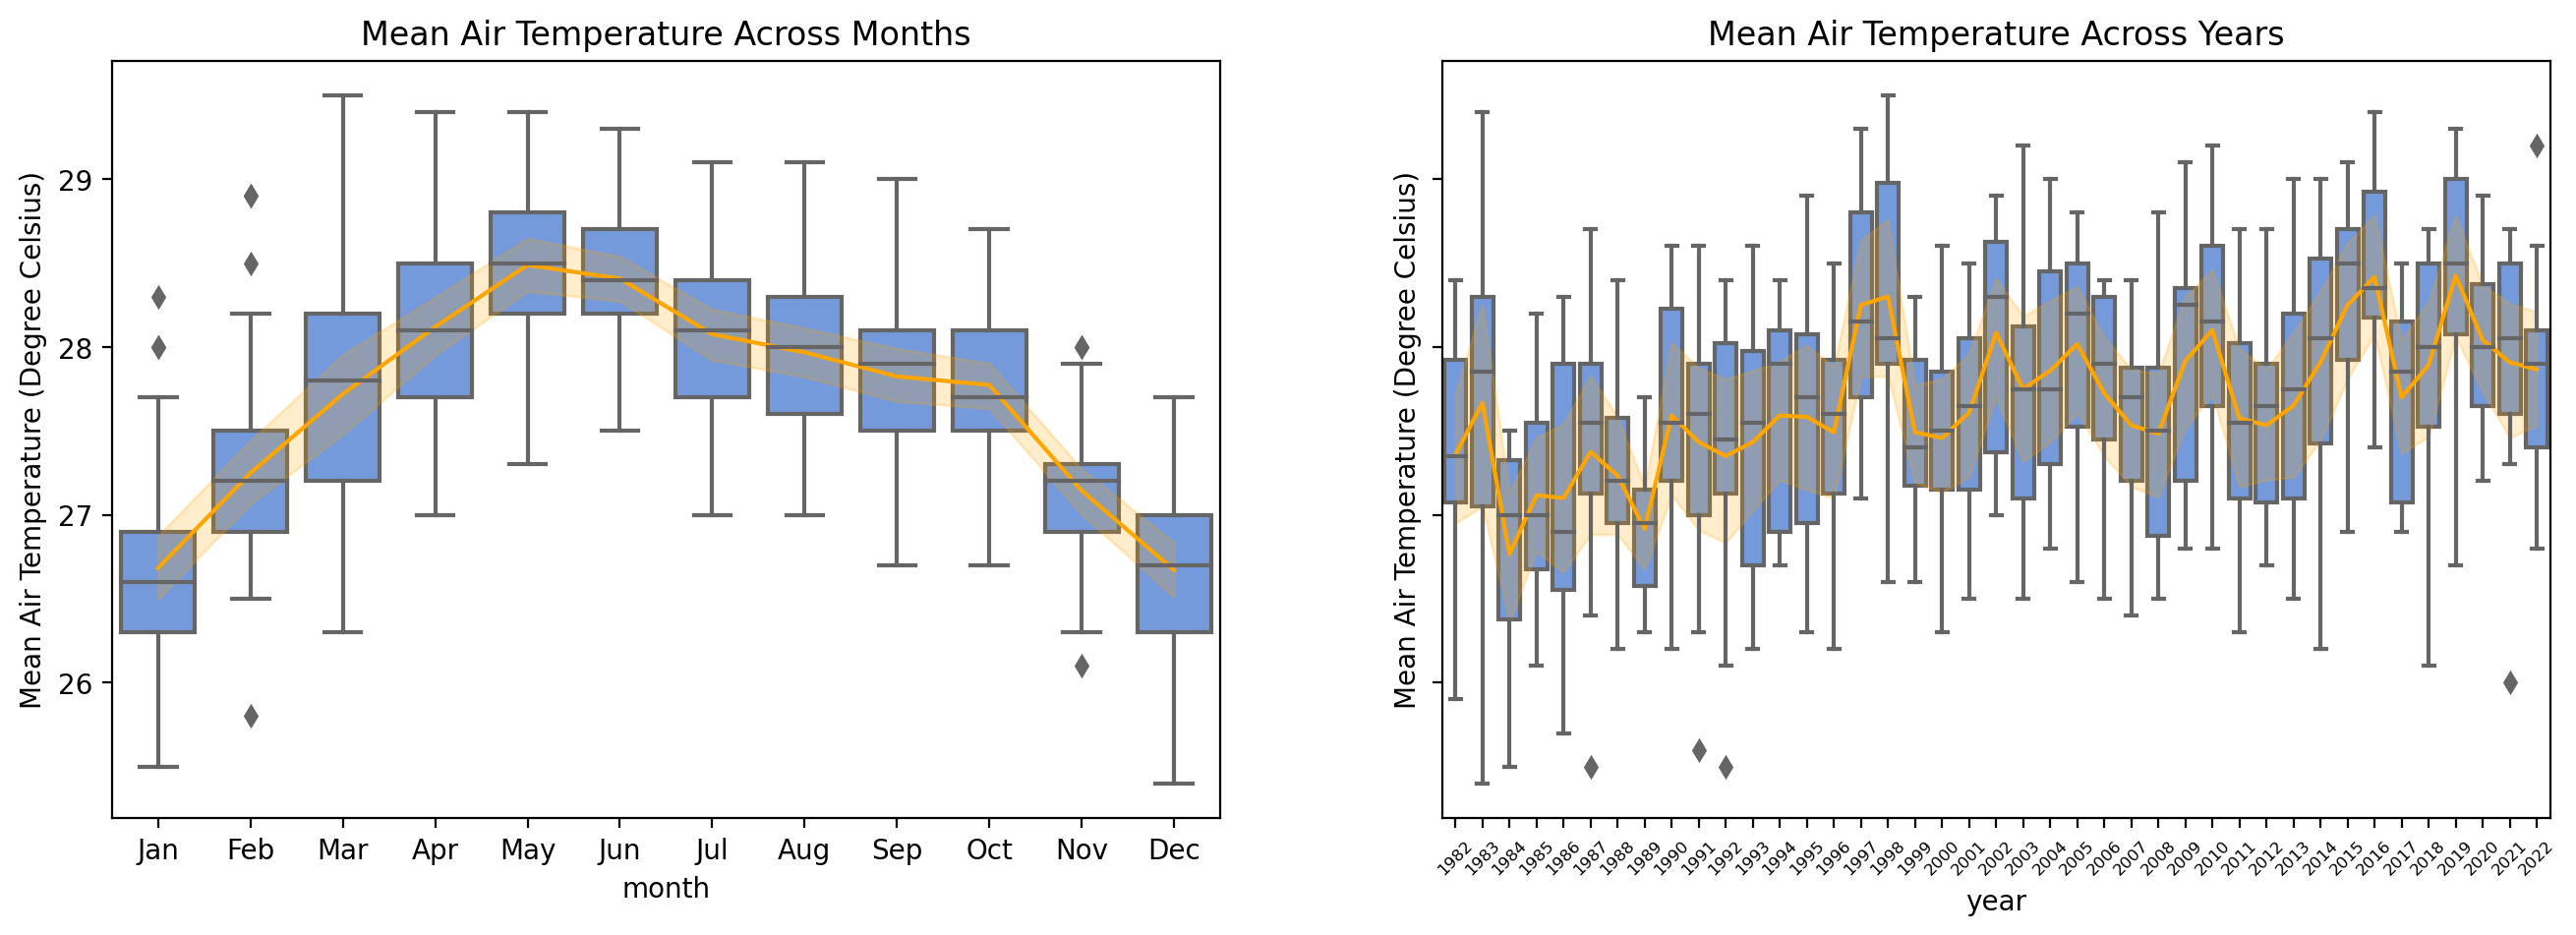

In [67]:
climate['month'] = climate['date'].dt.strftime('%m')
climate['year'] = climate['date'].dt.strftime('%Y')

# filters
filt=remove_outlier(climate, 'mean_temp')

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.boxplot(data=filt.sort_values(by='month'), x='month', y='mean_temp', ax=axes[0], color='cornflowerblue').set(title='Mean Air Temperature Across Months', ylabel='Mean Air Temperature (Degree Celsius)')
sns.lineplot(data=filt.sort_values(by='month'), x='month', y='mean_temp', ax=axes[0], color='orange').set(title='Mean Air Temperature Across Months', ylabel='Mean Air Temperature (Degree Celsius)')
axes[0].set_xticks(range(len(lst_months)),labels=lst_months)

sns.boxplot(data=filt.sort_values(by='year'), x='year', y='mean_temp',ax=axes[1], color='cornflowerblue').set(title='Mean Air Temperature Across Years', ylabel='Mean Air Temperature (Degree Celsius)')
sns.lineplot(data=filt.sort_values(by='year'), x='year', y='mean_temp',ax=axes[1], color='orange').set(title='Mean Air Temperature Across Years', ylabel='Mean Air Temperature (Degree Celsius)')
axes[1].tick_params(rotation=45, labelsize=6)
None

Surge in mean air temperature in recent years. Visualize by plotting mean air temperature across periods.

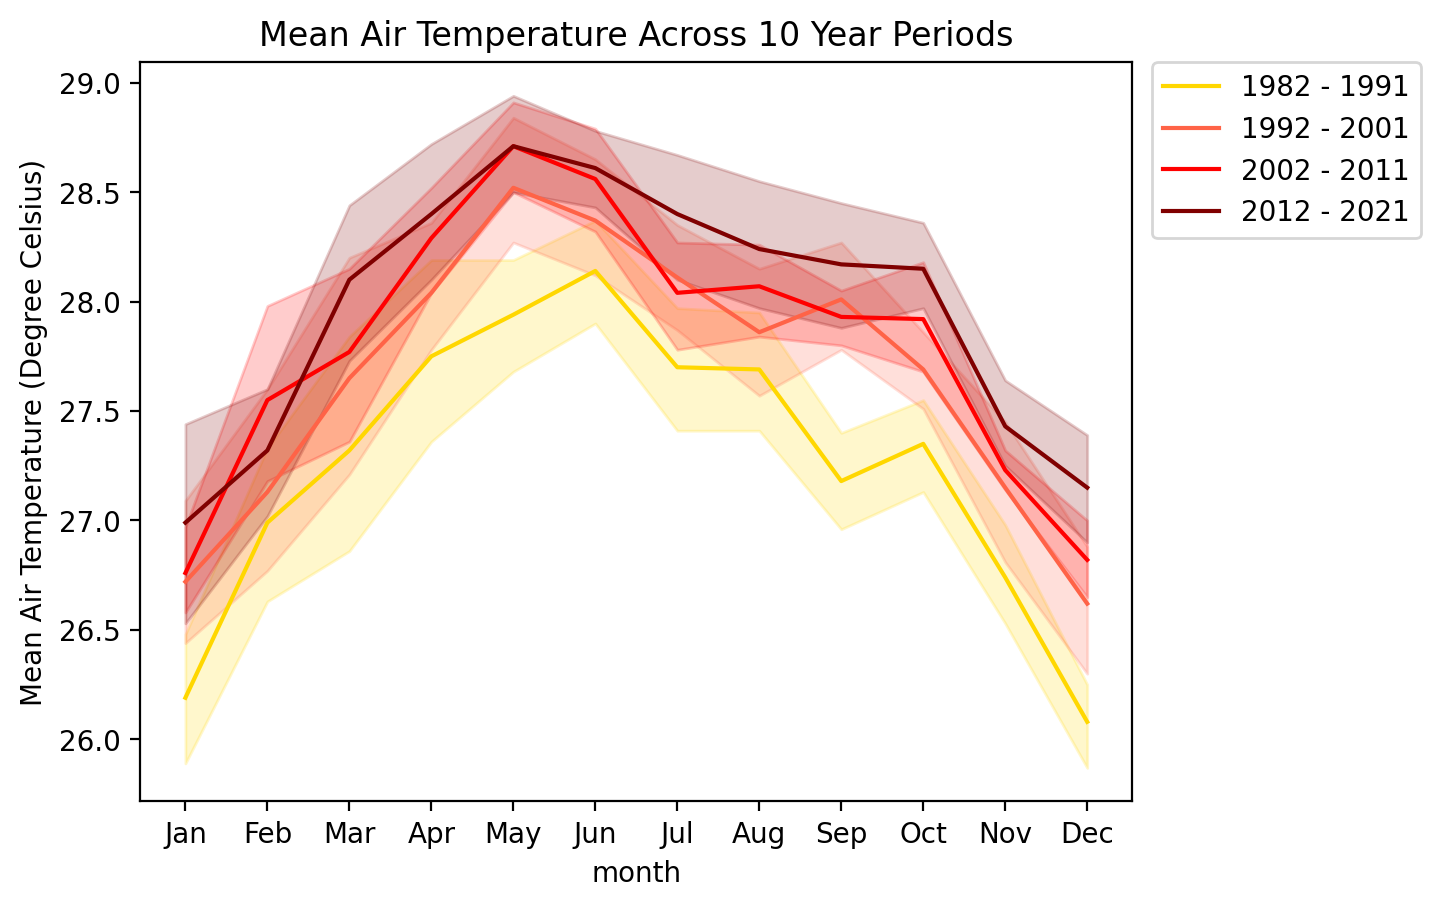

In [68]:
climate['year'] = climate['date'].dt.strftime('%Y')
filt=remove_outlier(climate, 'mean_temp')
df=filt

col='mean_temp'
period=10
title='Mean Air Temperature Across 10 Year Periods'
ylabel='Mean Air Temperature (Degree Celsius)'
start_yr=1982
lst_col=['gold','tomato','red','maroon']

compare_lineplot_period(df,col,period,title,ylabel,start_yr,lst_col)

Through the years, temperature in Singapore has been increasing while relative humidity has been decreasing. From our correlation test above, correlation between mean relative humidity and mean temperature is -0.63 which indicates a strong negative correlation between the two variables. According to the Clausius-Clapeyron equation, the air can generally hold around 7% more moisture for every 1C of temperature rise. Thus, if moisture content is not increasing at the same rate, relative humidity decreases (Willett, 2020).

Visualize distribution of 'temp_mean_daily_min' using histograms and other plots.

Statistical Data for temp_mean_daily_min
Mean: 24.91370143149284
Standard Deviation: 0.7172325576977929
p: 0.0018074975814670324
Since p <= 0.05, it can be concluded that temp_mean_daily_min does not follow a normal distribution (reject H0)
Distribution of temp_mean_daily_min is positively skewed, with skew at: 0.15084899824873757


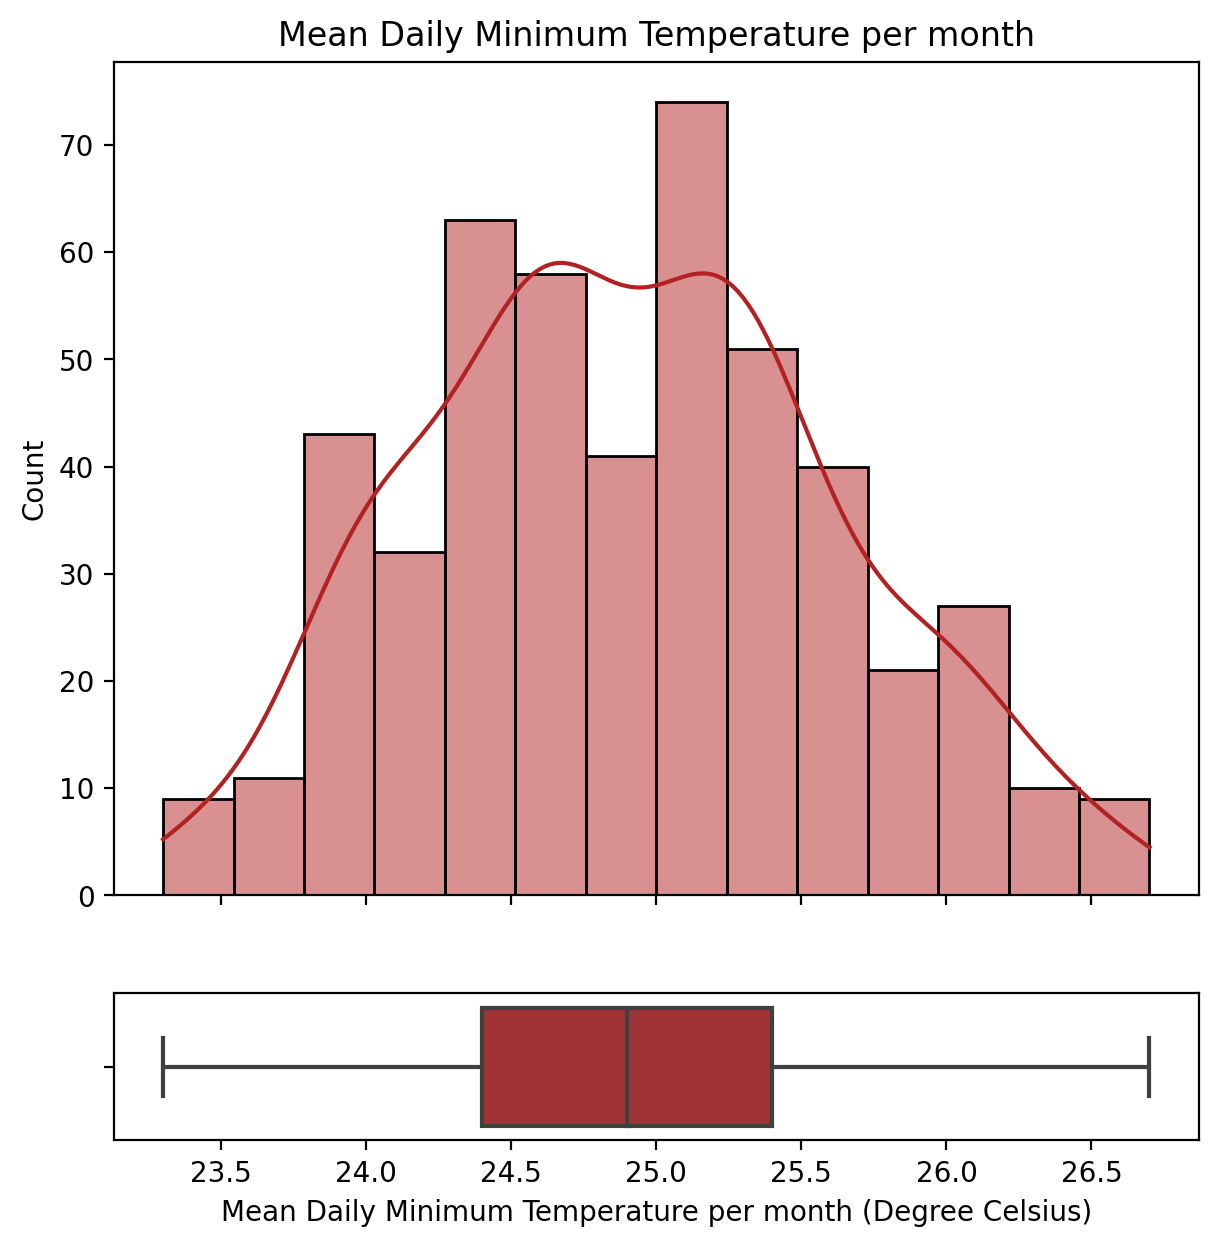

In [69]:
col='temp_mean_daily_min'
filt=remove_outlier(climate,col)

df=filt

# subplots
fig, axes = plt.subplots(2,1,figsize=(7,7),sharex=True,gridspec_kw={'height_ratios':(0.85,0.15)})

# Plot the actual histogram.
sns.histplot(data=df,x=col,kde=True,color='firebrick',ax=axes[0]).set(title='Mean Daily Minimum Temperature per month',xlabel='Mean Daily Minimum Temperature per month (Degree Celsius)')

#plot boxplot
sns.boxplot(data=df,x=col,color='firebrick',ax=axes[1]).set(title='',xlabel='Mean Daily Minimum Temperature per month (Degree Celsius)')
None

print(statistical_data(df,col))

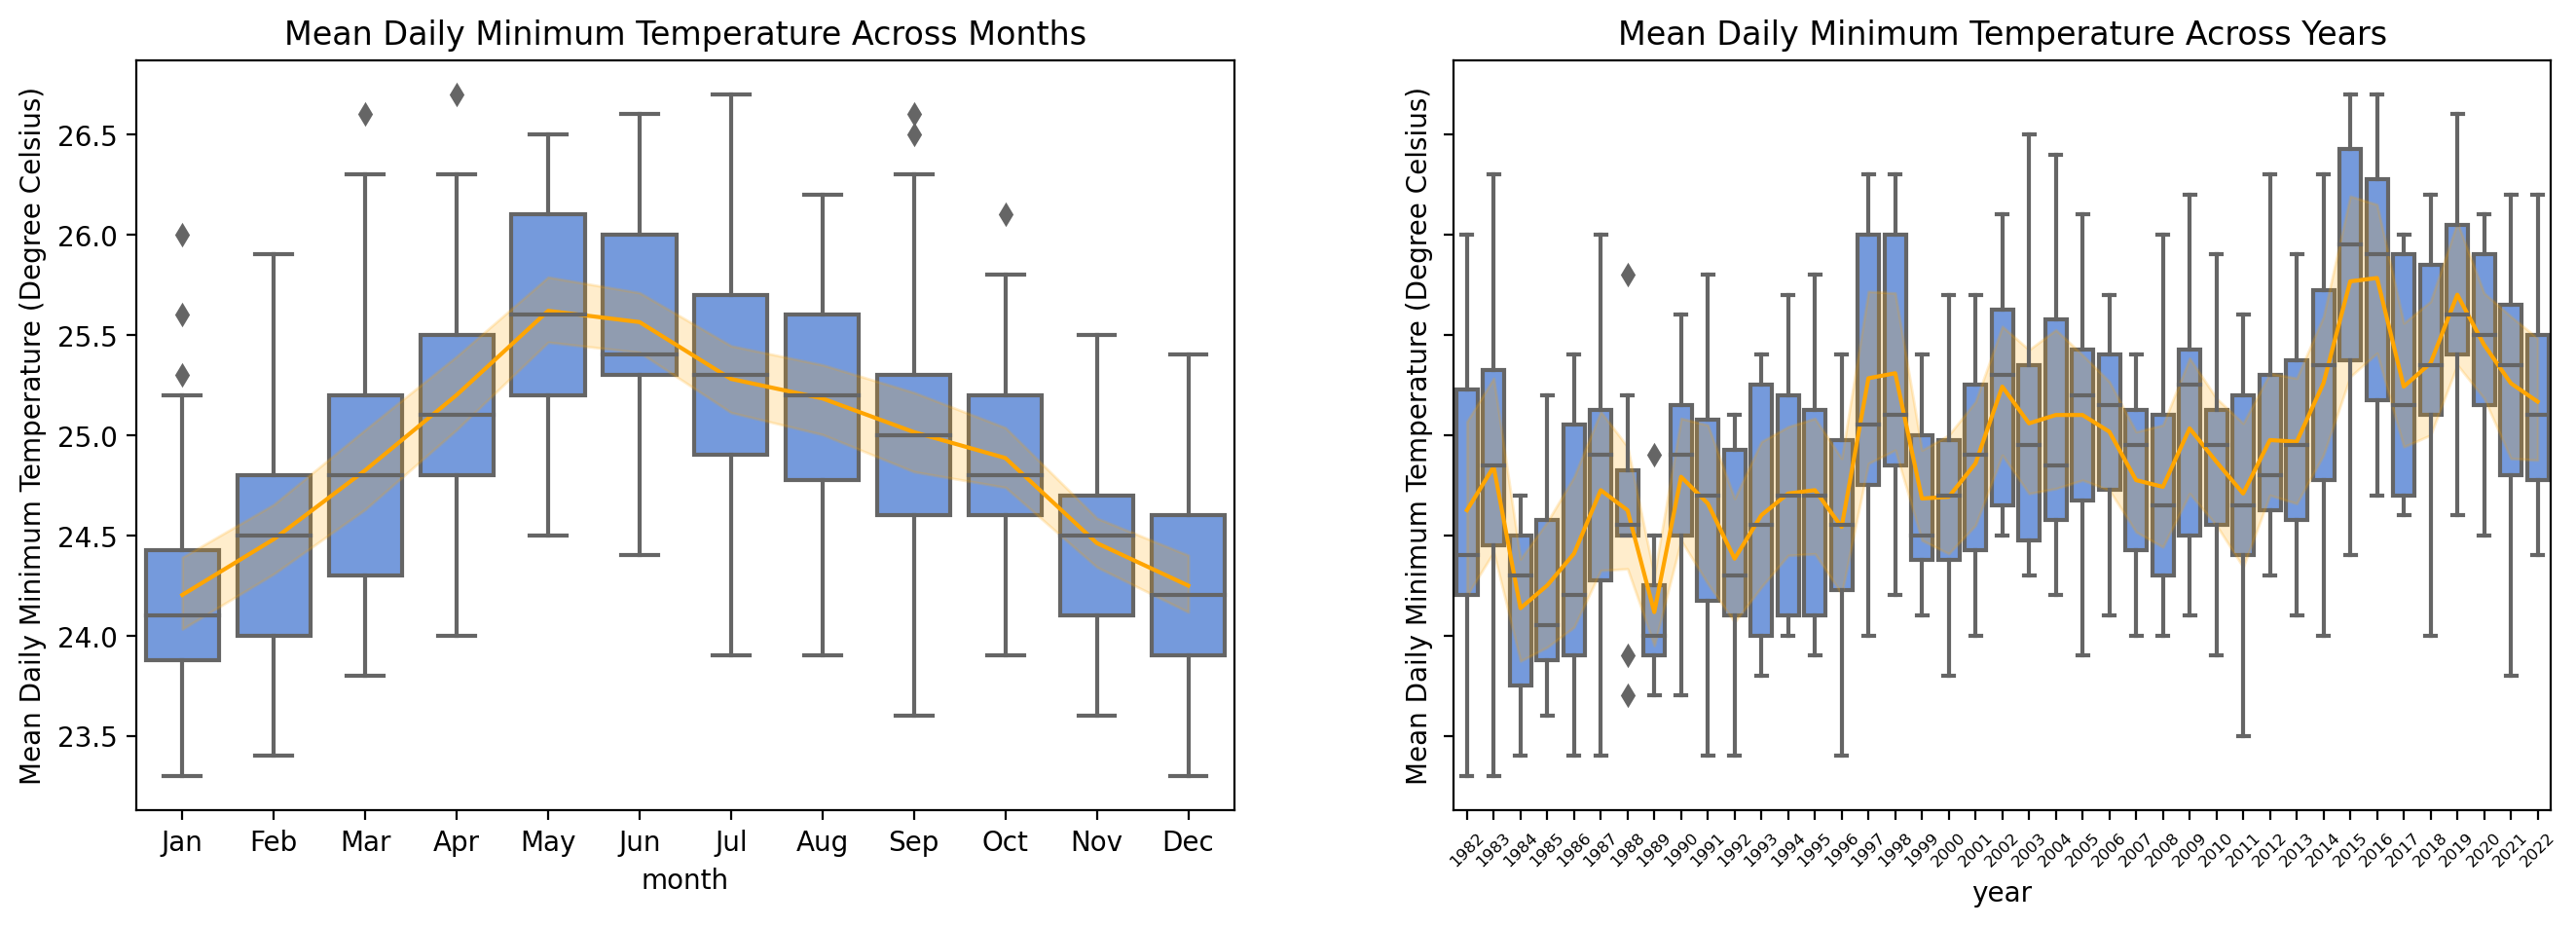

In [70]:
climate['month'] = climate['date'].dt.strftime('%m')
climate['year'] = climate['date'].dt.strftime('%Y')

# filters
filt=remove_outlier(climate, 'temp_mean_daily_min')

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.boxplot(data=filt.sort_values(by='month'), x='month', y='temp_mean_daily_min', ax=axes[0], color='cornflowerblue').set(title='Mean Daily Minimum Temperature Across Months', ylabel='Mean Daily Minimum Temperature (Degree Celsius)')
sns.lineplot(data=filt.sort_values(by='month'), x='month', y='temp_mean_daily_min', ax=axes[0], color='orange').set(title='Mean Daily Minimum Temperature Across Months', ylabel='Mean Daily Minimum Temperature (Degree Celsius)')
axes[0].set_xticks(range(len(lst_months)),labels=lst_months)

sns.boxplot(data=filt.sort_values(by='year'), x='year', y='temp_mean_daily_min',ax=axes[1], color='cornflowerblue').set(title='Mean Daily Minimum Temperature Across Years', ylabel='Mean Daily Minimum Temperature (Degree Celsius)')
sns.lineplot(data=filt.sort_values(by='year'), x='year', y='temp_mean_daily_min',ax=axes[1], color='orange').set(title='Mean Daily Minimum Temperature Across Years', ylabel='Mean Daily Minimum Temperature (Degree Celsius)')
axes[1].tick_params(rotation=45, labelsize=6)
None

Visualize distribution of 'temp_mean_daily_max' using histograms and other plots.

Statistical Data for temp_mean_daily_max
Mean: 31.538716356107663
Standard Deviation: 0.8015622766071523
p: 0.04147123917937279
Since p <= 0.05, it can be concluded that temp_mean_daily_max does not follow a normal distribution (reject H0)
Distribution of temp_mean_daily_max is positively skewed, with skew at: 0.05660731713991399


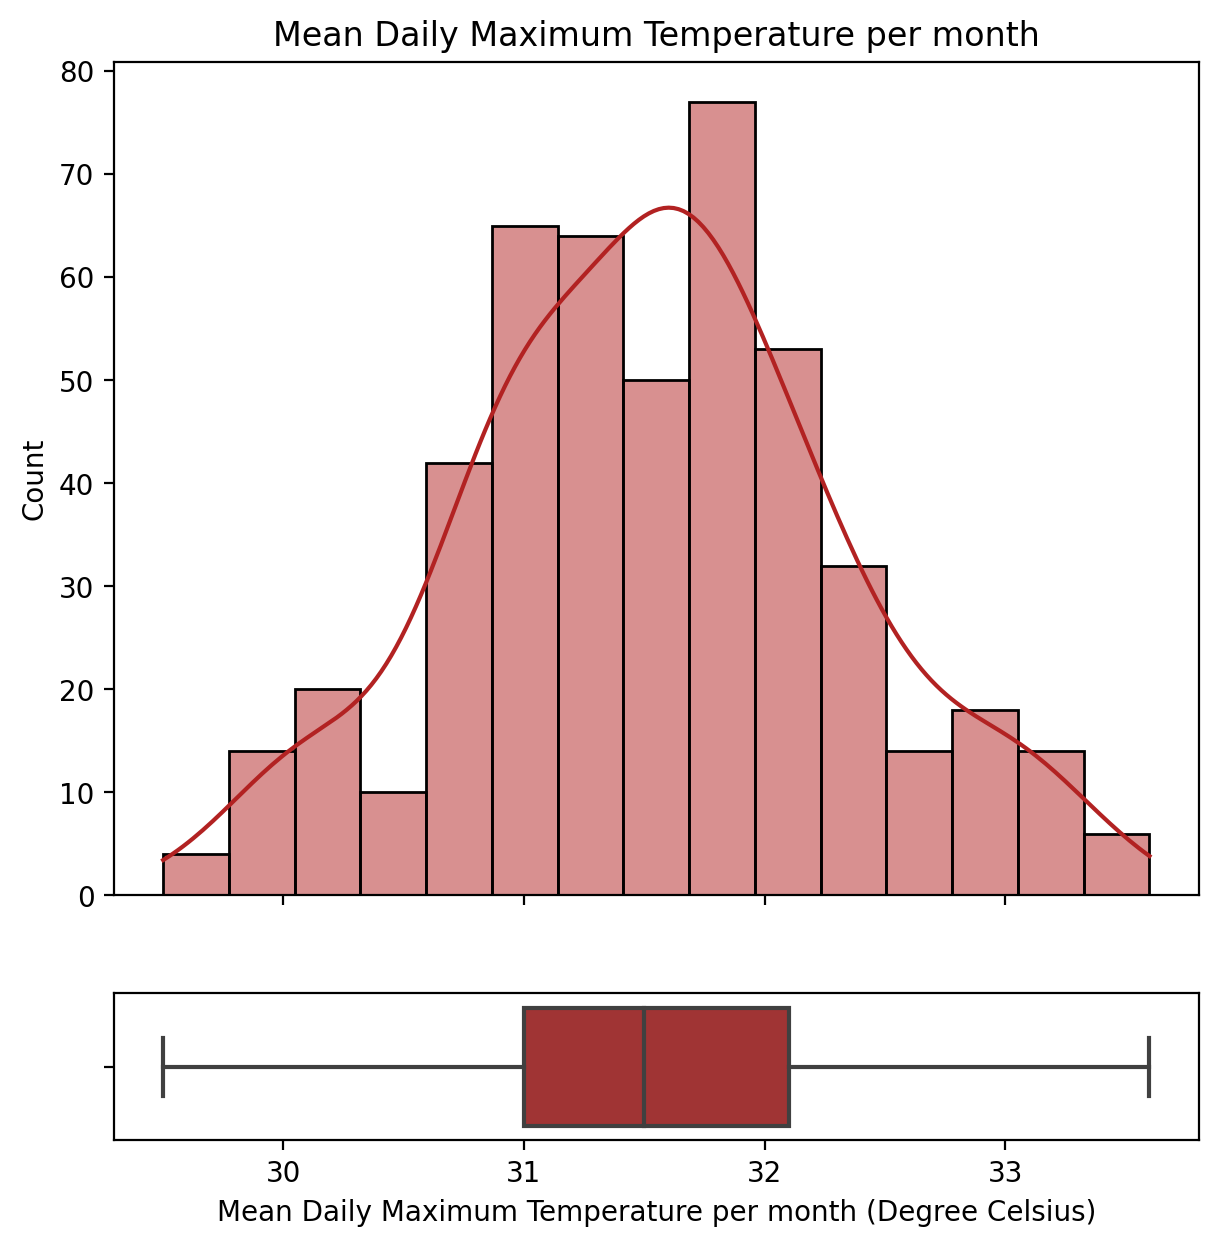

In [71]:
col='temp_mean_daily_max'
filt=remove_outlier(climate,col)

df=filt

# subplots
fig, axes = plt.subplots(2,1,figsize=(7,7),sharex=True,gridspec_kw={'height_ratios':(0.85,0.15)})

# Plot the actual histogram.
sns.histplot(data=df,x=col,kde=True,ax=axes[0],color='firebrick').set(title='Mean Daily Maximum Temperature per month',xlabel='Mean Daily Maximum Temperature per month (Degree Celsius)')

#plot boxplot
sns.boxplot(data=df,x=col,ax=axes[1],color='firebrick').set(title='',xlabel='Mean Daily Maximum Temperature per month (Degree Celsius)')
None

print(statistical_data(df,col))

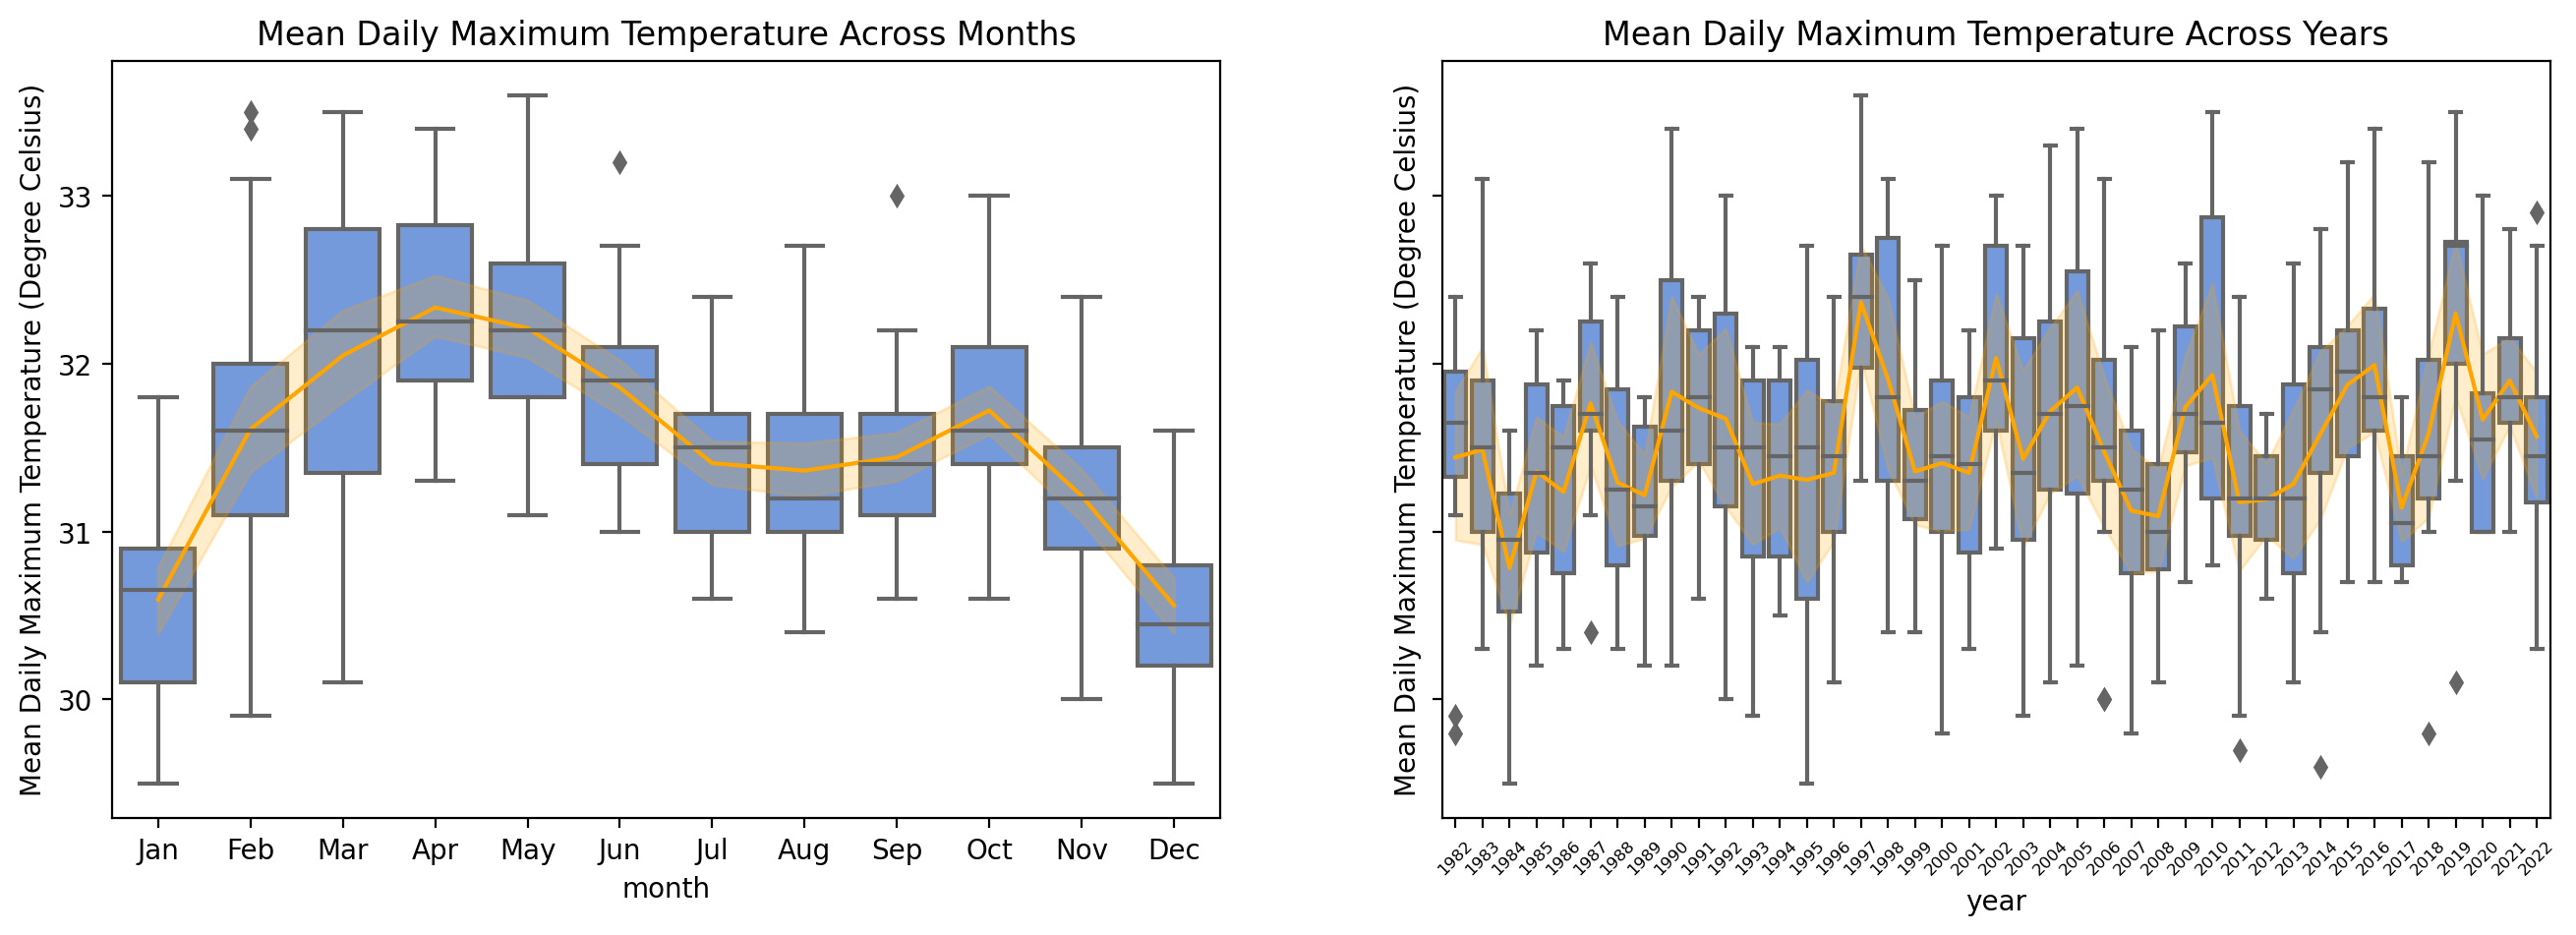

In [72]:
climate['month'] = climate['date'].dt.strftime('%m')
climate['year'] = climate['date'].dt.strftime('%Y')

# filters
filt=remove_outlier(climate, 'temp_mean_daily_max')

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.boxplot(data=filt.sort_values(by='month'), x='month', y='temp_mean_daily_max', ax=axes[0], color='cornflowerblue').set(title='Mean Daily Maximum Temperature Across Months', ylabel='Mean Daily Maximum Temperature (Degree Celsius)')
sns.lineplot(data=filt.sort_values(by='month'), x='month', y='temp_mean_daily_max', ax=axes[0], color='orange').set(title='Mean Daily Maximum Temperature Across Months', ylabel='Mean Daily Maximum Temperature (Degree Celsius)')
axes[0].set_xticks(range(len(lst_months)),labels=lst_months)

sns.boxplot(data=filt.sort_values(by='year'), x='year', y='temp_mean_daily_max',ax=axes[1], color='cornflowerblue').set(title='Mean Daily Maximum Temperature Across Years', ylabel='Mean Daily Maximum Temperature (Degree Celsius)')
sns.lineplot(data=filt.sort_values(by='year'), x='year', y='temp_mean_daily_max',ax=axes[1], color='orange').set(title='Mean Daily Maximum Temperature Across Years', ylabel='Mean Daily Maximum Temperature (Degree Celsius)')
axes[1].tick_params(rotation=45, labelsize=6)
None

Visualize distribution of 'wet_bulb_temperature' using histograms and other plots.

Statistical Data for wet_bulb_temperature
Mean: 25.293219201798646
Standard Deviation: 0.5347389465057655
p: 0.5689795613288879
Since p > 0.05, it cannot be concluded that wet_bulb_temperature does not follow a normal distribution (fail to reject H0)
Distribution of wet_bulb_temperature is negatively skewed, with skew at: -0.08688693672671037


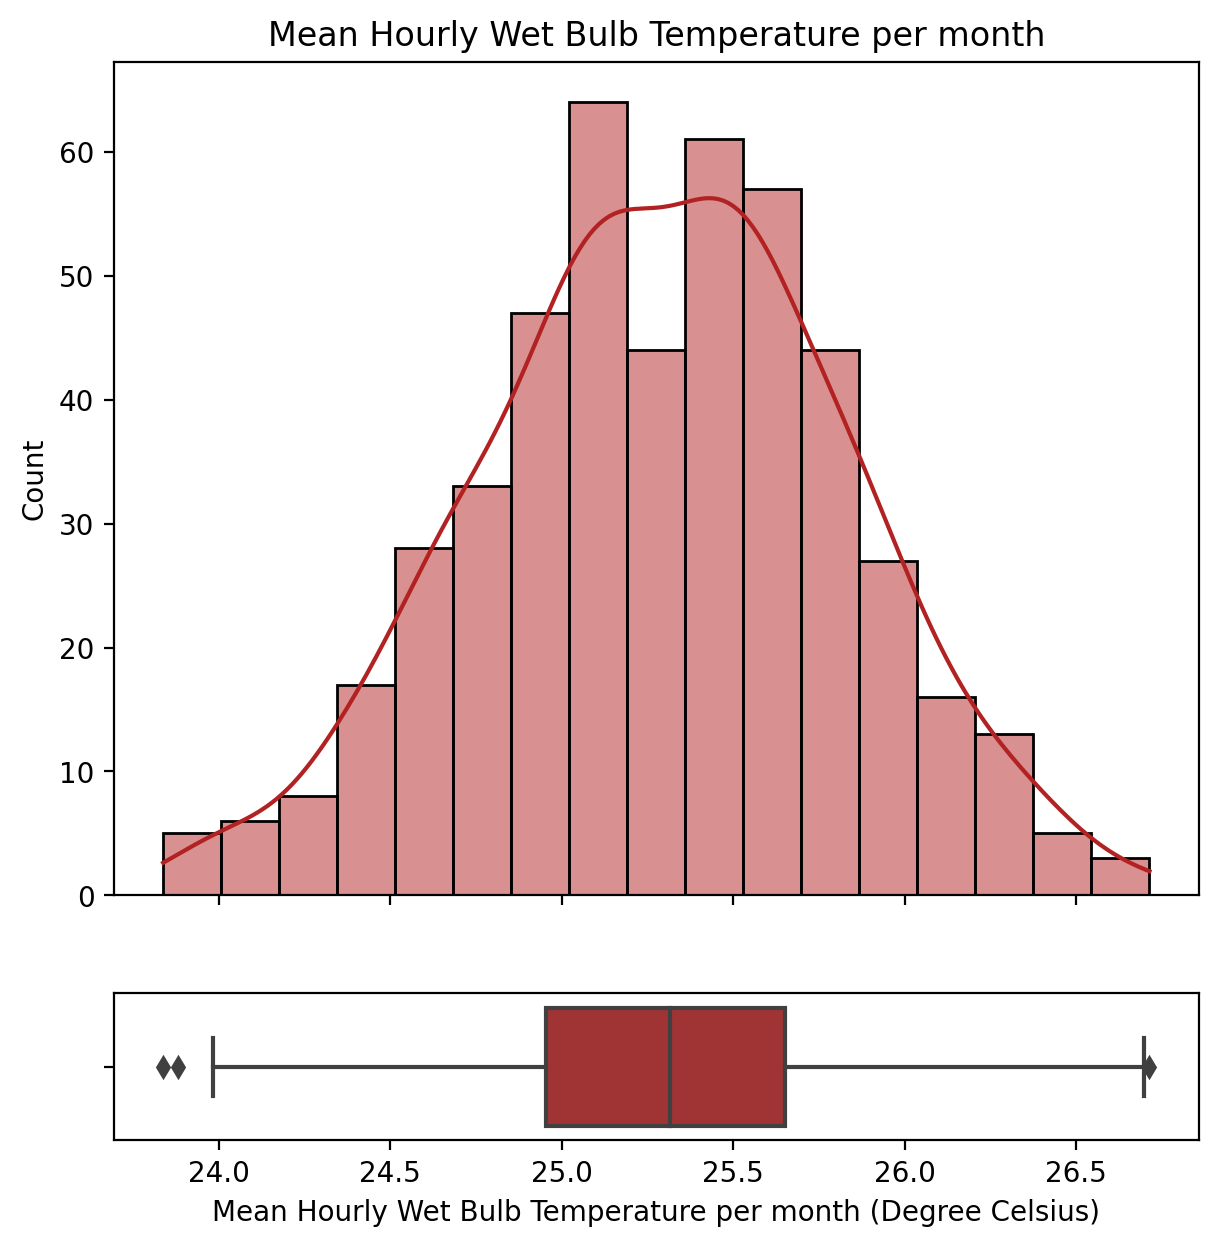

In [73]:
col='wet_bulb_temperature'
filt=remove_outlier(climate,col)

df=filt

# subplots
fig, axes = plt.subplots(2,1,figsize=(7,7),sharex=True,gridspec_kw={'height_ratios':(0.85,0.15)})

# Plot the actual histogram.
sns.histplot(data = df, x=col,kde=True,ax=axes[0],color='firebrick').set(title='Mean Hourly Wet Bulb Temperature per month',xlabel='Mean Hourly Wet Bulb Temperature per month (Degree Celsius)')

#plot boxplot
sns.boxplot(data = df, x=col,ax=axes[1],color='firebrick').set(title='',xlabel='Mean Hourly Wet Bulb Temperature per month (Degree Celsius)')
None

print(statistical_data(df,col))

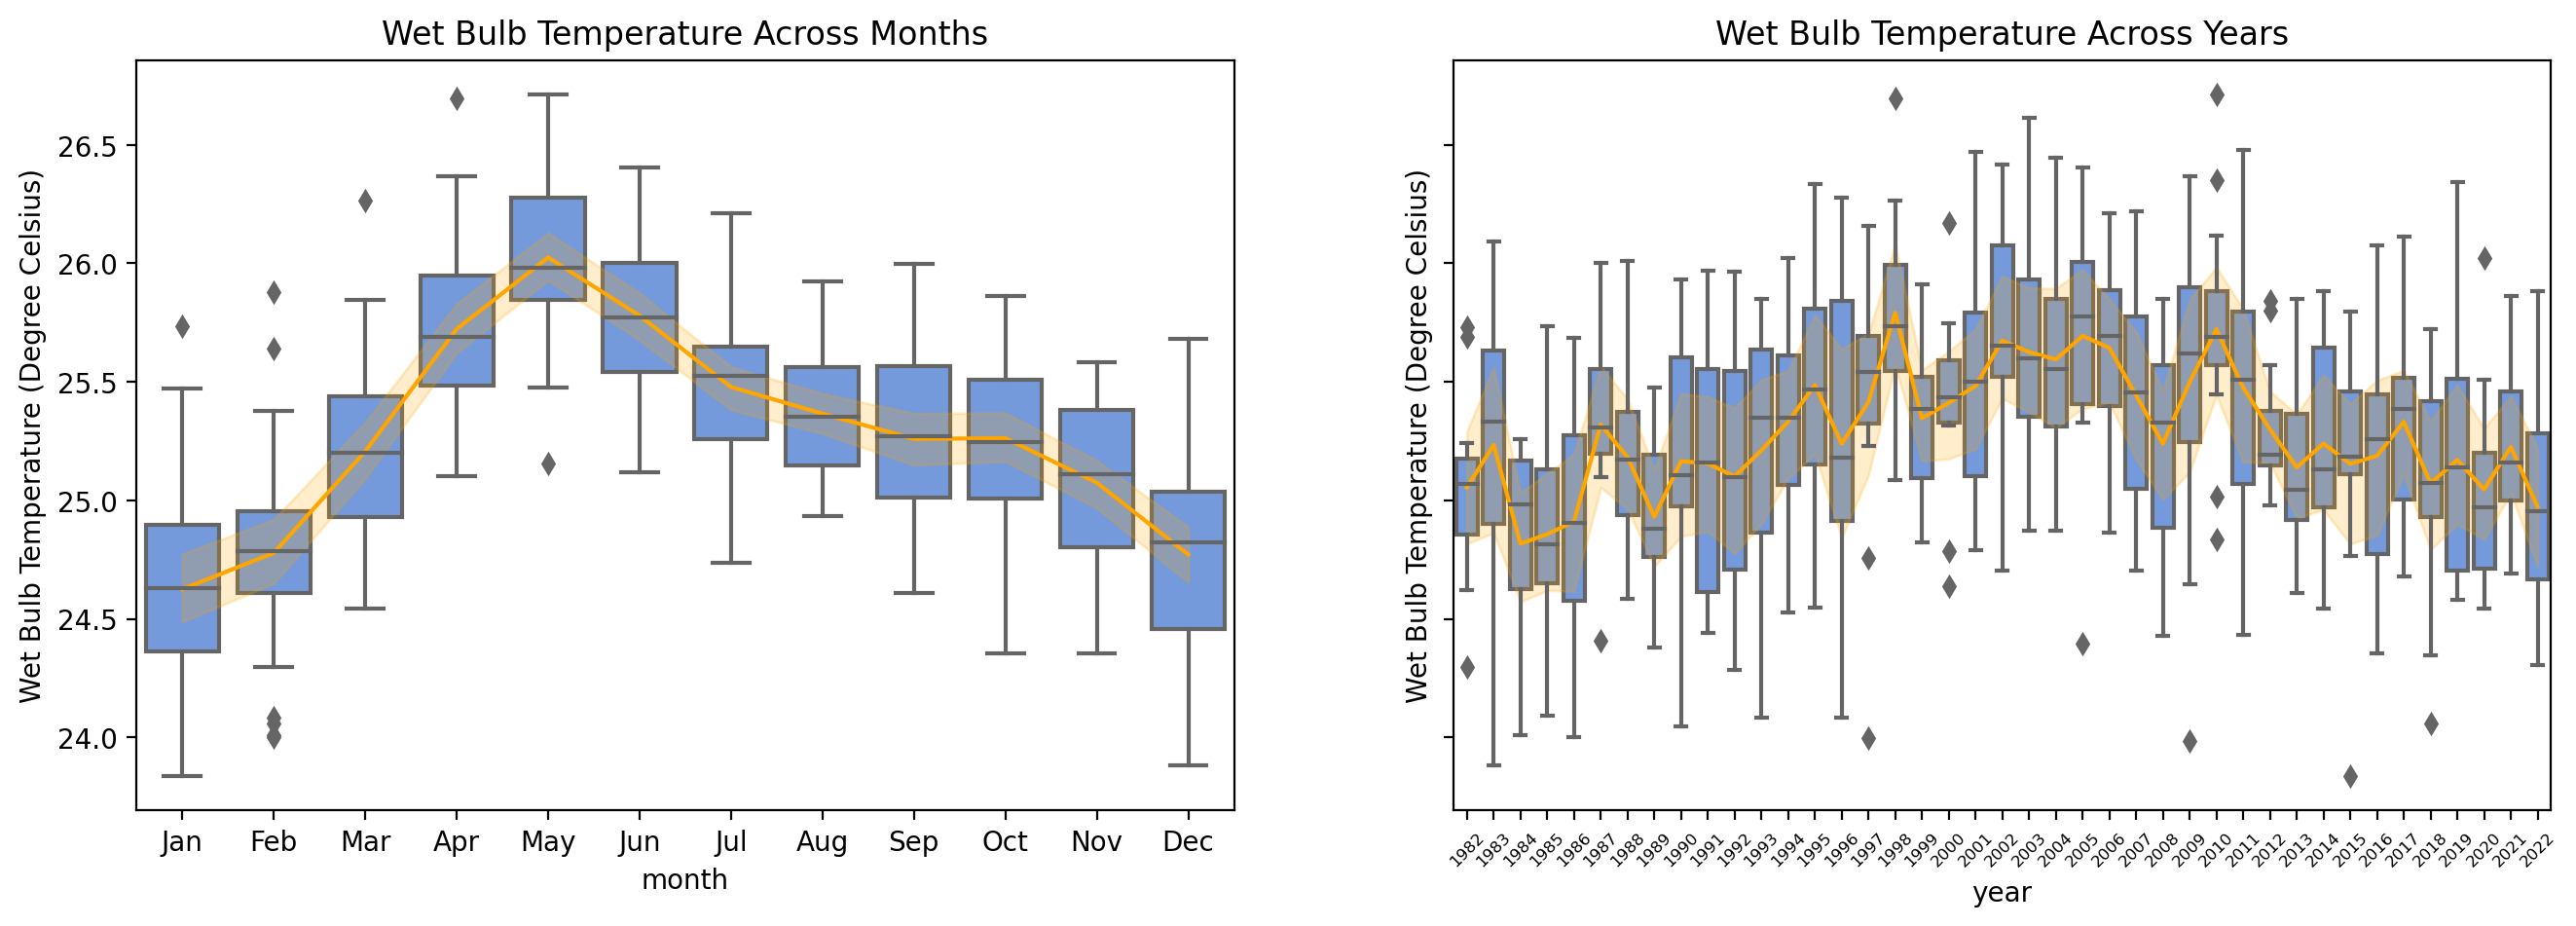

In [74]:
climate['month'] = climate['date'].dt.strftime('%m')
climate['year'] = climate['date'].dt.strftime('%Y')

# filters
filt=remove_outlier(climate, 'wet_bulb_temperature')

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

sns.boxplot(data=filt.sort_values(by='month'), x='month', y='wet_bulb_temperature', ax=axes[0], color='cornflowerblue').set(title='Wet Bulb Temperature Across Months', ylabel='Wet Bulb Temperature (Degree Celsius)')
sns.lineplot(data=filt.sort_values(by='month'), x='month', y='wet_bulb_temperature', ax=axes[0], color='orange').set(title='Wet Bulb Temperature Across Months', ylabel='Wet Bulb Temperature (Degree Celsius)')
axes[0].set_xticks(range(len(lst_months)),labels=lst_months)

sns.boxplot(data=filt.sort_values(by='year'), x='year', y='wet_bulb_temperature',ax=axes[1], color='cornflowerblue').set(title='Wet Bulb Temperature Across Years', ylabel='Wet Bulb Temperature (Degree Celsius)')
sns.lineplot(data=filt.sort_values(by='year'), x='year', y='wet_bulb_temperature',ax=axes[1], color='orange').set(title='Wet Bulb Temperature Across Years', ylabel='Wet Bulb Temperature (Degree Celsius)')
axes[1].tick_params(rotation=45, labelsize=6)
None

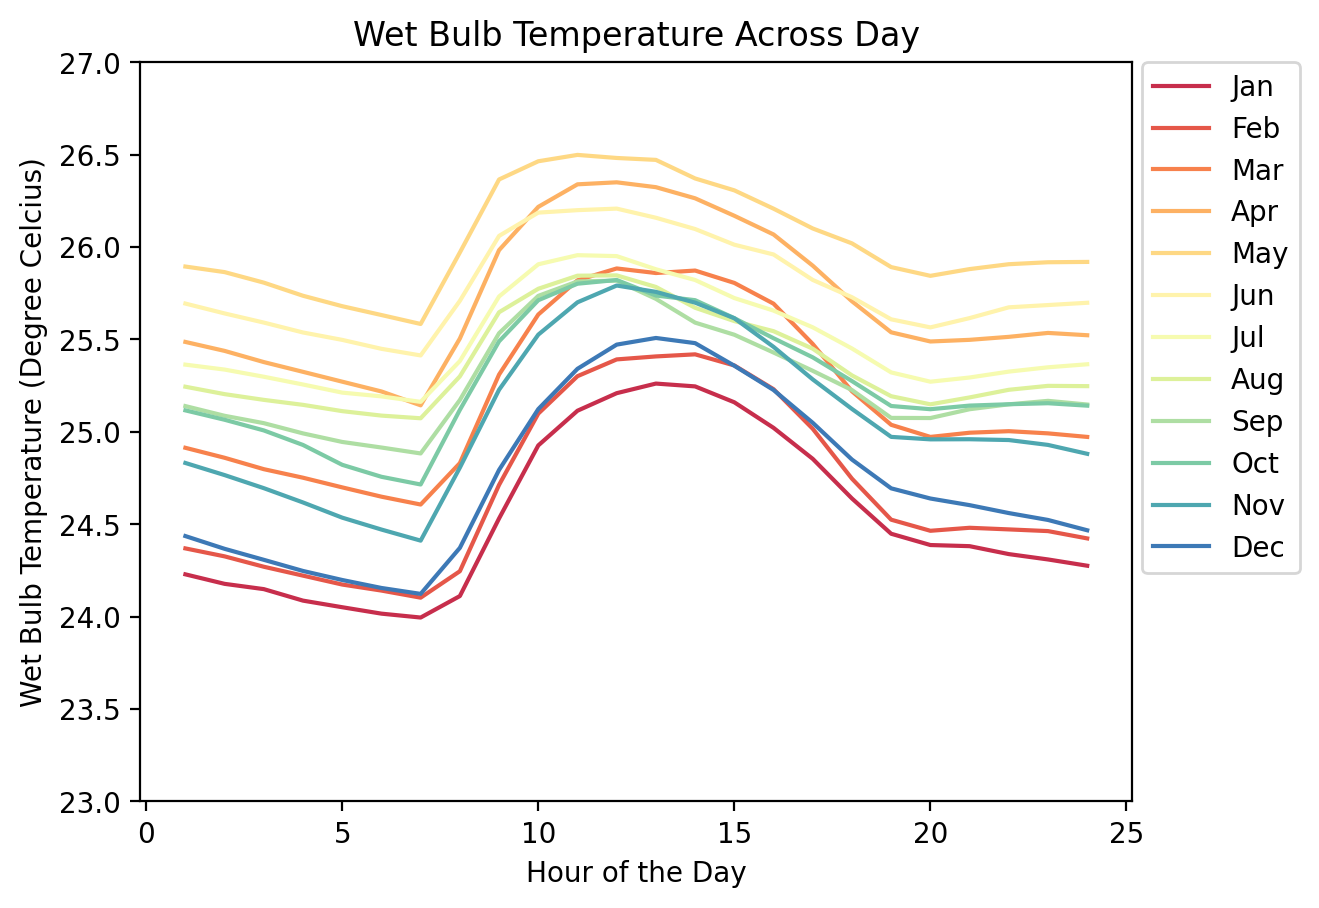

In [75]:
filt=remove_outlier(wet_bulb_temp, 'wet_bulb_temperature')

# plot different months in the same graph
sns.lineplot(data=filt,x='wbt_time',y='wet_bulb_temperature',hue='month',palette='Spectral', errorbar=None).set(ylim=(23,27), title='Wet Bulb Temperature Across Day', xlabel='Hour of the Day',ylabel='Wet Bulb Temperature (Degree Celcius)')
plt.legend(bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)

None

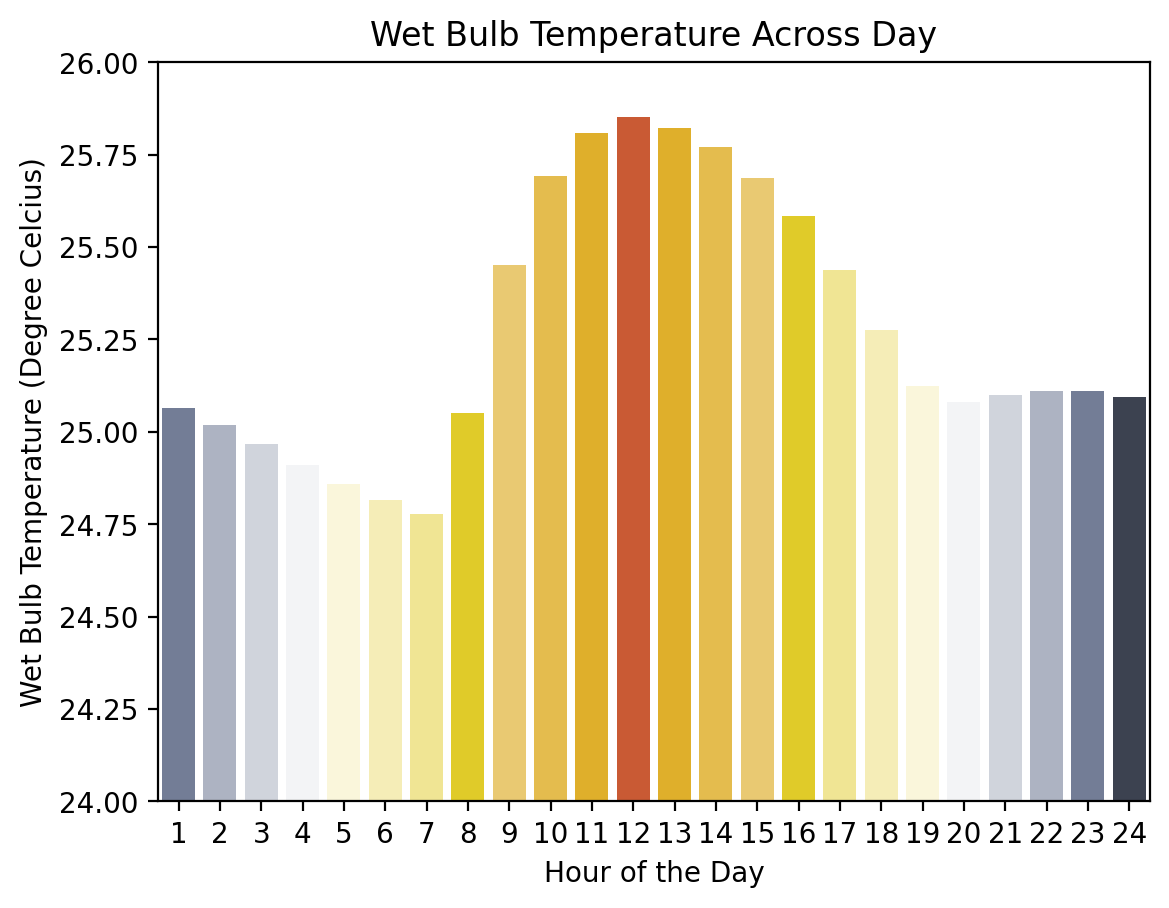

In [76]:
filt=remove_outlier(wet_bulb_temp, 'wet_bulb_temperature')

# mean wet bulb temp across day
pal=["#6D7A9C","#AAB2C5","#CED3DE","#F3F4F7","#FFFAD6","#FFF5AD","#FFF185","#FFE20A","#FDD25E","#FDC835","#FDBD0D",'#E24E1B',"#FDBD0D","#FDC835","#FDD25E","#FFE20A","#FFF185","#FFF5AD","#FFFAD6","#F3F4F7","#CED3DE","#AAB2C5","#6D7A9C","#394053"]
sns.barplot(filt,x='wbt_time',y=wet_bulb_temp['wet_bulb_temperature'],errorbar=None,palette=pal).set(ylim=(24,26), title='Wet Bulb Temperature Across Day', xlabel='Hour of the Day',ylabel='Wet Bulb Temperature (Degree Celcius)')
None

Heatmap of Correlation of Climate Data and Workplace Injuries (Transportation & Storage and Construction)

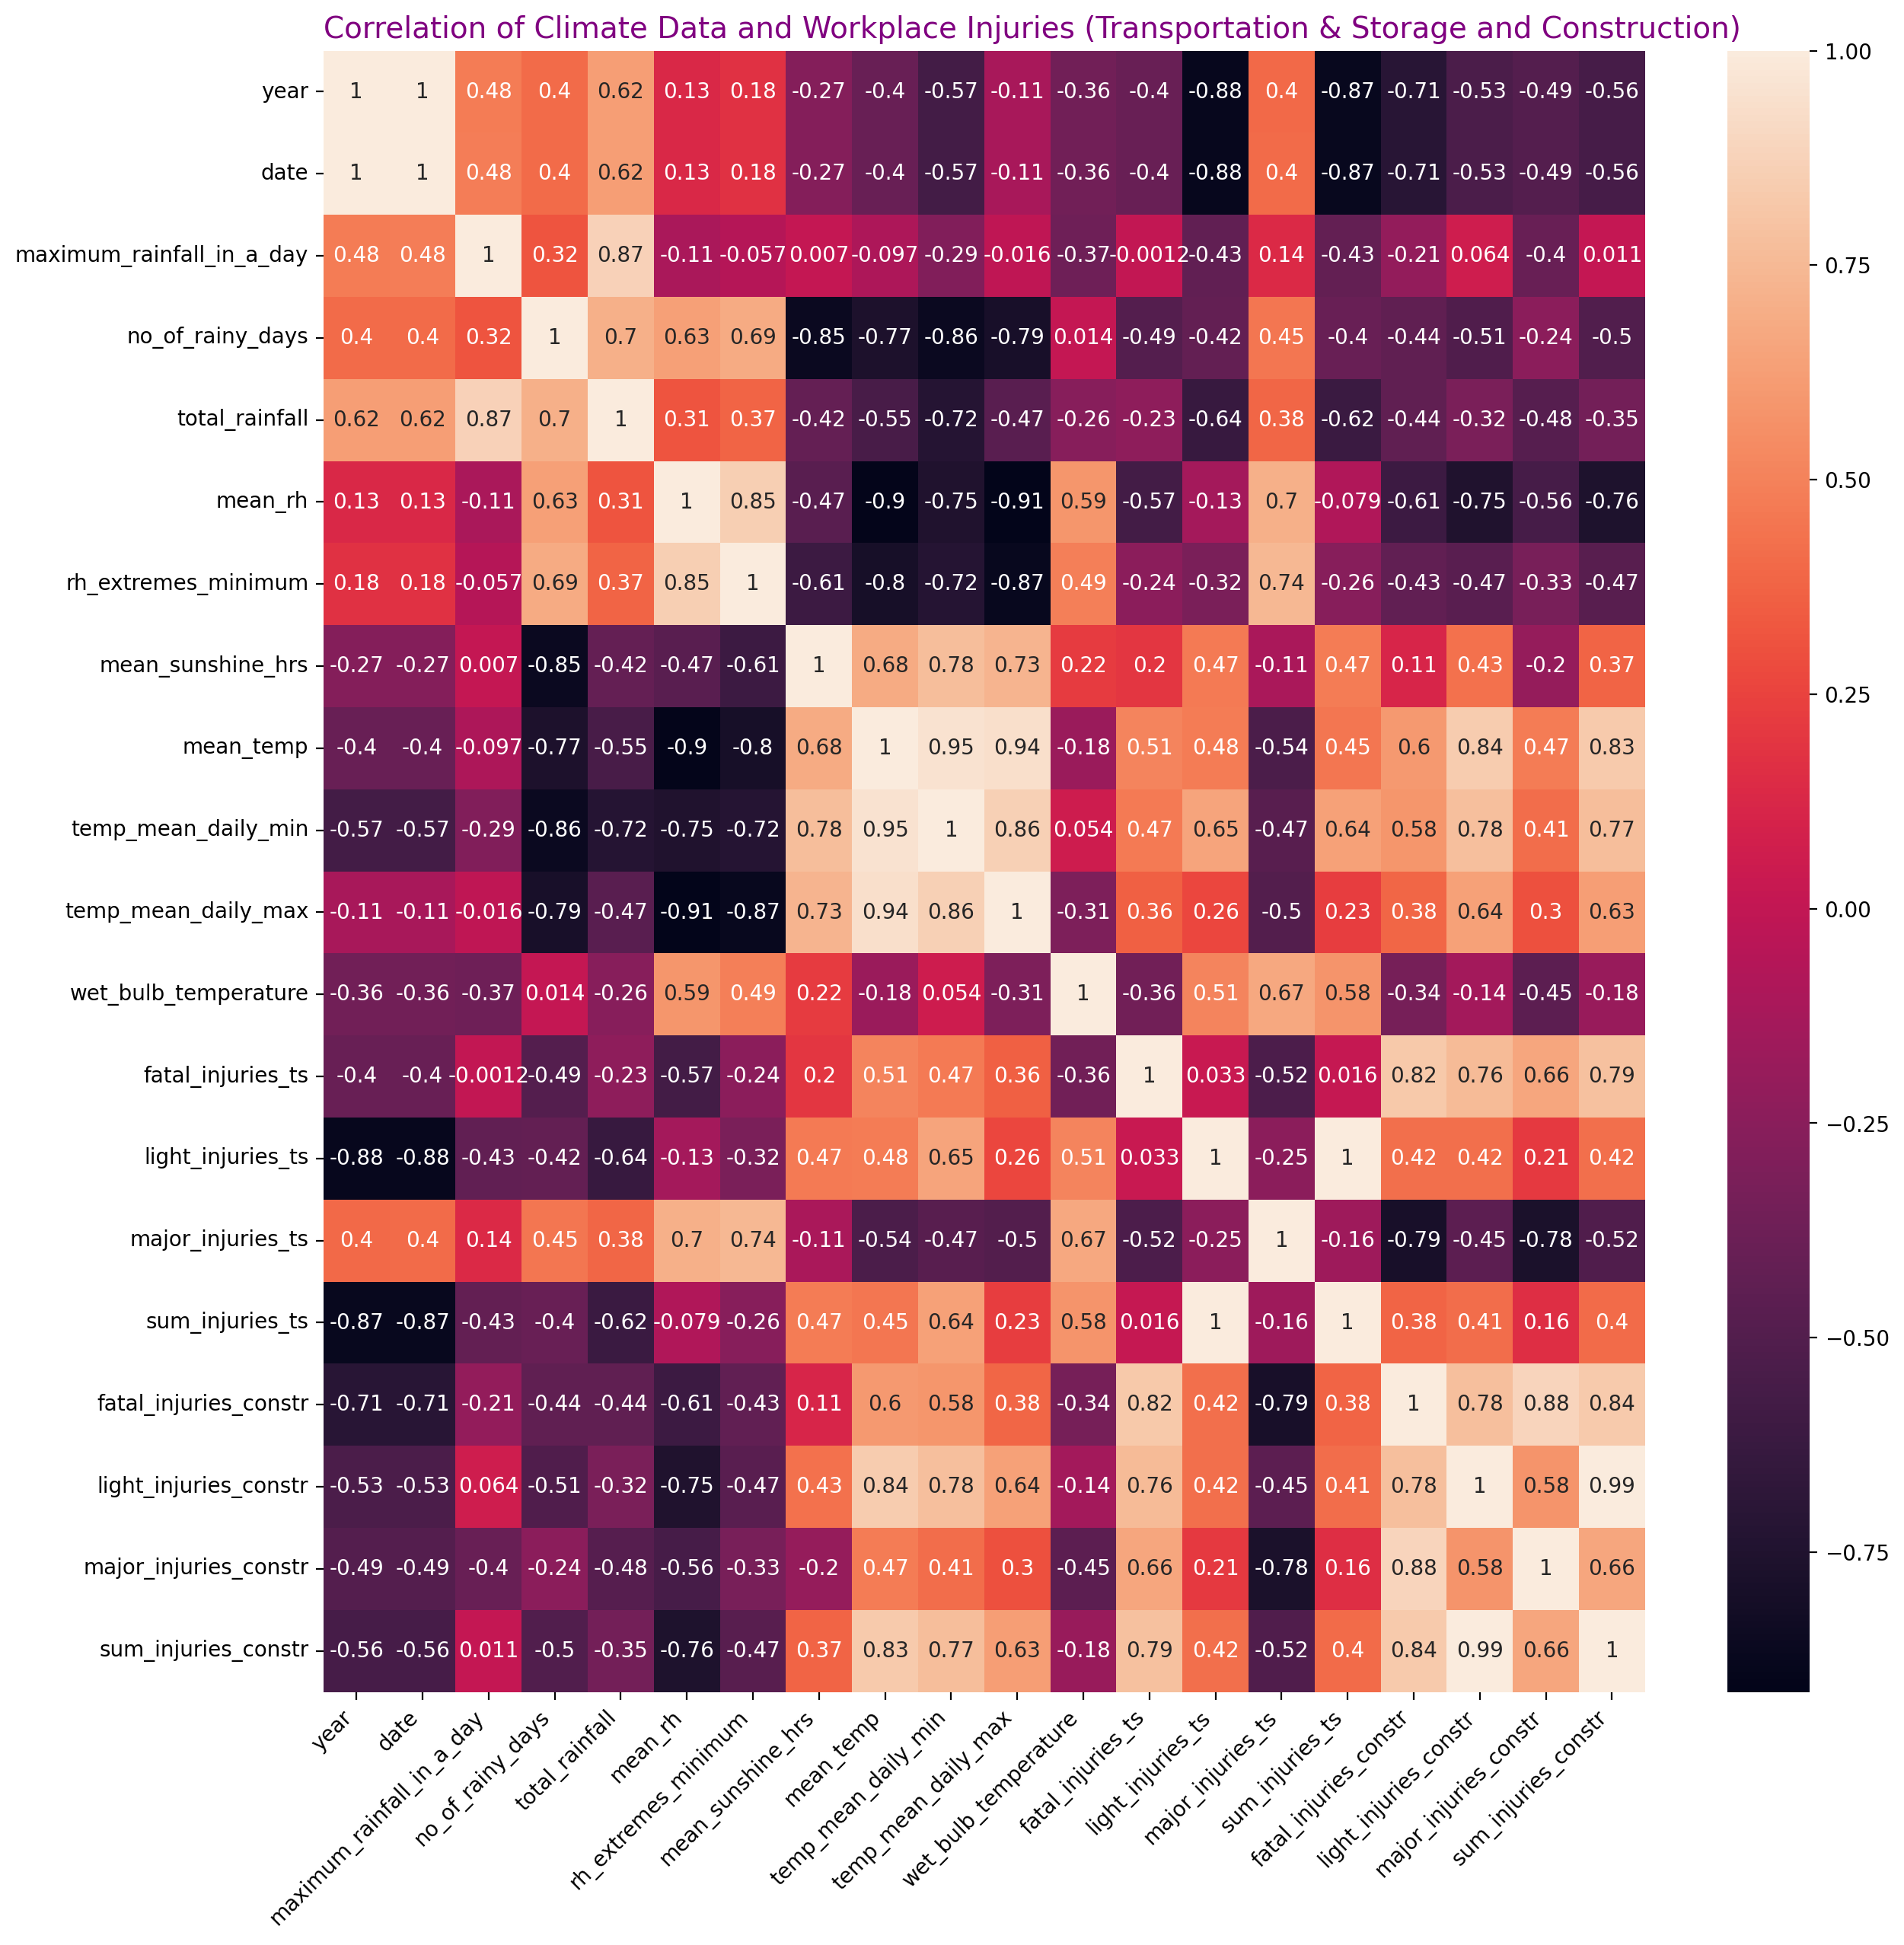

In [77]:
plt.figure(figsize=(14,14))
plt.title("Correlation of Climate Data and Workplace Injuries (Transportation & Storage and Construction)", loc='left', color='purple', size=14)
g = sns.heatmap(climate_weather_df.corr(numeric_only=False),annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right', color='black')
None # prevent the list of label objects showing up annoyingly in the output›

Statistical Data for major_injuries_ts
Mean: 57.57142857142857
Standard Deviation: 9.675693650537289
p: 0.869836688041687
Since p > 0.05, it cannot be concluded that major_injuries_ts does not follow a normal distribution (fail to reject H0)
Distribution of major_injuries_ts is positively skewed, with skew at: 0.31951828224558937
Correlation between wet_bulb_temperature and major_injuries_ts is 0.6711490447385932 which indicates a strong positive correlation between the two variables.
None


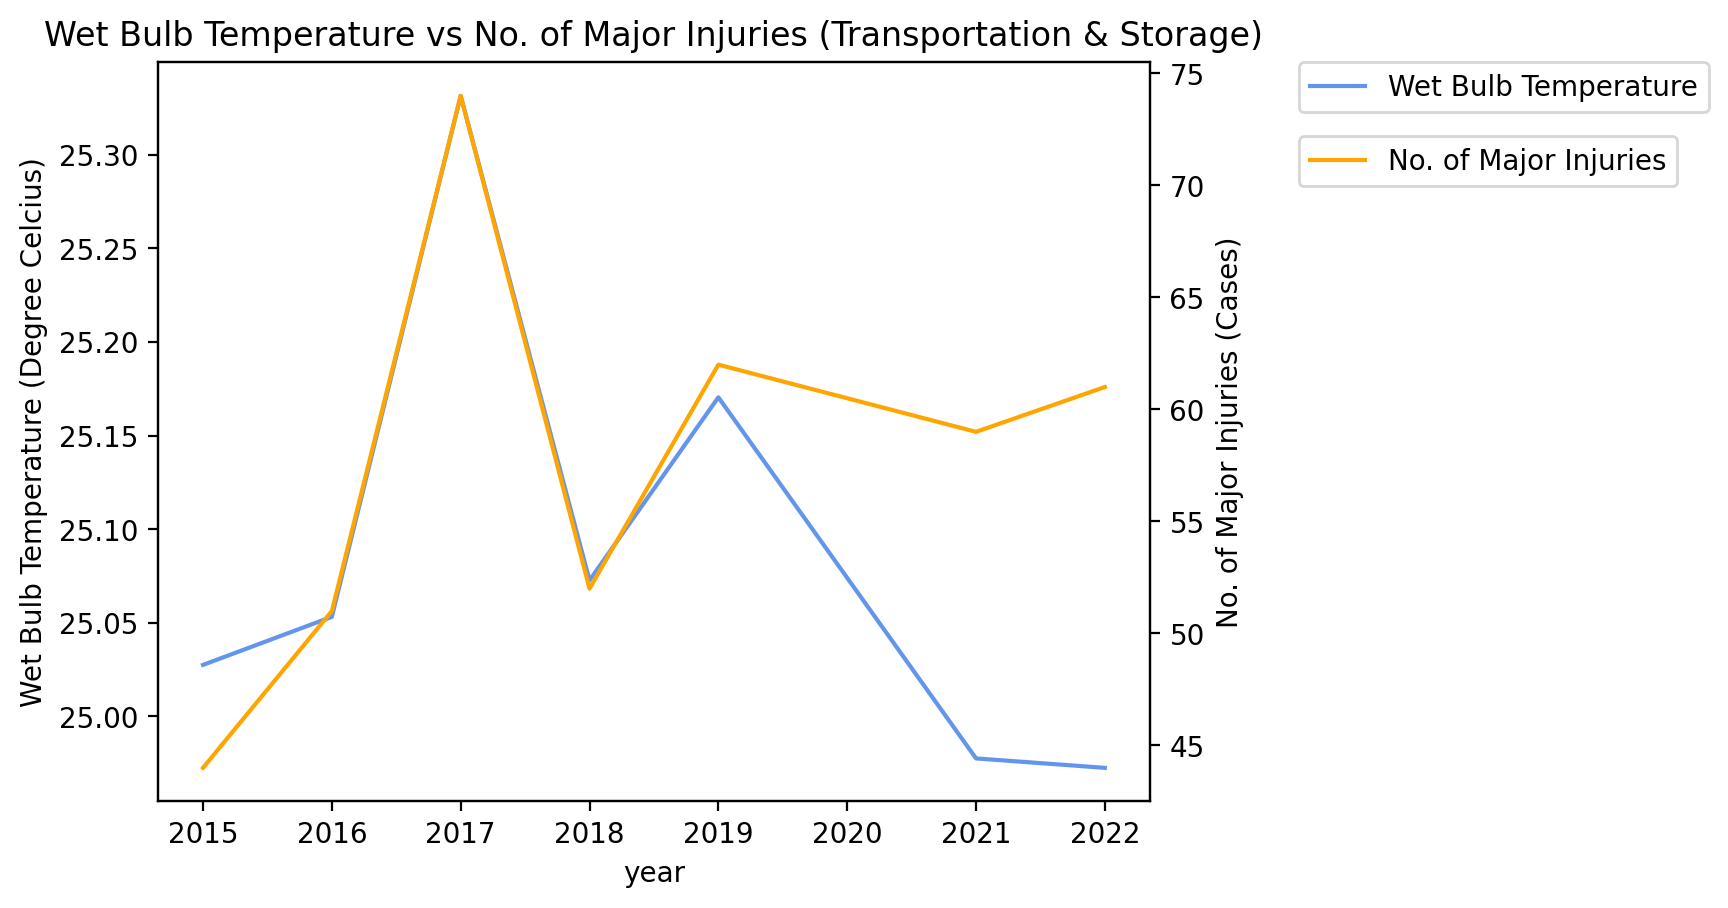

In [78]:
df=climate_weather_df
col1='wet_bulb_temperature'
col2='major_injuries_ts'

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.lineplot(data=df,x='year',y=col1,ax=ax1,errorbar=None,color='cornflowerblue', legend='auto', label='Wet Bulb Temperature').set(title='Wet Bulb Temperature vs No. of Major Injuries (Transportation & Storage)',ylabel='Wet Bulb Temperature (Degree Celcius)')
sns.lineplot(data=df,x='year',y=col2,ax=ax2,errorbar=None,color='orange', legend='auto', label='No. of Major Injuries').set(ylabel='No. of Major Injuries (Cases)')
ax1.legend(bbox_to_anchor=(1.15,1), loc='upper left', borderaxespad=0)
ax2.legend(bbox_to_anchor=(1.15,0.9), loc='upper left', borderaxespad=0)

print(statistical_data(df,col2))
print(corr_strength(df,col1,col2))
None

Correlation between wet bulb temperature and major injuries (Transportation & Storage) is 0.67 which indicates a strong positive correlation between the two variables. This shows that high levels of humidity combined with high temperatures can cause heat exhaustion which leads to an increase in workplace accidents, specifically the transport and storage industry. Wet bulb temperature is typically the highest between the months of April and July.
According to Health Canada, "The hotter and more humid it is, the greater the risk of heat exhaustion. Symptoms include headache, heavy sweating, clammy skin, dizziness or confusion, cramps, rapid breathing, nausea and vomiting, among others" (McQuillan, 2022).

The reason for zooming in on the transport and storage industry is due to the fact that operating a vehicle with such symptoms can lead to major accidents. 

Interestingly, it can be observed that there is a divergence from the year 2020 to 2022. This is likely due to the  surge in e-commerce, groceries and food deliveries due to COVID-19. While this results in a decreased correlation, this is likely a temporary divergence as COVID-19 restrictions continue to ease and logistics companies learn to cope with the increase in deliveries.

Statistical Data for major_injuries_ts
Mean: 57.57142857142857
Standard Deviation: 9.675693650537289
p: 0.869836688041687
Since p > 0.05, it cannot be concluded that major_injuries_ts does not follow a normal distribution (fail to reject H0)
Distribution of major_injuries_ts is positively skewed, with skew at: 0.31951828224558937
Correlation between no_of_rainy_days and major_injuries_ts is 0.4508467161680651 which indicates a moderate positive correlation between the two variables.
None


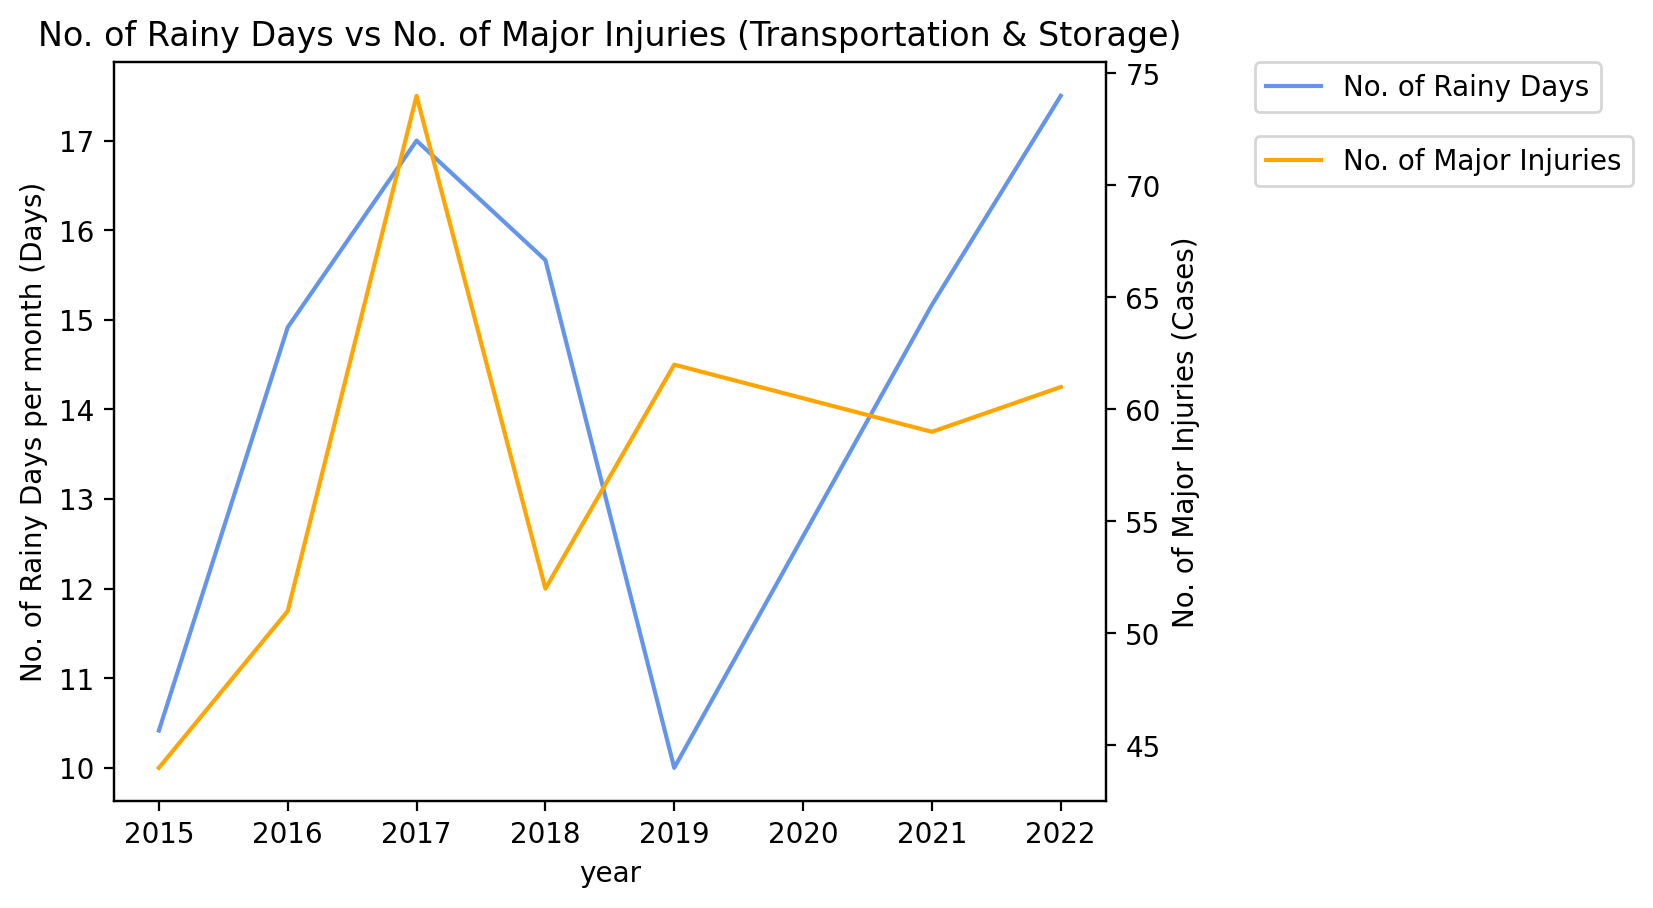

In [79]:
df=climate_weather_df
col1='no_of_rainy_days'
col2='major_injuries_ts'

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.lineplot(data=df,x='year',y=col1,ax=ax1,errorbar=None,color='cornflowerblue', legend='auto', label='No. of Rainy Days').set(title='No. of Rainy Days vs No. of Major Injuries (Transportation & Storage)',ylabel='No. of Rainy Days per month (Days)')
sns.lineplot(data=df,x='year',y=col2,ax=ax2,errorbar=None,color='orange', legend='auto', label='No. of Major Injuries').set(ylabel='No. of Major Injuries (Cases)')
ax1.legend(bbox_to_anchor=(1.15,1), loc='upper left', borderaxespad=0)
ax2.legend(bbox_to_anchor=(1.15,0.9), loc='upper left', borderaxespad=0)

print(statistical_data(df,col2))
print(corr_strength(df,col1,col2))
None

Statistical Data for light_injuries_constr
Mean: 2327.5714285714284
Standard Deviation: 172.01924034136138
p: 0.7271162867546082
Since p > 0.05, it cannot be concluded that light_injuries_constr does not follow a normal distribution (fail to reject H0)
Distribution of light_injuries_constr is positively skewed, with skew at: 0.4734962781351596
Correlation between mean_temp and light_injuries_constr is 0.8402760490065967 which indicates a very strong positive correlation between the two variables.
None


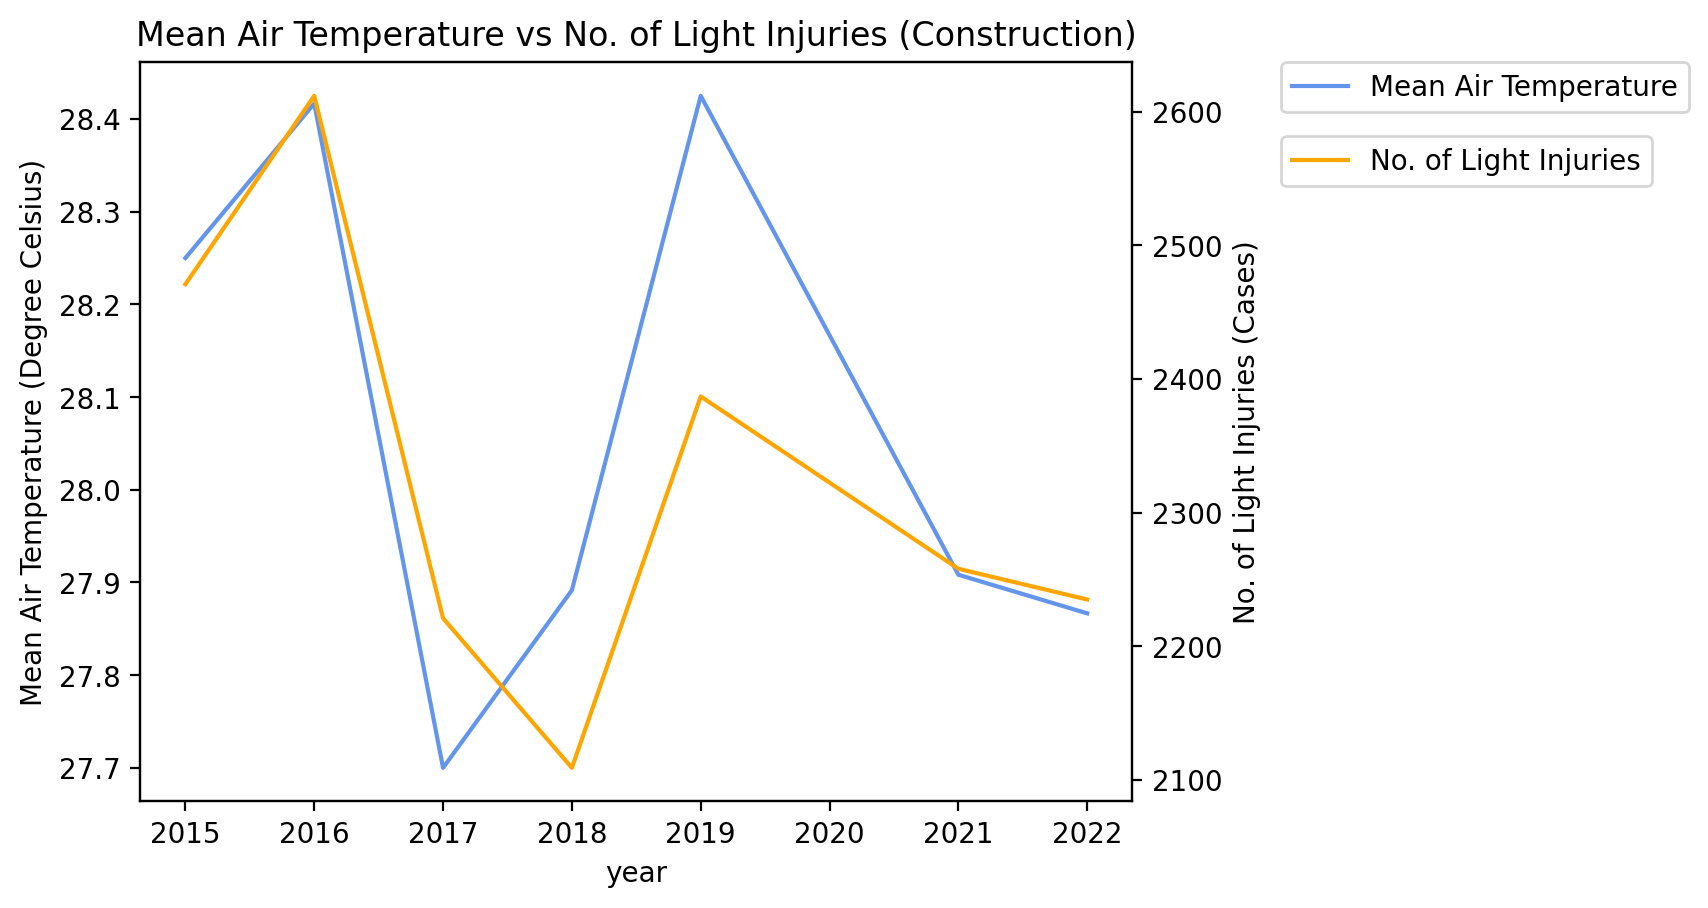

In [80]:
df=climate_weather_df
col1='mean_temp'
col2='light_injuries_constr'

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.lineplot(data=df,x='year',y=col1,ax=ax1,errorbar=None,color='cornflowerblue', legend='auto', label='Mean Air Temperature').set(title='Mean Air Temperature vs No. of Light Injuries (Construction)',ylabel='Mean Air Temperature (Degree Celsius)')
sns.lineplot(data=df,x='year',y=col2,ax=ax2,errorbar=None,color='orange', legend='auto', label='No. of Light Injuries').set(ylabel='No. of Light Injuries (Cases)')
ax1.legend(bbox_to_anchor=(1.15,1), loc='upper left', borderaxespad=0)
ax2.legend(bbox_to_anchor=(1.15,0.9), loc='upper left', borderaxespad=0)

print(statistical_data(df,col2))
print(corr_strength(df,col1,col2))
None

Correlation between mean temperature and light injuries (construction industry) is 0.84 which indicates a very strong positive correlation between the two variables. This shows that high temperatures can cause heat exhaustion which leads to an increase in workplace accidents, specifically the construction industry where construction workers perform manual work outdoors with little to no shade.

## Conclusion and Recommendations

Over the years, weather pattern trends in Singapore seem to follow the global average trends, with increasing temperatures, decreasing relative humidity and more erratic weather patterns. While Singapore has not seen extreme weather related disasters causing obvious and visible damage, for example, the California wildfires or the floods in Northen Italy, we are slowly experiencing negative impacts of climate change. As such, literature on global climate trends are still applicable to local context.
One such application is workplace safety which is shown in this project to be closely linked to weather patterns and as such, we should proactively seek out implications of climate trends to the insurance industry to prevent adverse selection, improve pricing models and gather marketing insight

### Correlation between Mean Temperature and Light Injuries (Construction)

With the trend of increasing temperatures across the years, the actuarial team should look into adequately accounting for the increase in temperature to their long-term workplace safety pricing models so that the insurance company does not become susceptible to adverse selection (adverse selection refers to a scenario where either the buyer or the seller has information about an aspect of product quality that the other party does not have. Adverse selection is a common scenario in the insurance sector, where those who are  high-risk are more likely to sign up for insurance. (CFI, 2022)) by policyholders, where they unwittingly offer cheaper premiums than competitors who have adequately accounted for the impact brought forth by rising temperatures (Storey et al., 2019).

Actuarial team can also develop an Actuaries Climate Index (ACI), which seeks to quantify changes in the climate and is used to make informed decisions.

### Correlation between Wet Bulb Temperature and Major Injuries (Transportation & Storage)

From the graphs plotted above, there are clear patterns across months for wet bulb temperature. Typically, the months between April and July have the highest wet bulb temperature. The actuarial team should look into increasing prices for Collision Damage Waiver (a temporary vehicle insurance one can purchase on a monthly basis to cover a large portion of their insurance premiums, typically around 90%, should they get into an accident) for the months between April and July. This is so that the pricing model does not underestimate the impact of wet bulb temperature on the rate of major accidents in the Transportation & Storage industry. 

It would also be recommended for the marketing team to increase marketing efforts during periods with expected high wet bulb temperature as transport companies are likely to experience a surge in accidents during those months. Clickthrough rates on advertisements for Collision Damage Waiver ought to be higher as intent is there. This way, the insurance company will beat out competitors to their money by out representing them on advertisement channels specifically for those months, without wasting resources on months with lower wet bulb temperature and thus lower accident rates and consequently lower clickthrough rates.

## Citations

CFI Team, C. (2022, December 27). Adverse Selection. Corporate Finance Institute. Retrieved May 26, 2023, from https://corporatefinanceinstitute.com/resources/wealth-management/adverse-selection/

McQuillan, L. (2022, July 20). Too hot to handle: How to survive amid extreme heat and humidity. CBC. Retrieved May 25, 2023, from https://www.cbc.ca/news/health/heat-humidity-bodies-wet-bulb-1.6525711#:~:text=The%20hotter%20and%20more%20humid,others%2C%20according%20to%20Health%20Canada.

Medvigy, D., & Beaulieu, C. (2012). Trends in Daily Solar Radiation and Precipitation Coefficients of Variation since 1984. Journal of Climate, Volume 25(Issue 4), 1330–1339. https://doi.org/10.1175/2011JCLI4115.1

Park, RJ, Pankratz, N, Behrer, AP (2021) Temperature, workplace safety, and labor market inequality. Discussion Paper Series 14560, IZA Institute of Labor Economics. Retrieved May 25, 2023, from https://ftp.iza.org/dp14560.pdf

Storey, C., MacFarlane, A., Spira, J., Davangere, M., Thulliez, M., Bagree, N., Hughes, R., & Watt, S. (2019). Climate Change for Actuaries: An Introduction. Institute and Faculty of Actuaries. Retrieved May 25, 2023, from https://www.actuaries.org.uk/system/files/field/document/Climate-change-report-29072020.pdf

Willett, K. (2020, December 1). Guest post: Investigating climate change’s ‘humidity paradox.’ Carbon Brief. Retrieved May 25, 2023, from https://www.carbonbrief.org/guest-post-investigating-climate-changes-humidity-paradox/